<a href="https://colab.research.google.com/github/RahulTawar15/Coupoun_Prediction/blob/main/Final_copy_of_Coupon_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.feature_selection import chi2,SelectKBest
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
!pip install --upgrade xgboost scikit-learn


In [ ]:
!pip install lightgbm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Jan_DS_2025_Project-20250130T135051Z-001/Jan_DS_2025_Project/Ds_Data.csv')
pd.set_option('display.max_columns',None)

In [ ]:
df.tail(10)

destination passanger weather  temperature                 coupon  \
12674        Home     Alone   Rainy           55           Coffee House   
12675        Home     Alone   Snowy           30           Coffee House   
12676        Home     Alone   Sunny           80      Restaurant(20-50)   
12677        Home   Partner   Sunny           30        Restaurant(<20)   
12678        Home   Partner   Sunny           30        Restaurant(<20)   
12679        Home   Partner   Rainy           55  Carry out & Take away   
12680        Work     Alone   Rainy           55  Carry out & Take away   
12681        Work     Alone   Snowy           30           Coffee House   
12682        Work     Alone   Snowy           30                    Bar   
12683        Work     Alone   Sunny           80      Restaurant(20-50)   

      expiration gender age maritalStatus  has_children         education  \
12674         2h   Male  26        Single             0  Bachelors degree   
12675         2h   Male  26        Single             0  Bachelors degree   
12676         1d   Male  26        Single             0  Bachelors degree   
12677         1d   Male  26        Single             0  Bachelors degree   
12678         2h   Male  26        Single             0  Bachelors degree   
12679         1d   Male  26        Single             0  Bachelors degree   
12680         1d   Male  26        Single             0  Bachelors degree   
12681         1d   Male  26        Single             0  Bachelors degree   
12682         1d   Male  26        Single             0  Bachelors degree   
12683         2h   Male  26        Single             0  Bachelors degree   

            occupation           income  car    Bar CoffeeHouse CarryAway  \
12674  Sales & Related  $75000 - $87499  NaN  never       never       1~3   
12675  Sales & Related  $75000 - $87499  NaN  never       never       1~3   
12676  Sales & Related  $75000 - $87499  NaN  never       never       1~3   
12677  Sales & Related  $75000 - $87499  NaN  never       never       1~3   
12678  Sales & Related  $75000 - $87499  NaN  never       never       1~3   
12679  Sales & Related  $75000 - $87499  NaN  never       never       1~3   
12680  Sales & Related  $75000 - $87499  NaN  never       never       1~3   
12681  Sales & Related  $75000 - $87499  NaN  never       never       1~3   
12682  Sales & Related  $75000 - $87499  NaN  never       never       1~3   
12683  Sales & Related  $75000 - $87499  NaN  never       never       1~3   

      RestaurantLessThan20 Restaurant20To50  toCoupon_GEQ5min  \
12674                  4~8              1~3                 1   
12675                  4~8              1~3                 1   
12676                  4~8              1~3                 1   
12677                  4~8              1~3                 1   
12678                  4~8              1~3                 1   
12679                  4~8              1~3                 1   
12680                  4~8              1~3                 1   
12681                  4~8              1~3                 1   
12682                  4~8              1~3                 1   
12683                  4~8              1~3                 1   

       toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  direction_opp  \
12674                  0                  0               1              0   
12675                  1                  0               0              1   
12676                  0                  0               1              0   
12677                  1                  1               0              1   
12678                  1                  0               1              0   
12679                  0                  0               1              0   
12680                  0                  0               0              1   
12681                  0                  0               1              0   
12682                  1                  1               0       

In [ ]:
df=df.rename(columns={'Accept(Y/N?)':'Accept'})

In [ ]:
df['coupon'].value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

In [ ]:
df.shape

(12684, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [ ]:
df.describe()

temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12684.000000  12684.000000           12684.0       12684.000000   
mean      63.301798      0.414144               1.0           0.561495   
std       19.154486      0.492593               0.0           0.496224   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp        Accept  
count       12684.000000    12684.000000   12684.000000  12684.000000  
mean            0.119126        0.214759       0.785241      0.568433  
std             0.323950        0.410671       0.410671      0.495314  
min             0.000000        0.000000       0.000000      0.000000  
25%             0.000000        0.000000       1.000000      0.000000  
50%             0.000000        0.000000       1.000000      1.000000  
75%             0.000000        0.000000       1.000000      1.000000  
max             1.000000        1.000000       1.000000      1.000000

In [ ]:
df['temperature'].value_counts()

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64

In [ ]:
for col in df.columns:
  print(f'Value Counts for {col}')
  print('****************************************************************************************')
  print(df[col].value_counts())
  print('****************************************************************************************')

Value Counts for destination
****************************************************************************************
destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64
****************************************************************************************
Value Counts for passanger
****************************************************************************************
passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64
****************************************************************************************
Value Counts for weather
****************************************************************************************
weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64
****************************************************************************************
Value Counts for temperature
***********************************************************

In [ ]:
(df.isna().sum()/len(df)*100).sort_values(ascending=False)

car                     99.148534
CoffeeHouse              1.710817
Restaurant20To50         1.490066
CarryAway                1.190476
RestaurantLessThan20     1.024913
Bar                      0.843582
destination              0.000000
direction_opp            0.000000
direction_same           0.000000
toCoupon_GEQ25min        0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ5min         0.000000
income                   0.000000
passanger                0.000000
occupation               0.000000
education                0.000000
has_children             0.000000
maritalStatus            0.000000
age                      0.000000
gender                   0.000000
expiration               0.000000
coupon                   0.000000
temperature              0.000000
weather                  0.000000
Accept                   0.000000
dtype: float64



*   It is observed that car has 99.14% of null values whereas CoffeeHouse,Restaurant20To50 ,CarryAway,RestaurantLessThan20 and Bar has less than 2% null values.

*   As per norms we usually drop the columns with more than 30% of null values in this case we will be dropping CoffeeHouse column from the data.



In [ ]:
df = df.drop(columns='car')

In [ ]:
df

destination  passanger weather  temperature                 coupon  \
0      No Urgent Place      Alone   Sunny           55        Restaurant(<20)   
1      No Urgent Place  Friend(s)   Sunny           80           Coffee House   
2      No Urgent Place  Friend(s)   Sunny           80  Carry out & Take away   
3      No Urgent Place  Friend(s)   Sunny           80           Coffee House   
4      No Urgent Place  Friend(s)   Sunny           80           Coffee House   
...                ...        ...     ...          ...                    ...   
12679             Home    Partner   Rainy           55  Carry out & Take away   
12680             Work      Alone   Rainy           55  Carry out & Take away   
12681             Work      Alone   Snowy           30           Coffee House   
12682             Work      Alone   Snowy           30                    Bar   
12683             Work      Alone   Sunny           80      Restaurant(20-50)   

      expiration  gender age      maritalStatus  has_children  \
0             1d  Female  21  Unmarried partner             1   
1             2h  Female  21  Unmarried partner             1   
2             2h  Female  21  Unmarried partner             1   
3             2h  Female  21  Unmarried partner             1   
4             1d  Female  21  Unmarried partner             1   
...          ...     ...  ..                ...           ...   
12679         1d    Male  26             Single             0   
12680         1d    Male  26             Single             0   
12681         1d    Male  26             Single             0   
12682         1d    Male  26             Single             0   
12683         2h    Male  26             Single             0   

                      education       occupation           income    Bar  \
0      Some college - no degree       Unemployed  $37500 - $49999  never   
1      Some college - no degree       Unemployed  $37500 - $49999  never   
2      Some college - no degree       Unemployed  $37500 - $49999  never   
3      Some college - no degree       Unemployed  $37500 - $49999  never   
4      Some college - no degree       Unemployed  $37500 - $49999  never   
...                         ...              ...              ...    ...   
12679          Bachelors degree  Sales & Related  $75000 - $87499  never   
12680          Bachelors degree  Sales & Related  $75000 - $87499  never   
12681          Bachelors degree  Sales & Related  $75000 - $87499  never   
12682          Bachelors degree  Sales & Related  $75000 - $87499  never   
12683          Bachelors degree  Sales & Related  $75000 - $87499  never   

      CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0           never       NaN                  4~8              1~3   
1           never       NaN                  4~8              1~3   
2           never       NaN                  4~8              1~3   
3           never       NaN                  4~8              1~3   
4           never       NaN                  4~8              1~3   
...           ...       ...                  ...              ...   
12679       never       1~3                  4~8              1~3   
12680       never       1~3                  4~8              1~3   
12681       never       1~3                  4~8              1~3   
12682       never       1~3                  4~8              1~3   
12683       never       1~3                  4~8              1~3   

       toCoupon_GEQ5min  toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  \
0                     1                  0                  0               0   
1                     1                  0                  0               0   
2                     1                  1                  0               0   
3                     1                  1                  0               0   
4                     1                  1                  0               0   
...                 ...      

In [ ]:
#Imputing Null values
df['CoffeeHouse'].fillna(df['CoffeeHouse'].mode()[0],inplace=True)
df['Restaurant20To50'].fillna(df['Restaurant20To50'].mode()[0],inplace=True)
df['RestaurantLessThan20'].fillna(df['RestaurantLessThan20'].mode()[0],inplace=True)
df['CarryAway'].fillna(df['CarryAway'].mode()[0],inplace=True)
df['Bar'].fillna(df['Bar'].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Accept                  0
dtype: int64

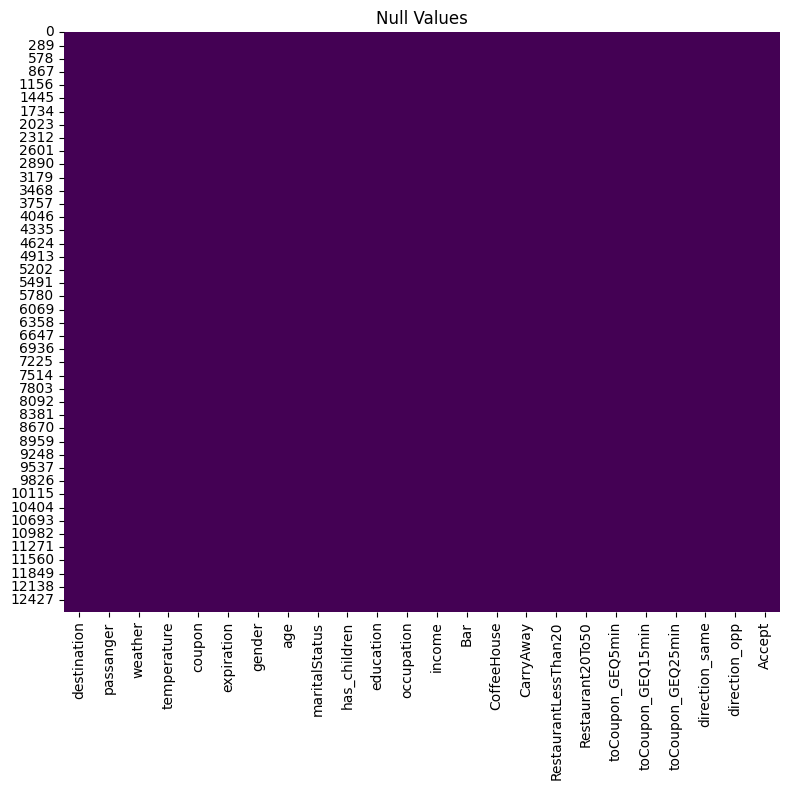

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.title('Null Values')
plt.tight_layout()
plt.show()

In [ ]:
#Checking for Duplicated Rows
df.duplicated().sum()

291

In [ ]:
#Dropping Duplicated rows from the dataset
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Accept'],
      dtype='object')

**Feature Engineering**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12393 entries, 0 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12393 non-null  object
 1   passanger             12393 non-null  object
 2   weather               12393 non-null  object
 3   temperature           12393 non-null  int64 
 4   coupon                12393 non-null  object
 5   expiration            12393 non-null  object
 6   gender                12393 non-null  object
 7   age                   12393 non-null  object
 8   maritalStatus         12393 non-null  object
 9   has_children          12393 non-null  int64 
 10  education             12393 non-null  object
 11  occupation            12393 non-null  object
 12  income                12393 non-null  object
 13  Bar                   12393 non-null  object
 14  CoffeeHouse           12393 non-null  object
 15  CarryAway             12393 non-null  obj

In [ ]:
df['age'].value_counts()

age
21         2598
26         2486
31         1984
50plus     1756
36         1293
41         1079
46          660
below21     537
Name: count, dtype: int64

In [ ]:
df['passanger'].value_counts()


passanger
Alone        7178
Friend(s)    3166
Partner      1068
Kid(s)        981
Name: count, dtype: int64

In [ ]:
def passenger_count(value):
    if value in ['Friend(s)', 'Kid(s)', 'Partner']:
        return 'Accompanied'
    else:
        return 'Alone'

df['passanger'] = df['passanger'].apply(passenger_count)


In [ ]:
df['occupation'].value_counts()

occupation
Unemployed                                   1828
Student                                      1550
Computer & Mathematical                      1360
Sales & Related                              1066
Education&Training&Library                    921
Management                                    806
Office & Administrative Support               631
Arts Design Entertainment Sports & Media      617
Business & Financial                          536
Retired                                       489
Food Preparation & Serving Related            293
Healthcare Support                            237
Healthcare Practitioners & Technical          237
Community & Social Services                   236
Legal                                         218
Transportation & Material Moving              214
Architecture & Engineering                    172
Personal Care & Service                       172
Protective Service                            172
Life Physical Social Science                  168
Construction & Extraction                     150
Installation Maintenance & Repair             129
Production Occupations                        108
Building & Grounds Cleaning & Maintenance      42
Farming Fishing & Forestry                     41
Name: count, dtype: int64

In [ ]:
def occupation(values):
  if values in ['Healthcare Support','Healthcare Practitioners & Technical']:
    return 'HealthCare'
  elif values in ['Transportation & Material Moving','Construction & Extraction','Installation Maintenance & Repair','Building & Grounds Cleaning & Maintenance']:
    return 'Construction_Infrastructure'
  elif values in ['Student','Education&Training&Library']:
    return 'Education'
  elif values in ['Food Preparation & Serving Related','Personal Care & Service']:
    return 'Service'
  elif values in ['Life Physical Social Science','Protective Service','Community & Social Services']:
    return 'Social'
  elif values in ['Sales & Related','Business & Financial','Office & Administrative Support','Management']:
    return 'Business_Management'
  elif values in ['Computer & Mathematical','Architecture & Engineering','Production Occupations']:
    return 'Engineering & Manufacturing'
  else:
    return values

In [ ]:
df['occupation']=df['occupation'].apply(occupation)

In [ ]:
df['occupation'].value_counts()

occupation
Business_Management                         3039
Education                                   2471
Unemployed                                  1828
Engineering & Manufacturing                 1640
Arts Design Entertainment Sports & Media     617
Social                                       576
Construction_Infrastructure                  535
Retired                                      489
HealthCare                                   474
Service                                      465
Legal                                        218
Farming Fishing & Forestry                    41
Name: count, dtype: int64

In [ ]:
df['toCoupon_GEQ5min'].value_counts()

toCoupon_GEQ5min
1    12393
Name: count, dtype: int64

**Dropping toCoupon_GEQ5min as there is only 1 value**

In [ ]:
df.drop(columns=['toCoupon_GEQ5min'],inplace=True)

**Dropping direction_opp column from the data as it is contradictory to direction_same column which gives enough Information**

In [ ]:
df.drop(columns=['direction_opp'],inplace=True)

**Exploratory Data Analysis (EDA)**

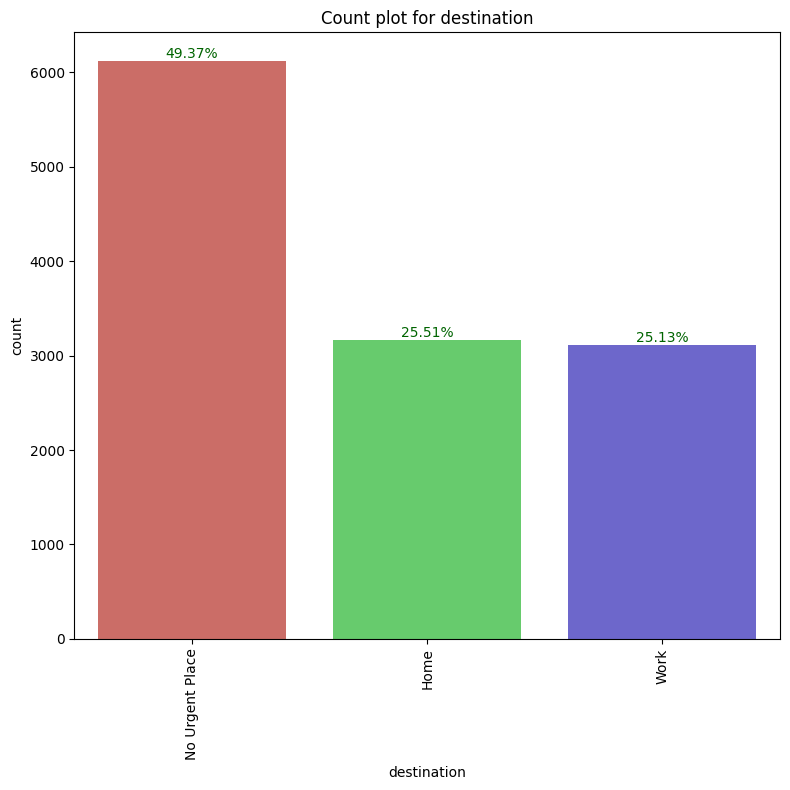

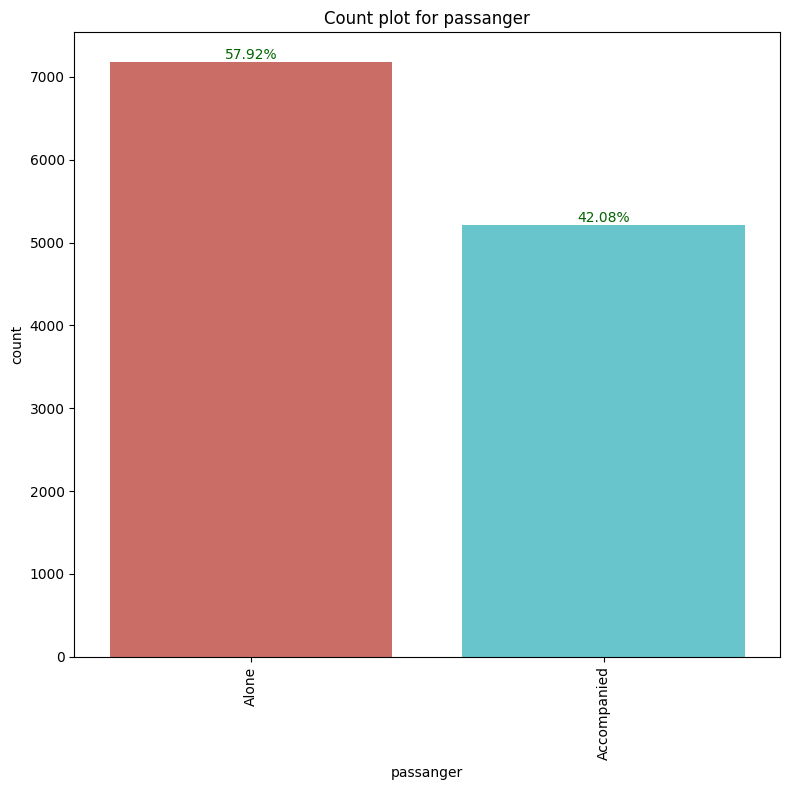

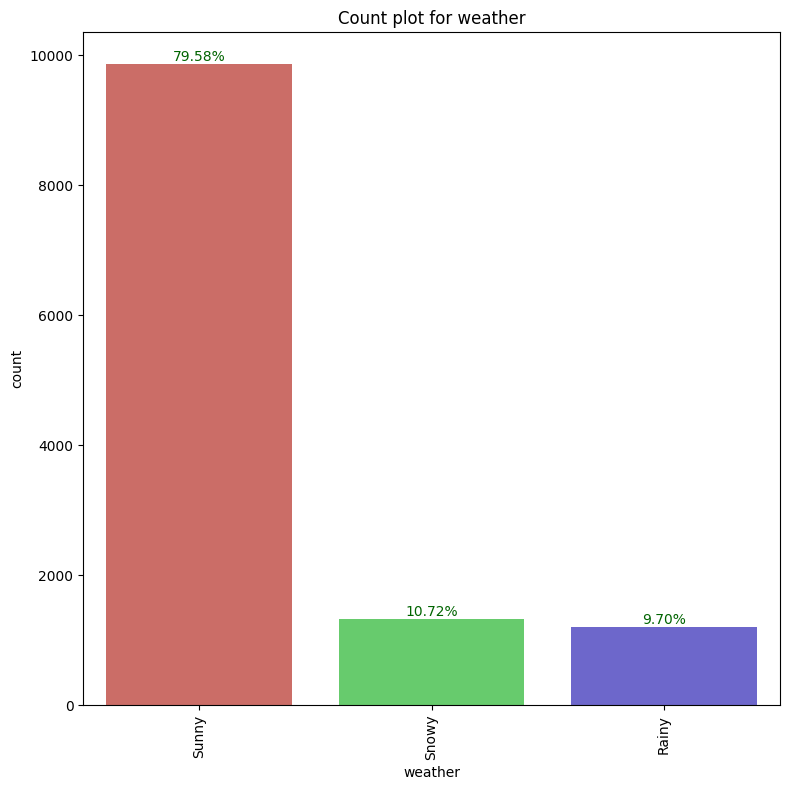

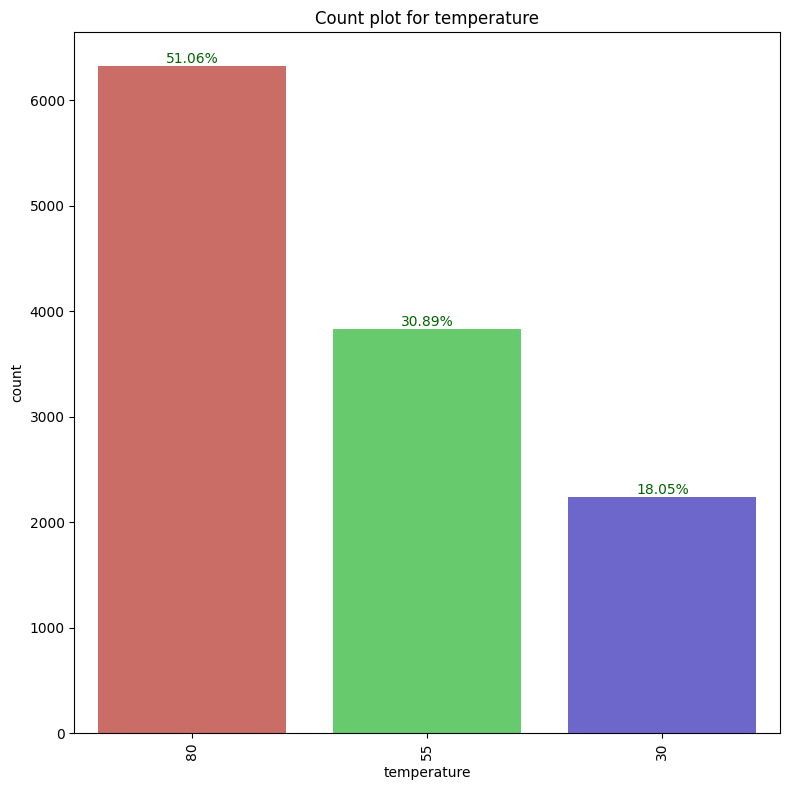

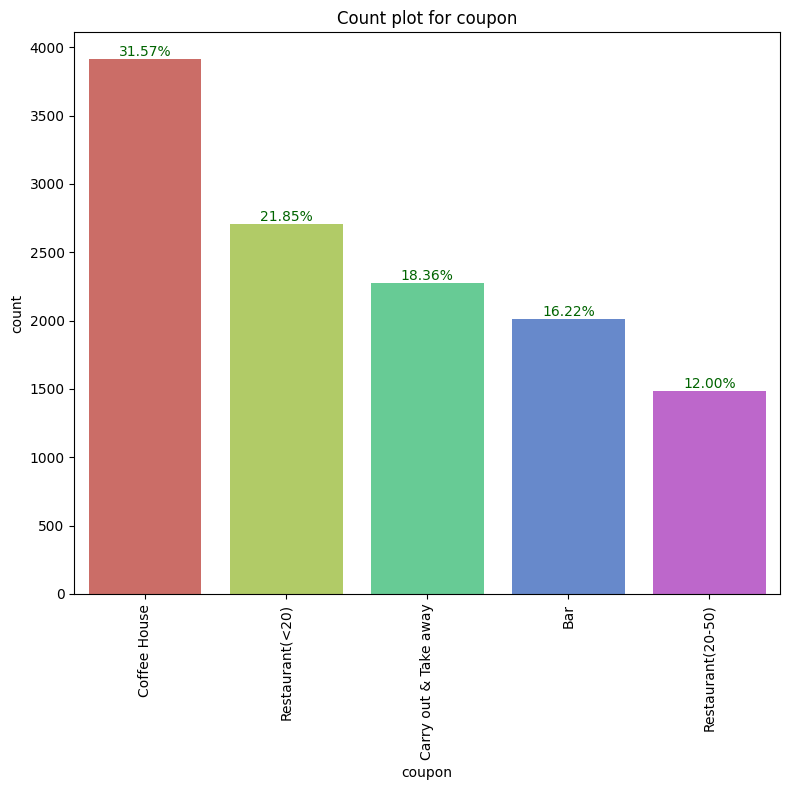

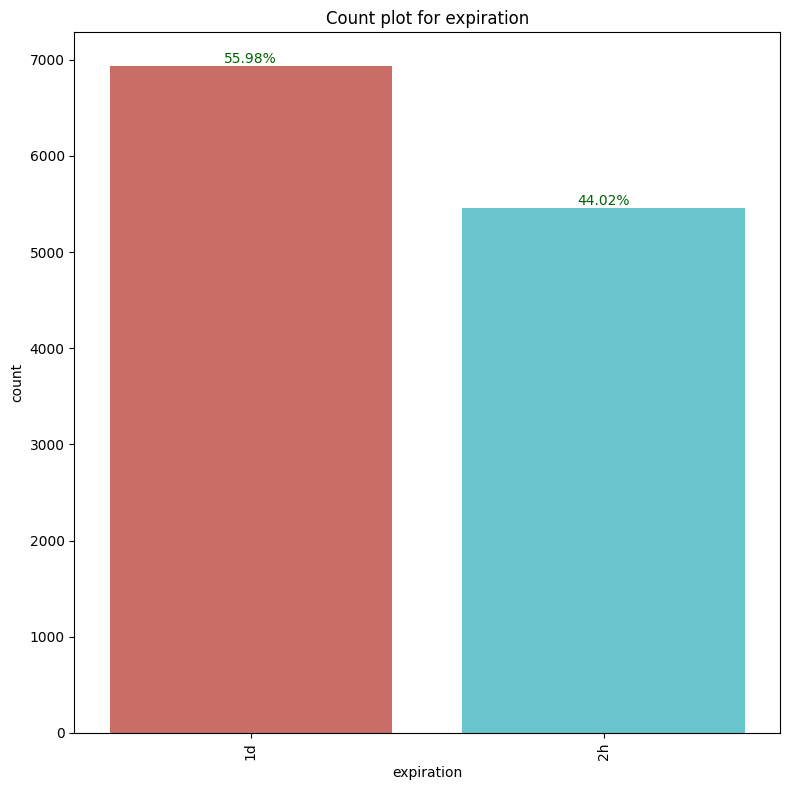

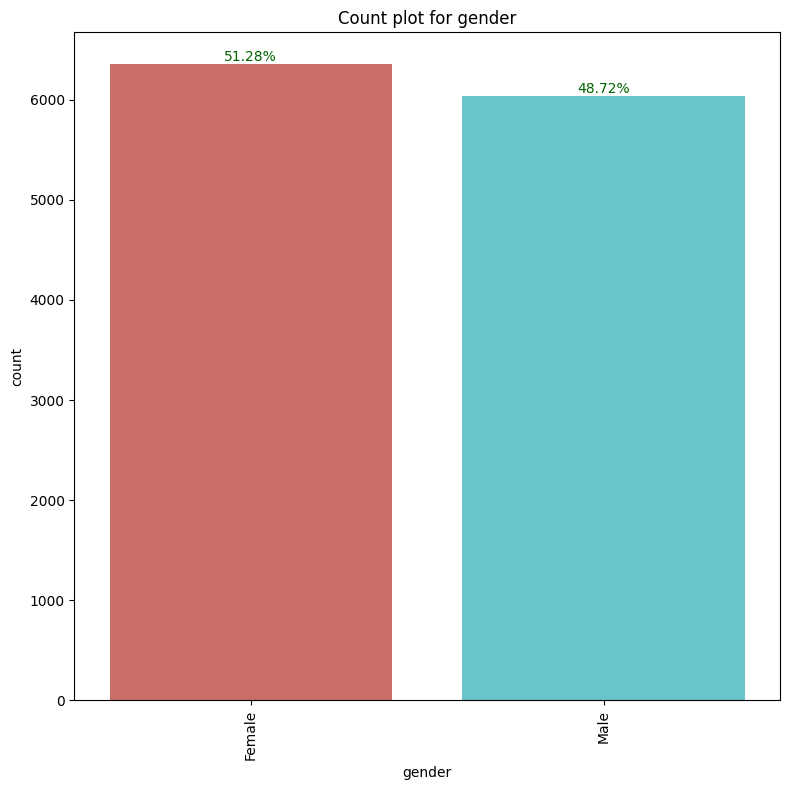

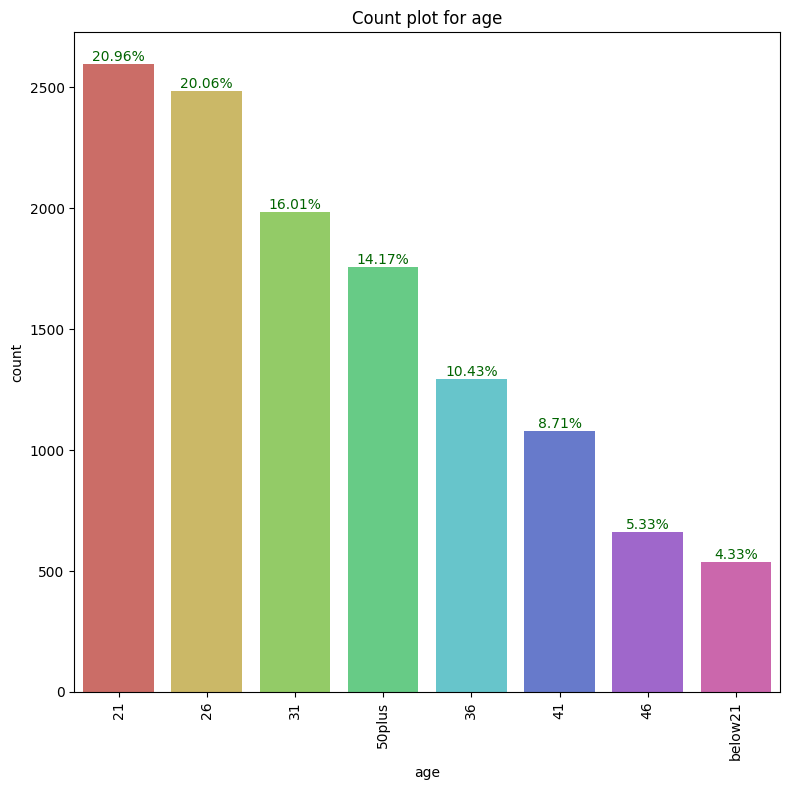

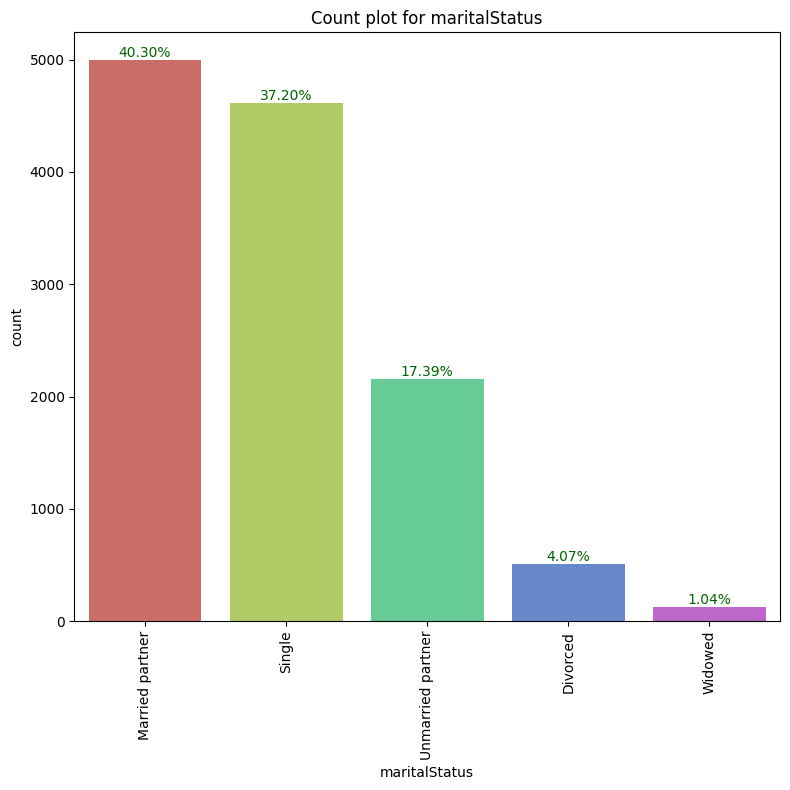

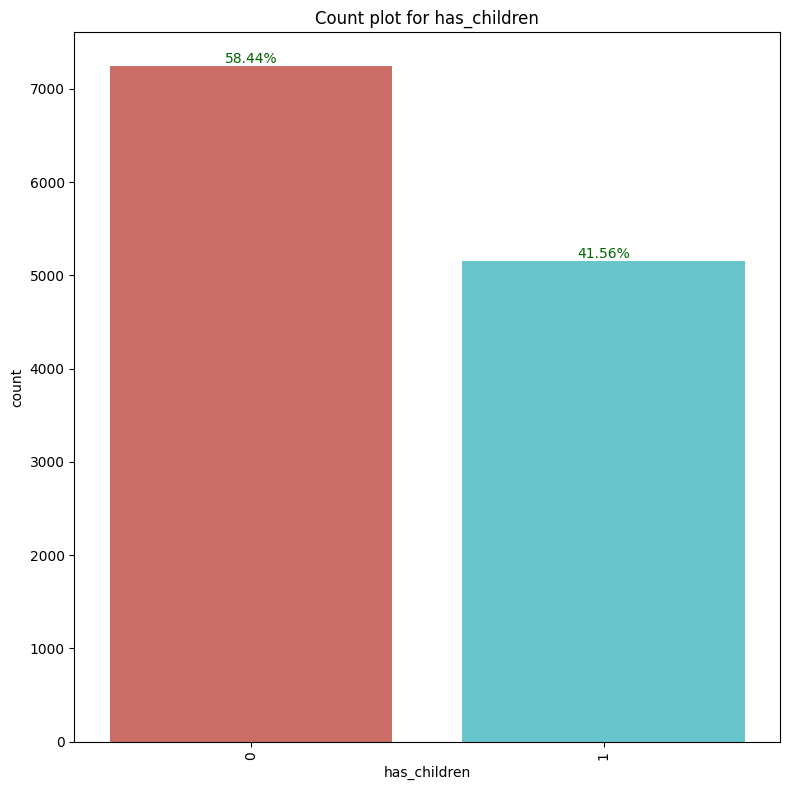

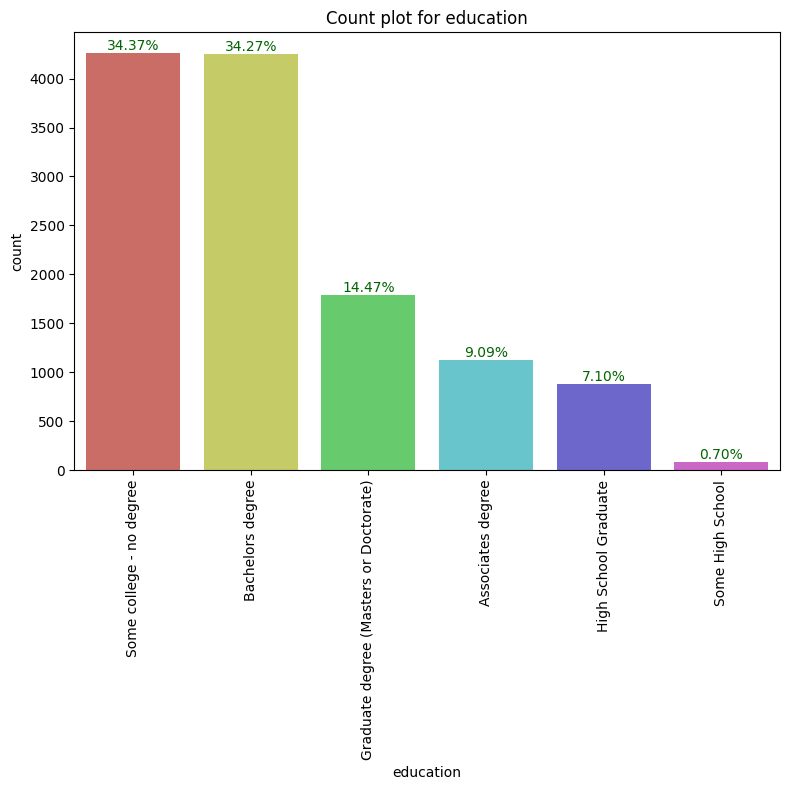

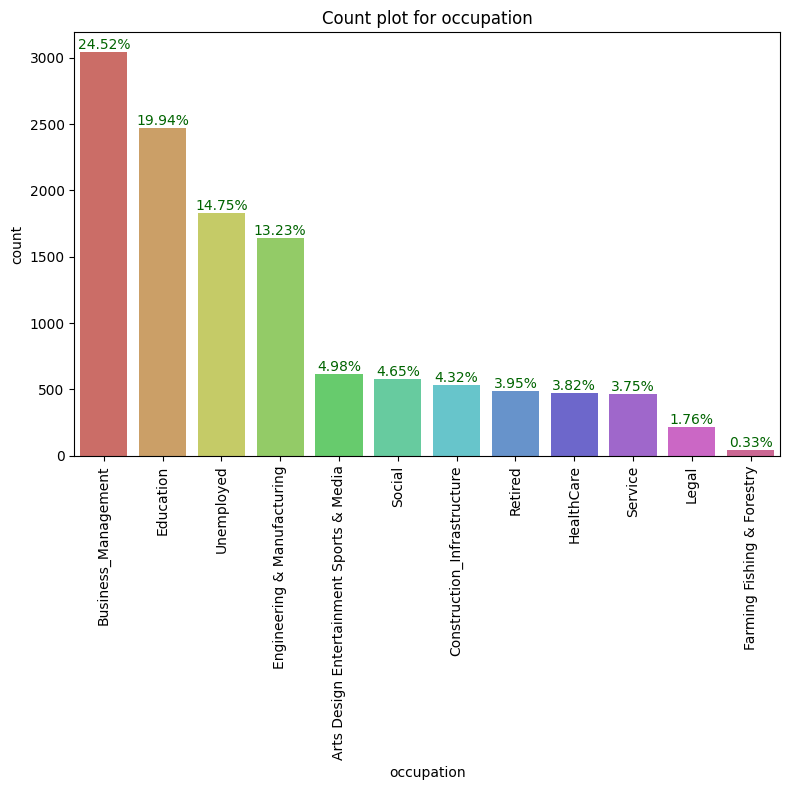

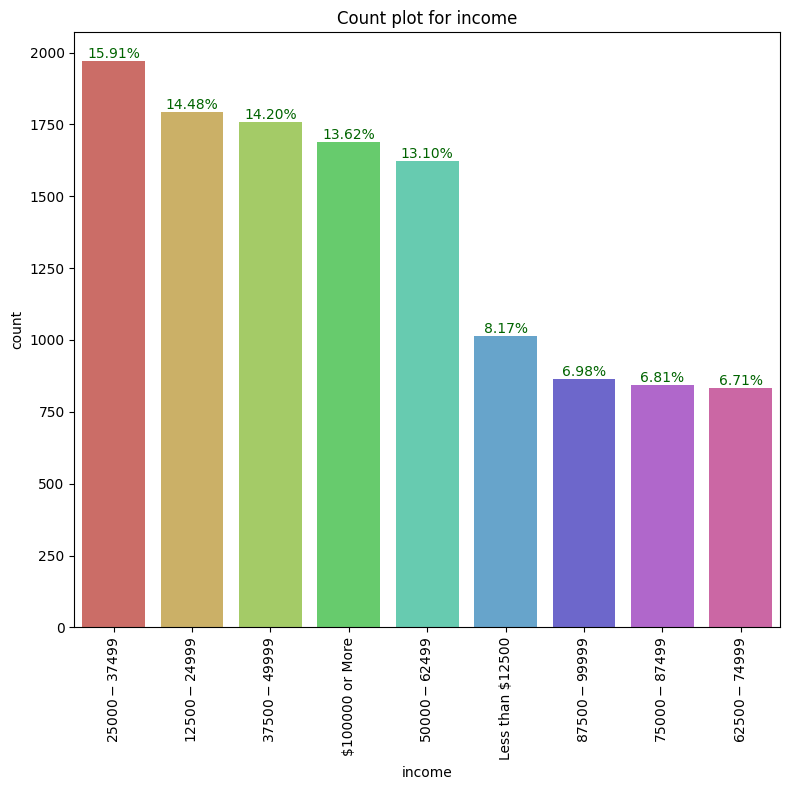

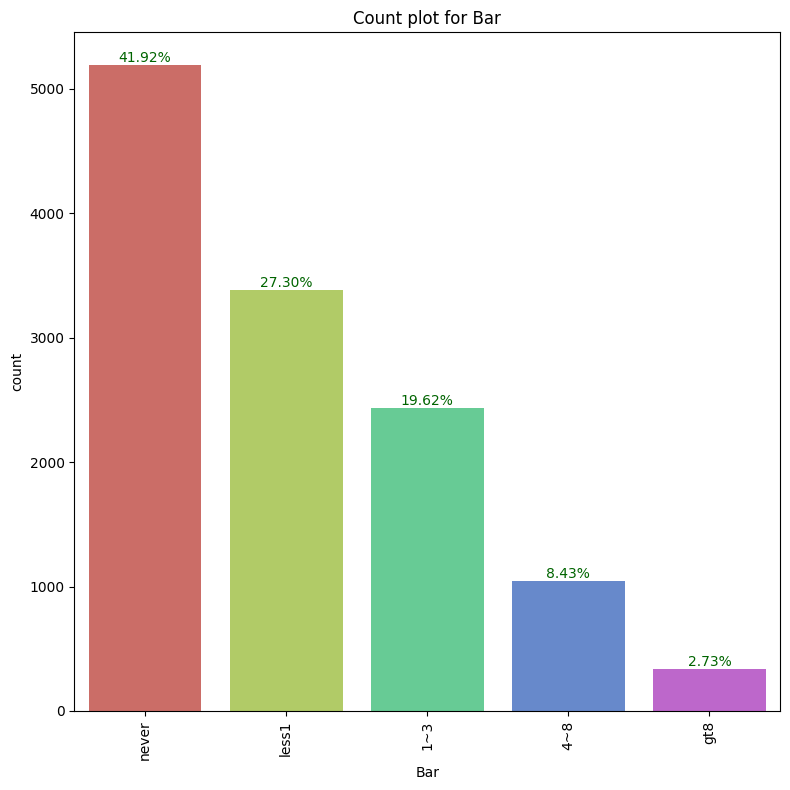

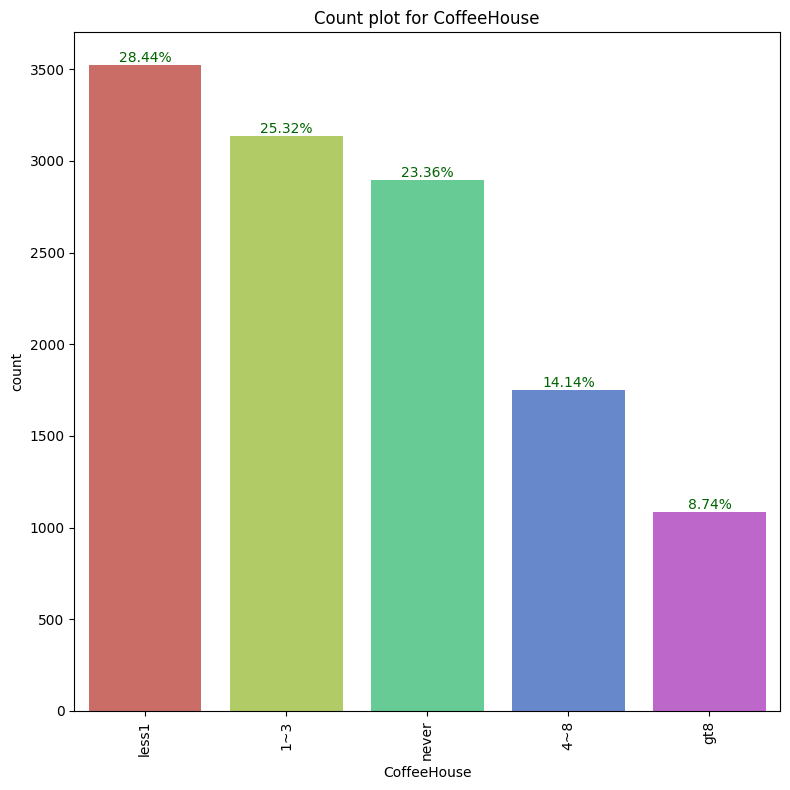

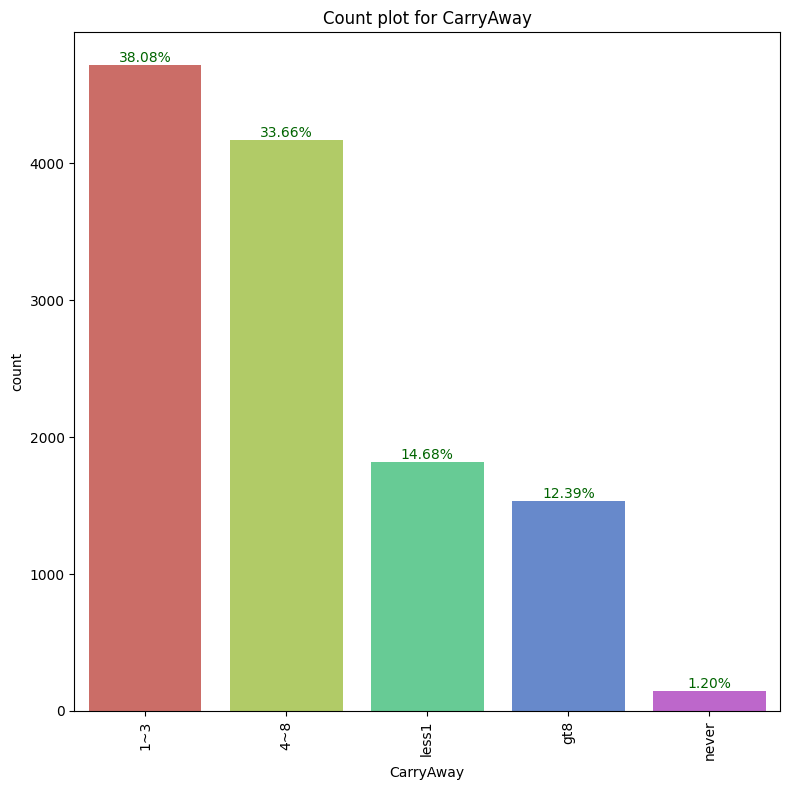

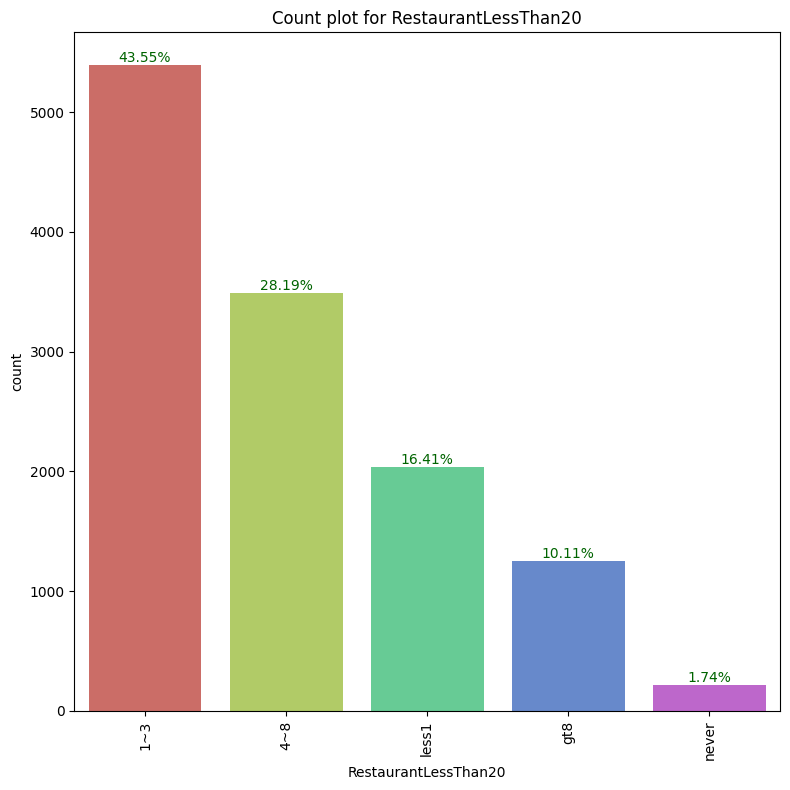

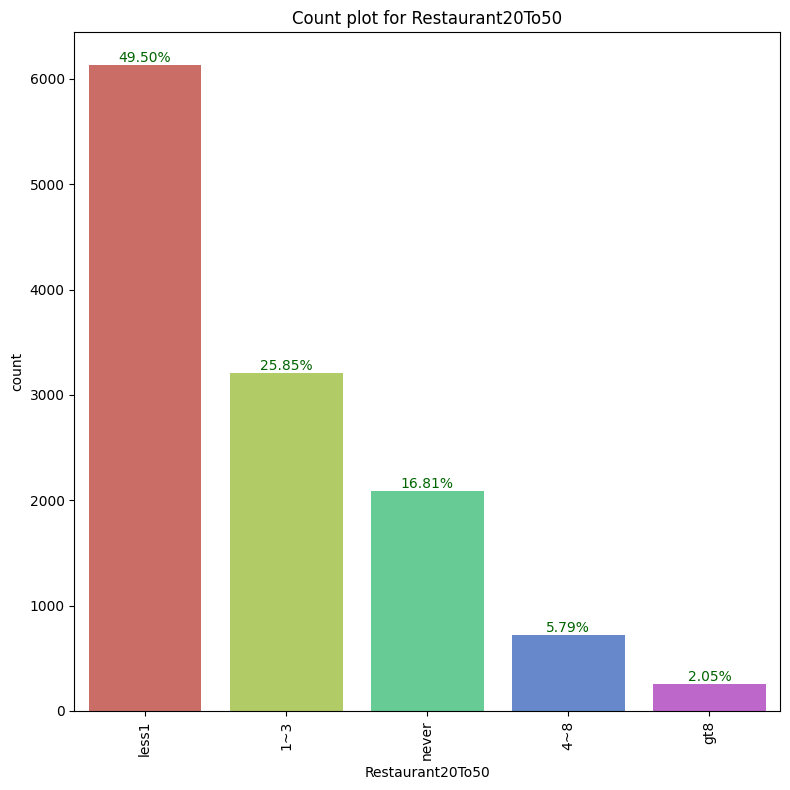

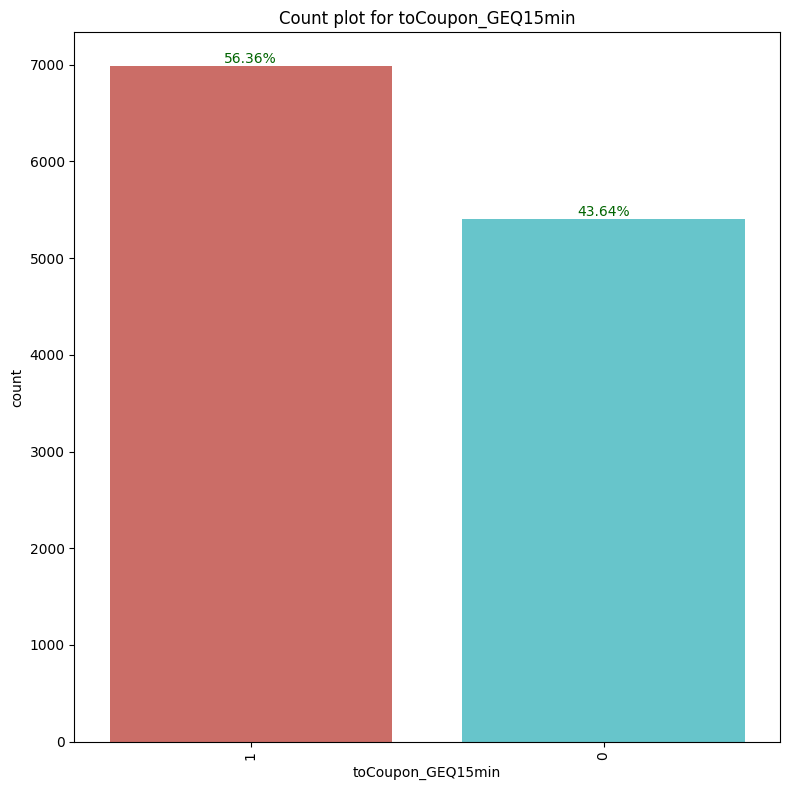

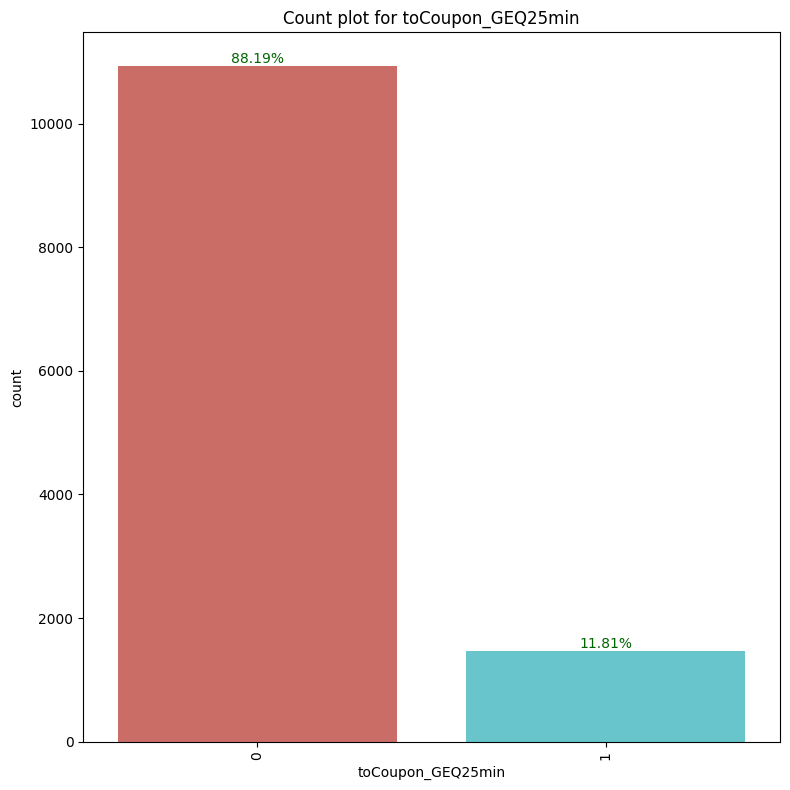

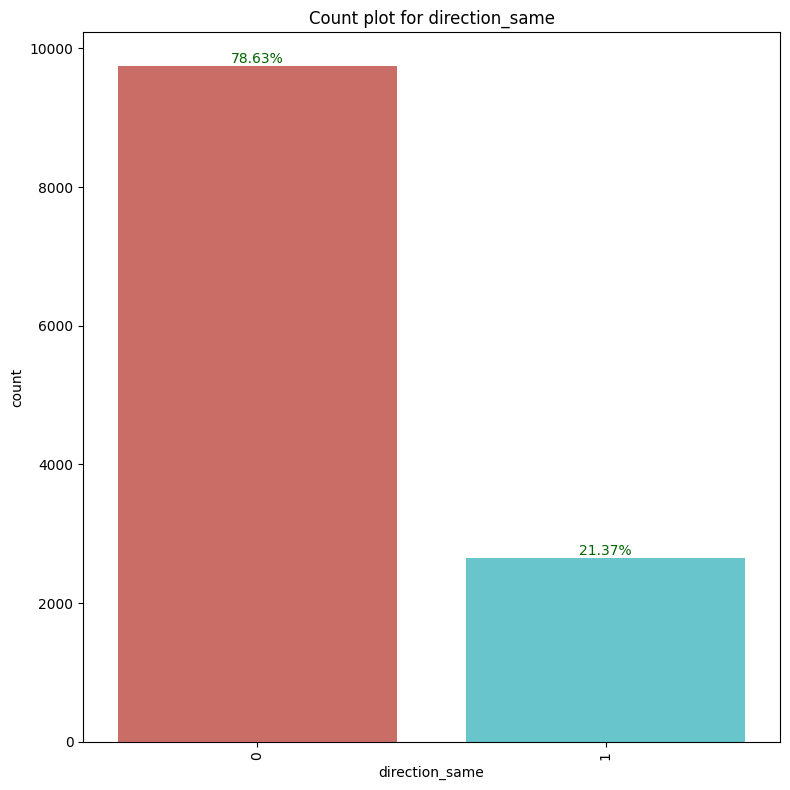

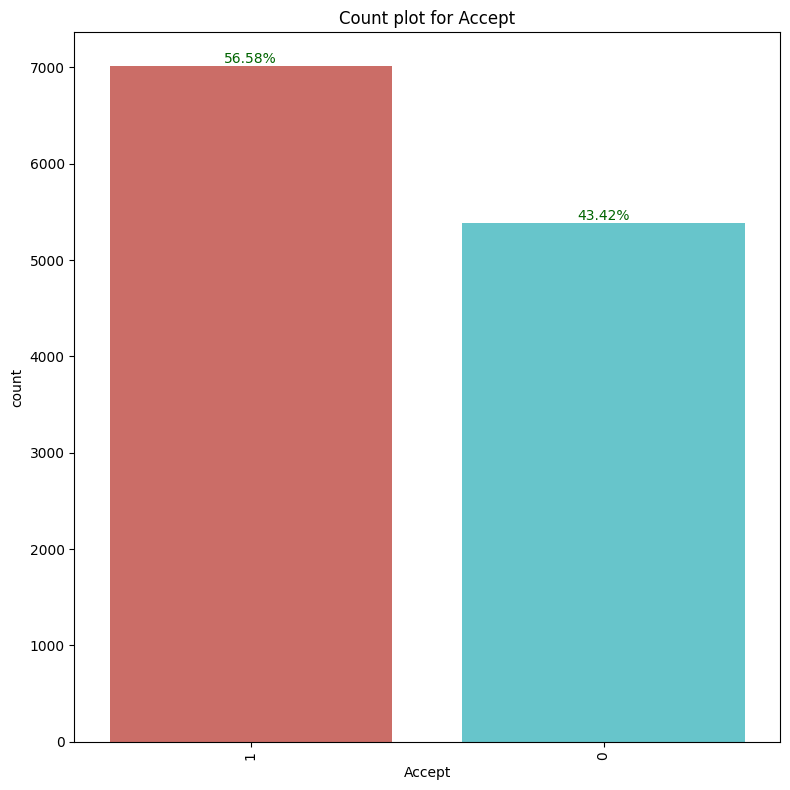

In [ ]:
for col in df.columns:
  plt.figure(figsize=(8,8))
  ax=sns.countplot(x=df[col],data=df,palette='hls',order=df[col].value_counts().index)
  plt.xticks(rotation=90)
  for rect in ax.patches:
    ax.text(rect.get_x()+rect.get_width()/2,rect.get_height(),f"{rect.get_height()/len(df) * 100:.2f}%",
                     ha='center',va='bottom',color='darkgreen')
  plt.title(f'Count plot for {col}')
  plt.tight_layout()
  plt.show()

In [ ]:
df['coupon'].value_counts()

coupon
Coffee House             3913
Restaurant(<20)          2708
Carry out & Take away    2275
Bar                      2010
Restaurant(20-50)        1487
Name: count, dtype: int64

In [ ]:
df['Accept']

0        1
1        0
2        1
3        0
4        0
        ..
12679    1
12680    1
12681    0
12682    0
12683    0
Name: Accept, Length: 12393, dtype: int64

**Running EDA based on the coupons so that various factors affecting the acceptance of coupon can be analyzed.**

In [ ]:
df_CoffeeHouse=df[df['coupon']=='Coffee House']
df_RestaurantLessThan20=df[df['coupon']=='Restaurant(<20)']
df_Restaurant20To50=df[df['coupon']=='Restaurant(20-50)']
df_Bar=df[df['coupon']=='Bar']
df_CarryAway=df[df['coupon']=='Carry out & Take away']

In [ ]:
df_CoffeeHouse.head()

destination    passanger weather  temperature        coupon  \
1   No Urgent Place  Accompanied   Sunny           80  Coffee House   
3   No Urgent Place  Accompanied   Sunny           80  Coffee House   
4   No Urgent Place  Accompanied   Sunny           80  Coffee House   
12  No Urgent Place  Accompanied   Sunny           55  Coffee House   
15             Home        Alone   Sunny           80  Coffee House   

   expiration  gender age      maritalStatus  has_children  \
1          2h  Female  21  Unmarried partner             1   
3          2h  Female  21  Unmarried partner             1   
4          1d  Female  21  Unmarried partner             1   
12         2h  Female  21  Unmarried partner             1   
15         2h  Female  21  Unmarried partner             1   

                   education  occupation           income    Bar CoffeeHouse  \
1   Some college - no degree  Unemployed  $37500 - $49999  never       never   
3   Some college - no degree  Unemployed  $37500 - $49999  never       never   
4   Some college - no degree  Unemployed  $37500 - $49999  never       never   
12  Some college - no degree  Unemployed  $37500 - $49999  never       never   
15  Some college - no degree  Unemployed  $37500 - $49999  never       never   

   CarryAway RestaurantLessThan20 Restaurant20To50  toCoupon_GEQ15min  \
1        1~3                  4~8              1~3                  0   
3        1~3                  4~8              1~3                  1   
4        1~3                  4~8              1~3                  1   
12       1~3                  4~8              1~3                  1   
15       1~3                  4~8              1~3                  0   

    toCoupon_GEQ25min  direction_same  Accept  
1                   0               0       0  
3                   0               0       0  
4                   0               0       0  
12                  0               0       1  
15                  0               0       0

In [ ]:
df_CoffeeHouse.shape

(3913, 22)

In [ ]:
def coupon_count(df):
    for col in df.columns:
      if col !='coupon':
        plt.figure(figsize=(8,8))
        ax=sns.countplot(x=df[col],data=df,palette='hls',hue=df['Accept'],order=df[col].value_counts().index)
        plt.xticks(rotation=90)
        for rect in ax.patches:
          ax.text(rect.get_x()+rect.get_width()/2,rect.get_height(),f"{rect.get_height()/len(df) * 100:.2f}%",
                           ha='center',va='bottom',color='darkgreen')
        plt.title(f'Count plot for {col}')
        plt.tight_layout()
        plt.show()

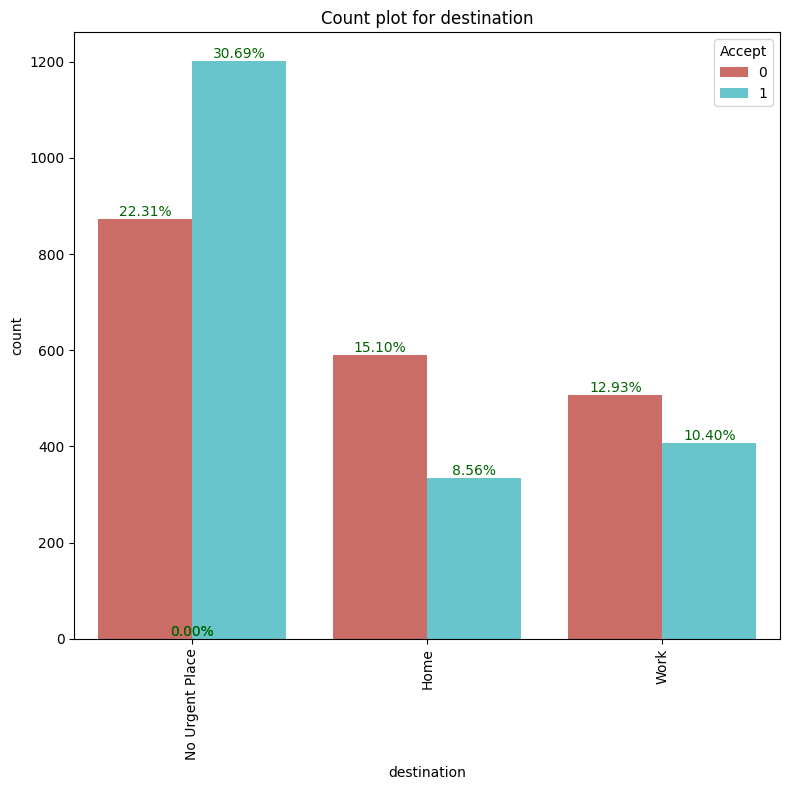

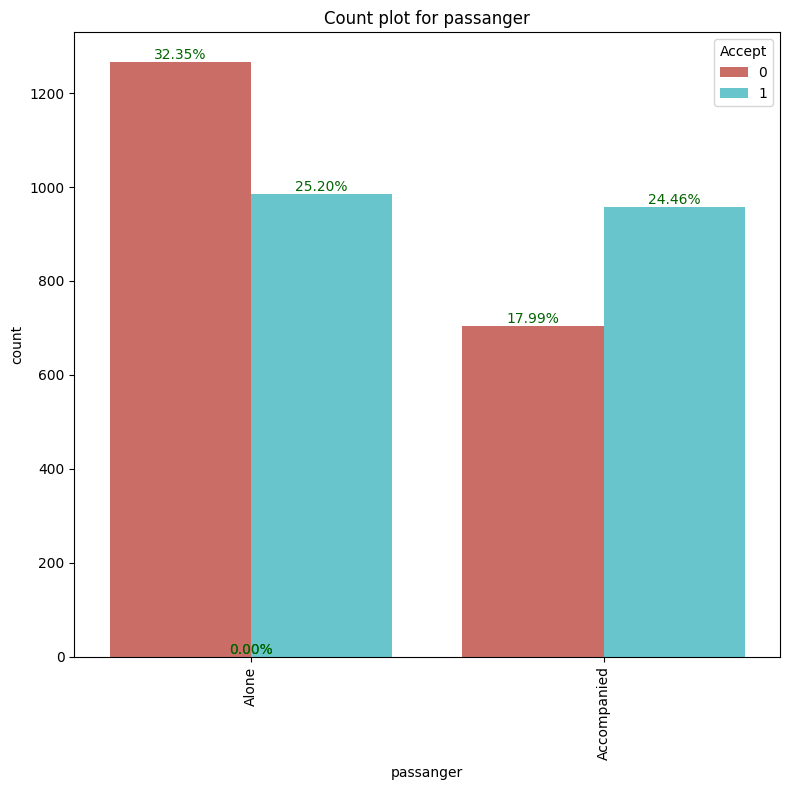

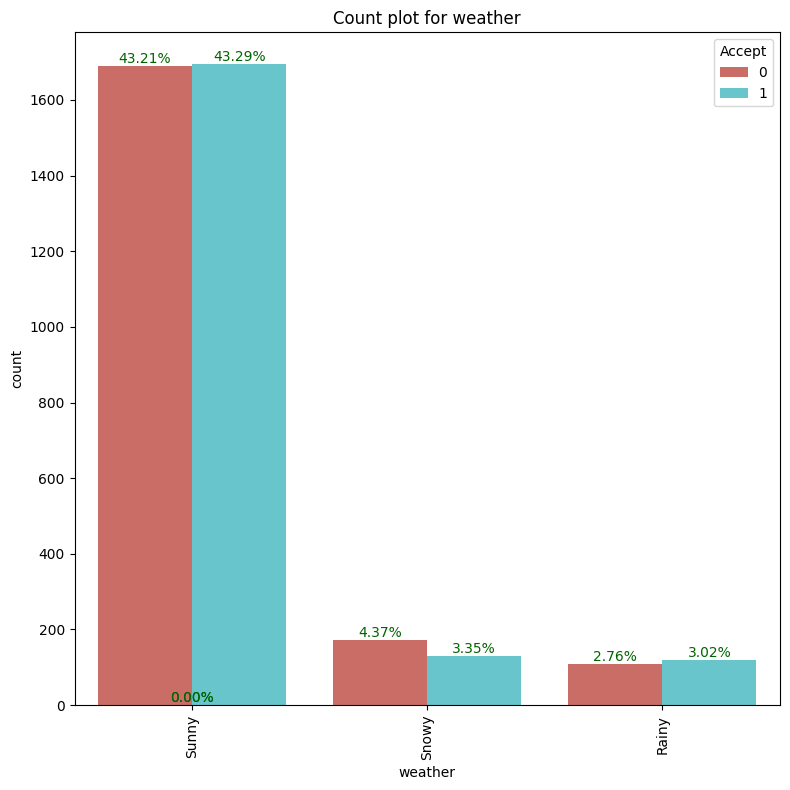

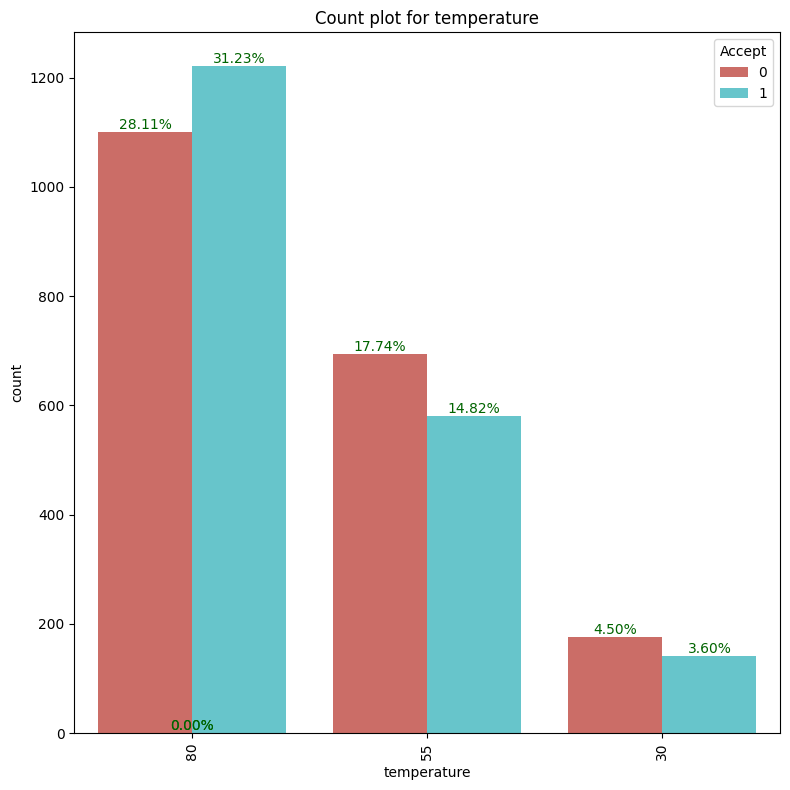

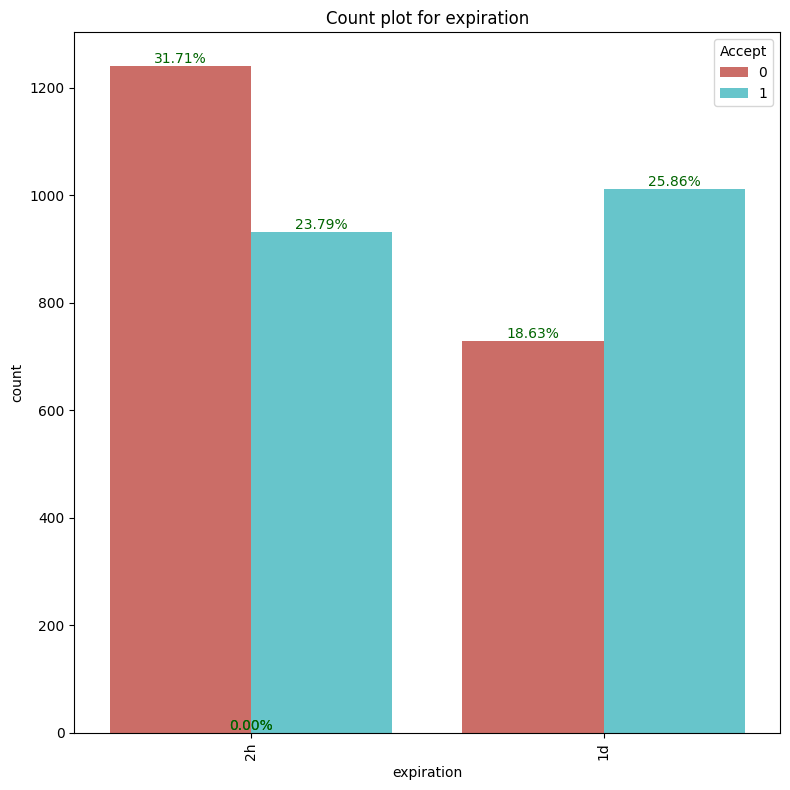

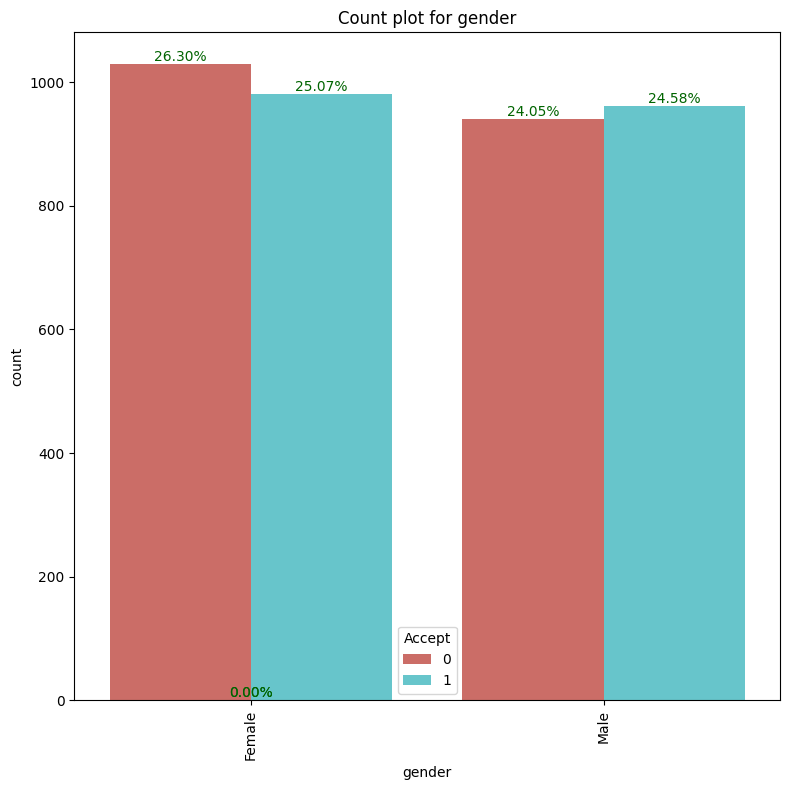

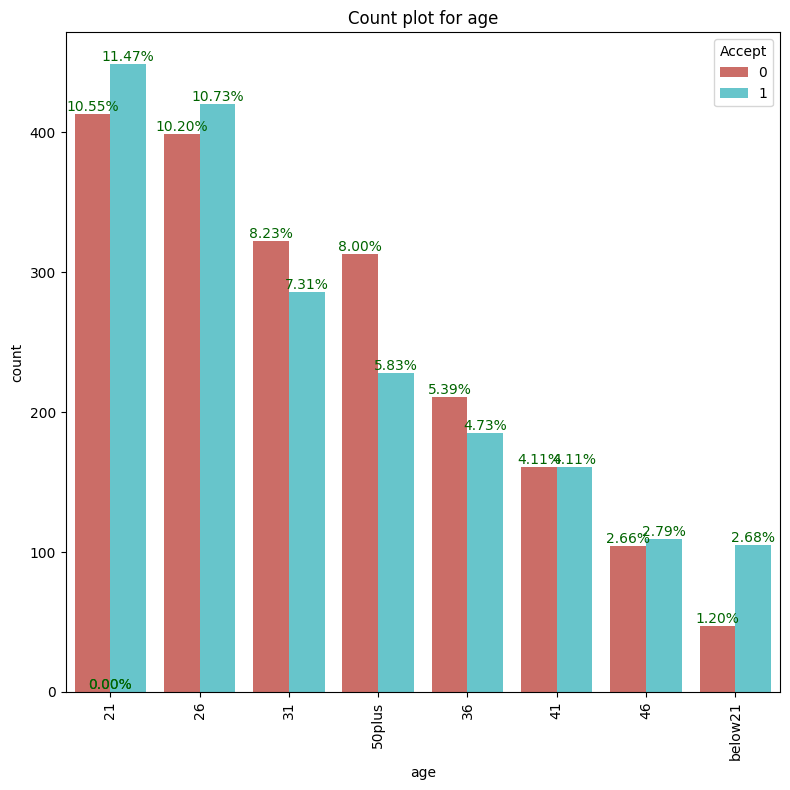

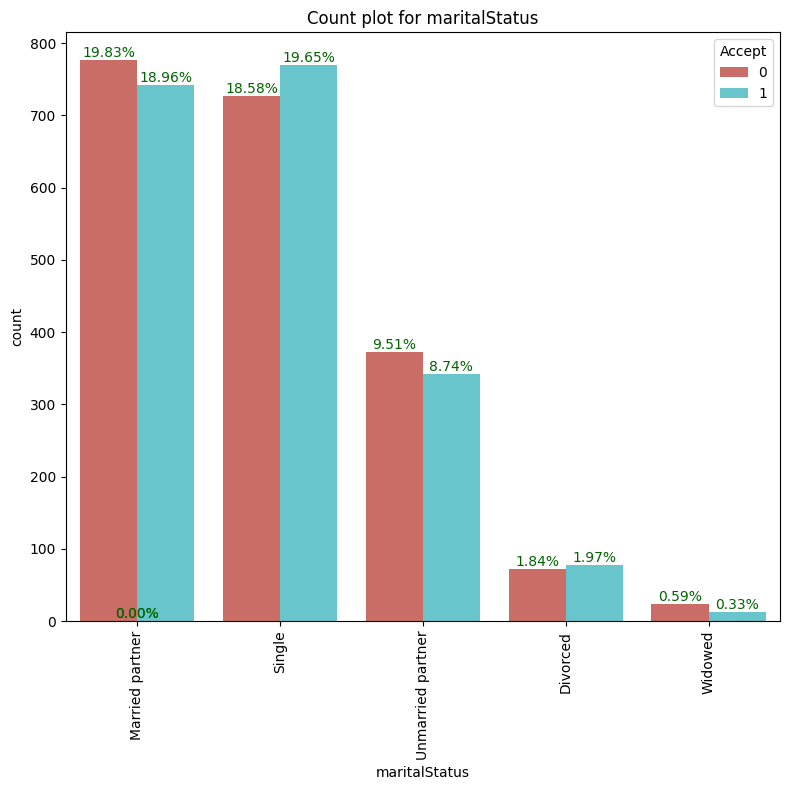

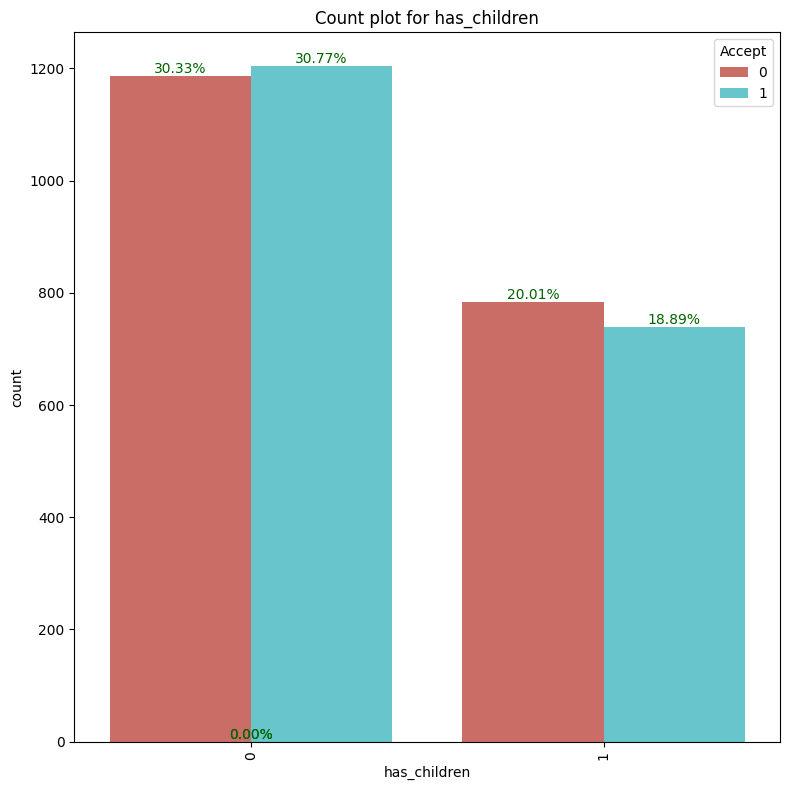

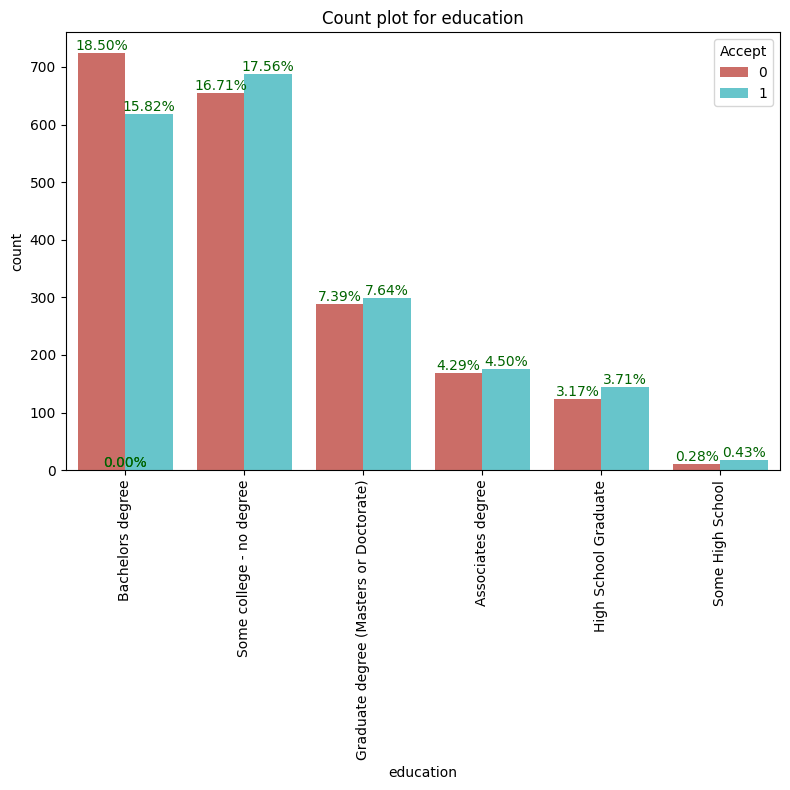

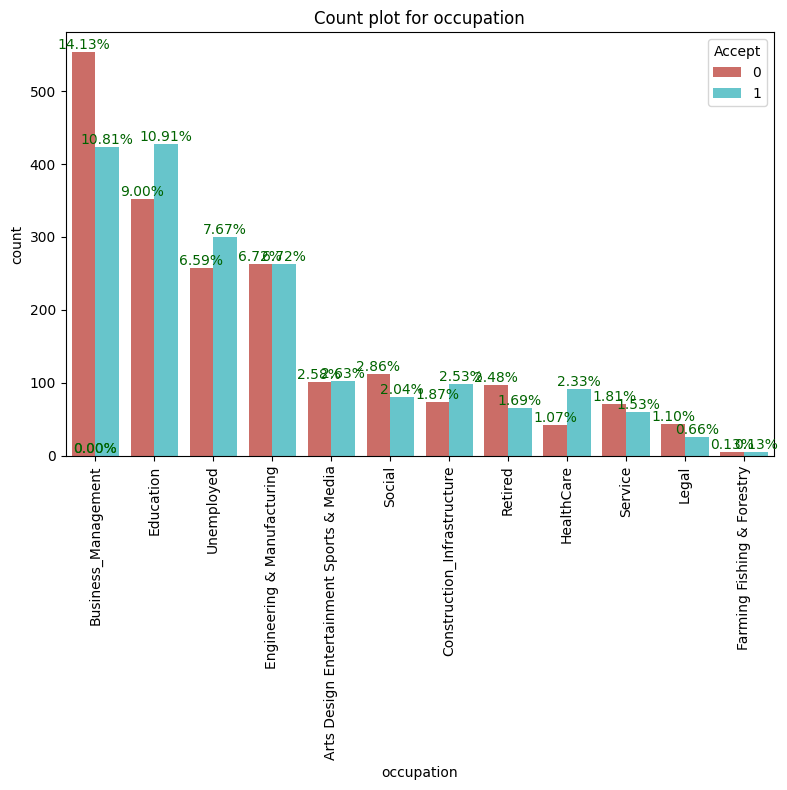

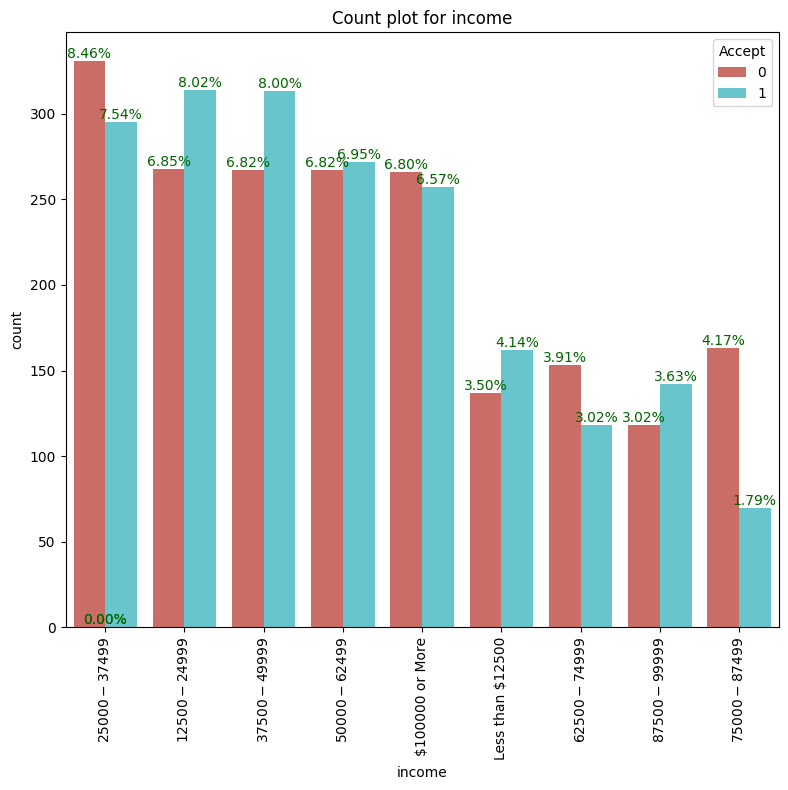

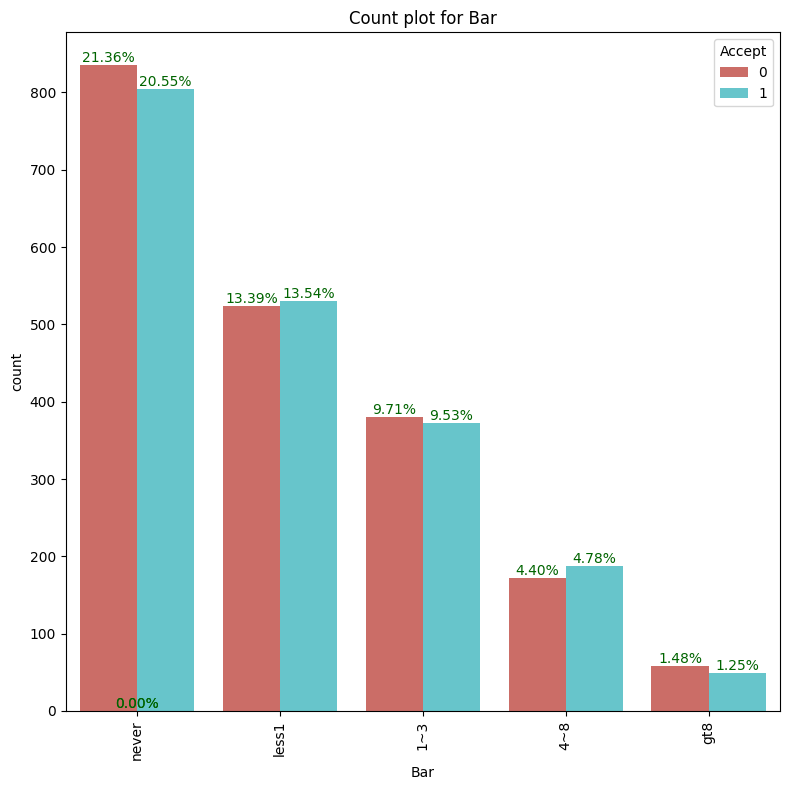

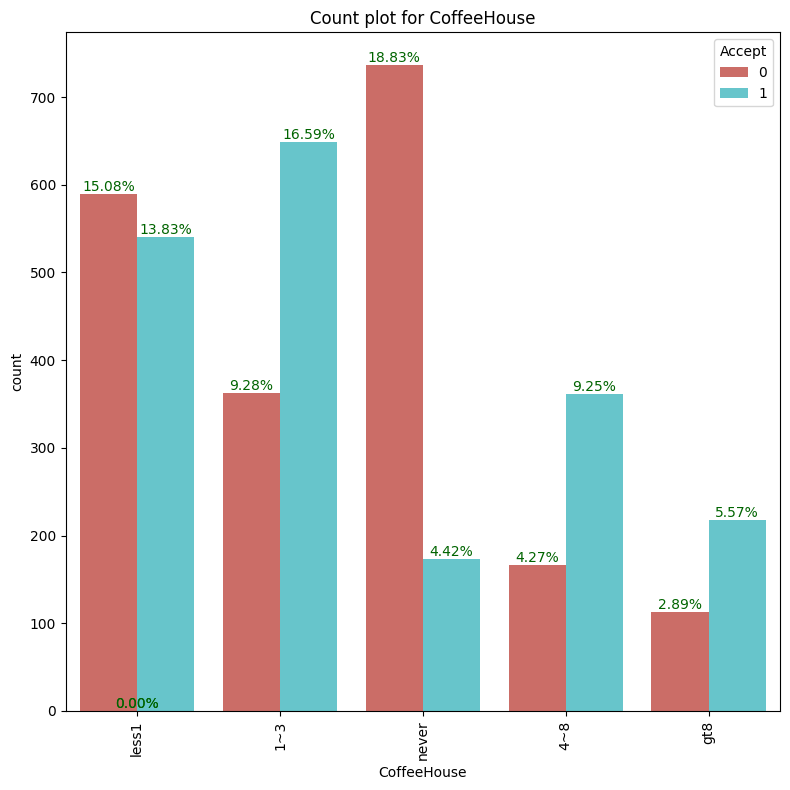

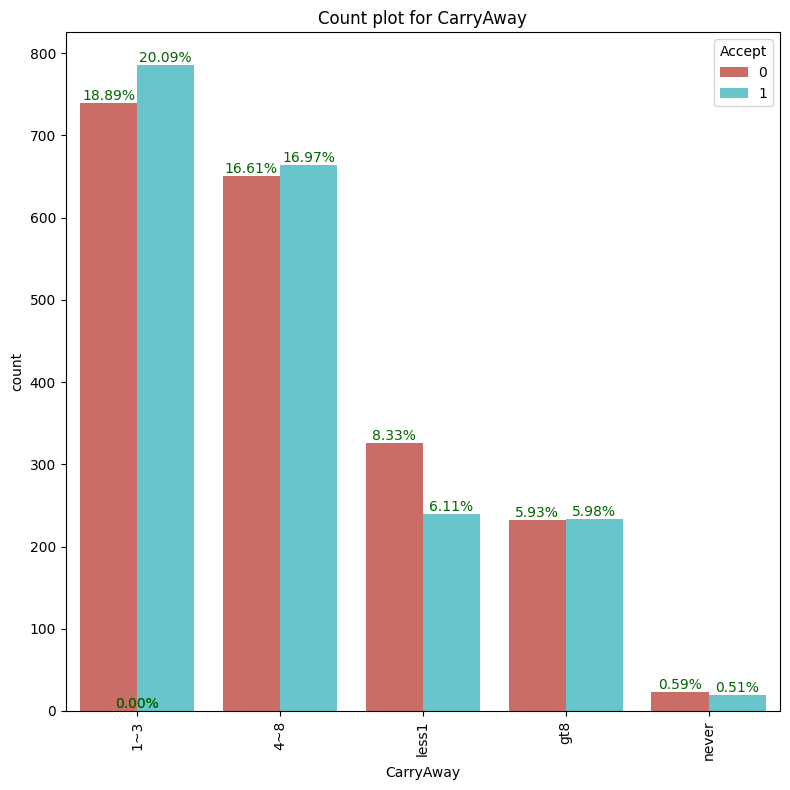

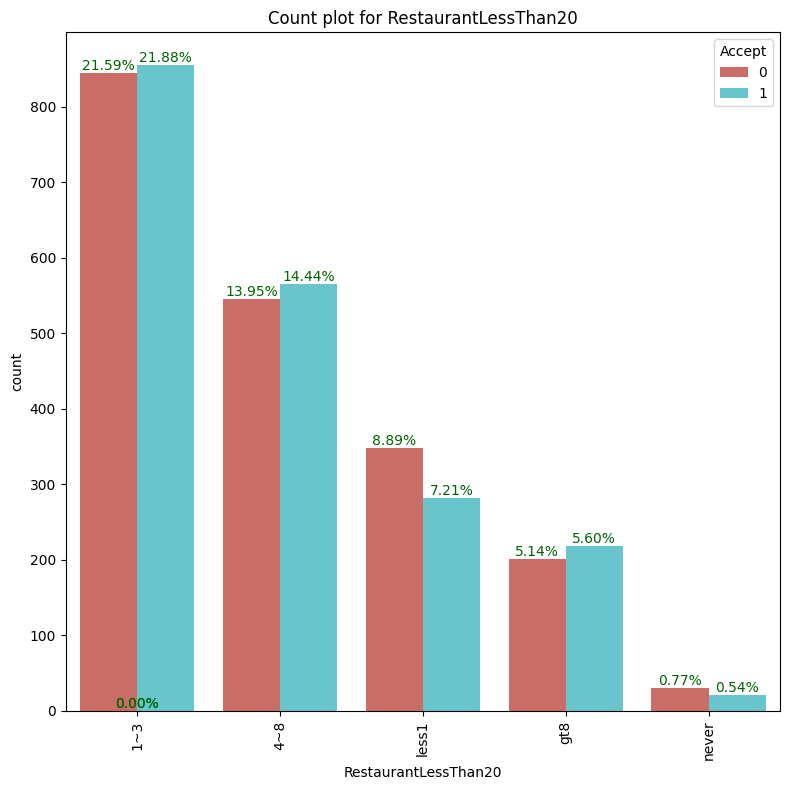

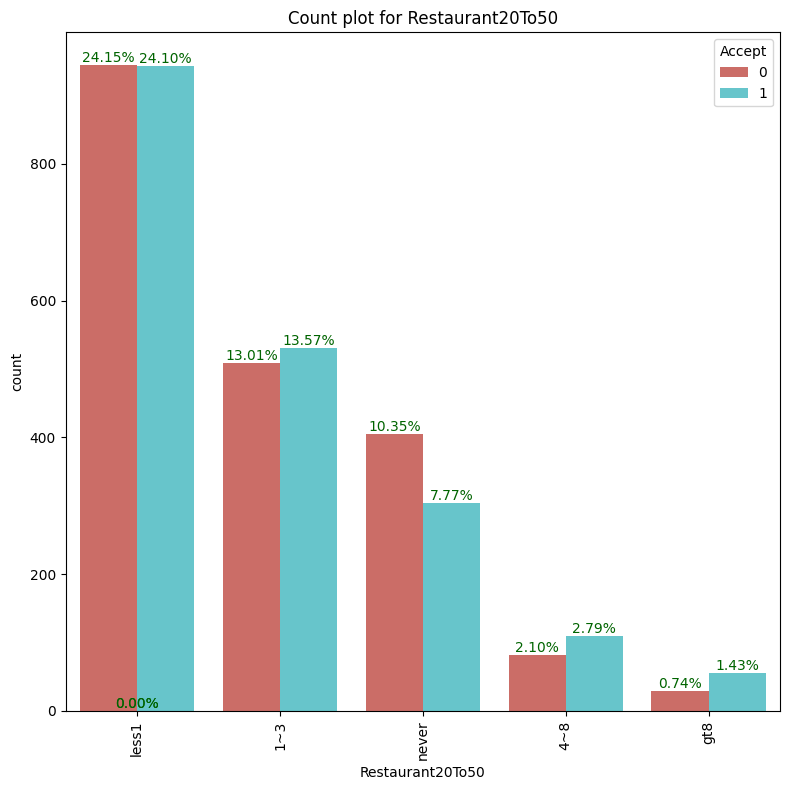

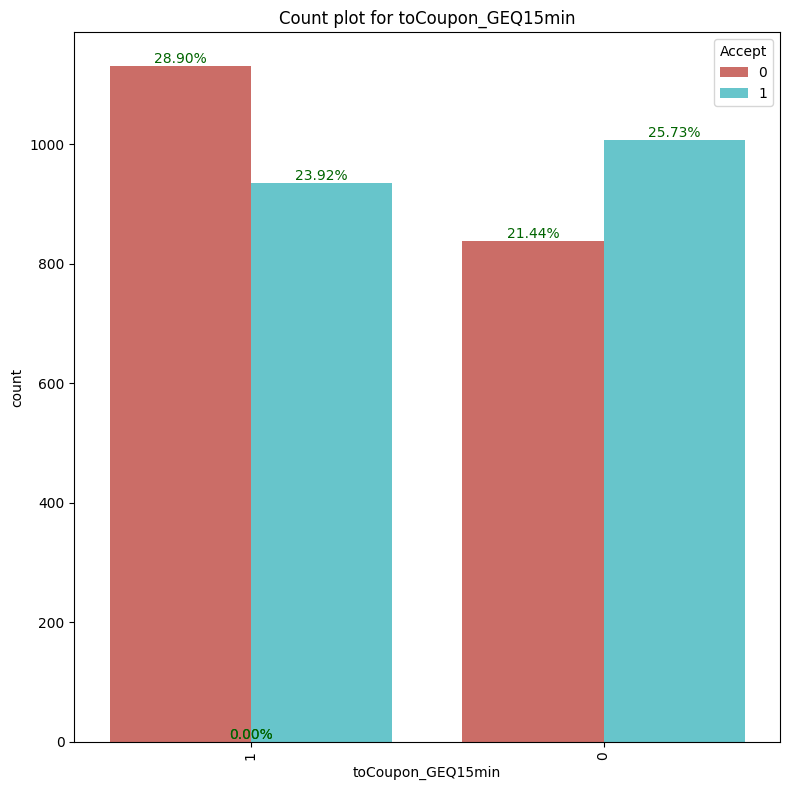

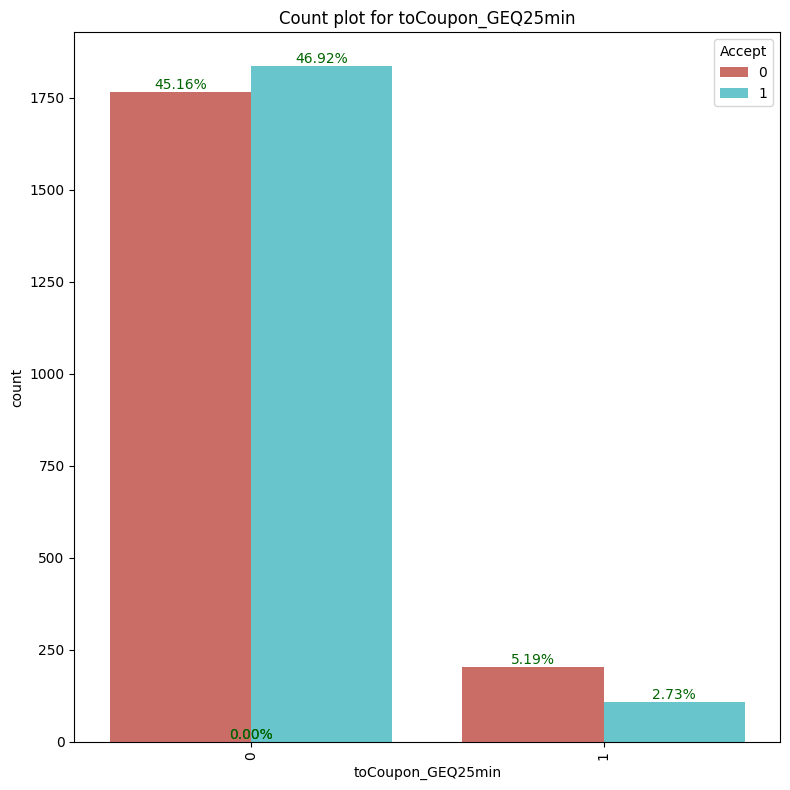

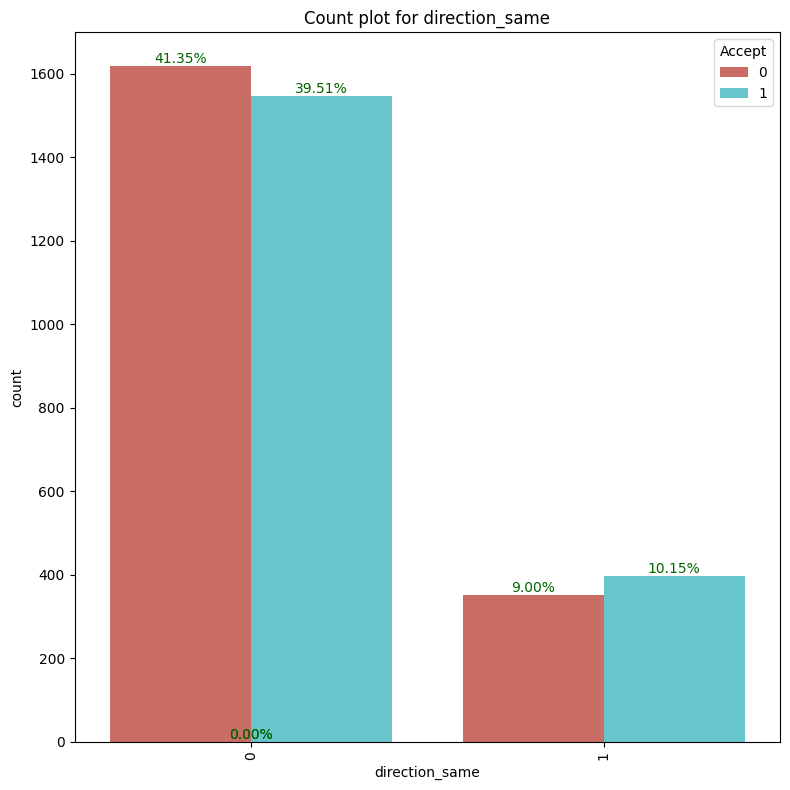

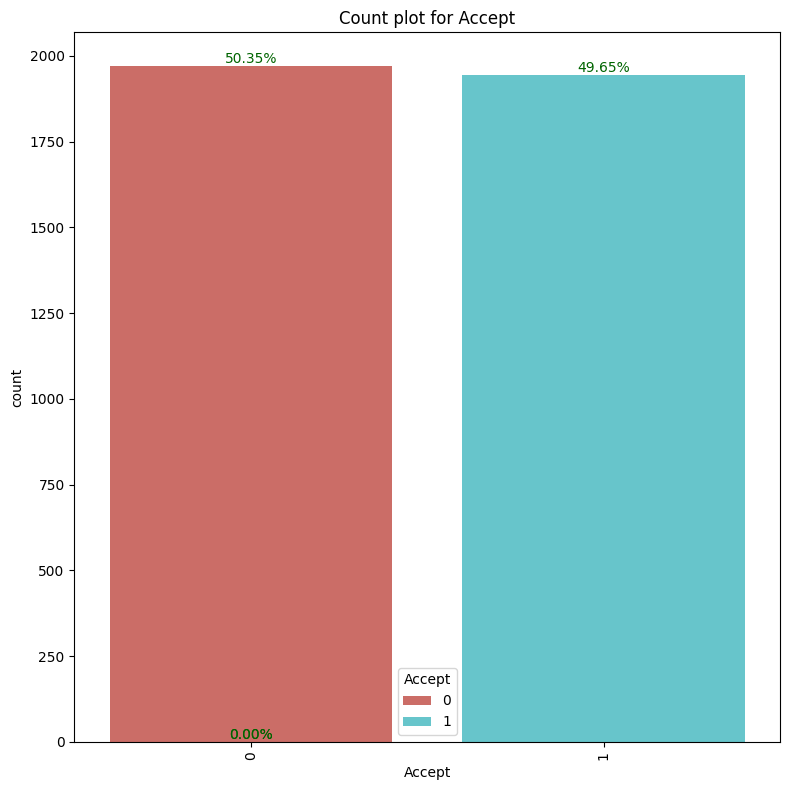

In [ ]:
coupon_count(df_CoffeeHouse)



*   The coupon acceptance rate for coffee house is pretty Balanced at 49.65%
*   Key Trends observed which influences coupon acceptance are coupon acceptance rate is higher if the traveller has lot of time to reach with no urgency


*   Coupon Acceptance rate is higher when it is a sunny day , No significant difference observed with respect to gender and coupon expiration. Acceptance rate is higher amongst the age group of 21-31 when compared to others . Married couples and singles accepted coupons when compared to other groups
*   Acceptance rate was observed to be higher for the couples who dont have childern , Business Management professional has the highest acceptance rate when compared to others



*   Individuals who never go to bar and visited coffee House between 1-3 times a month and opted for carry away between 1-3 times visited Restaurant less than 20$ and not visiting Restaurant to 20-50 had higher acceptance rate for coffee house coupons.













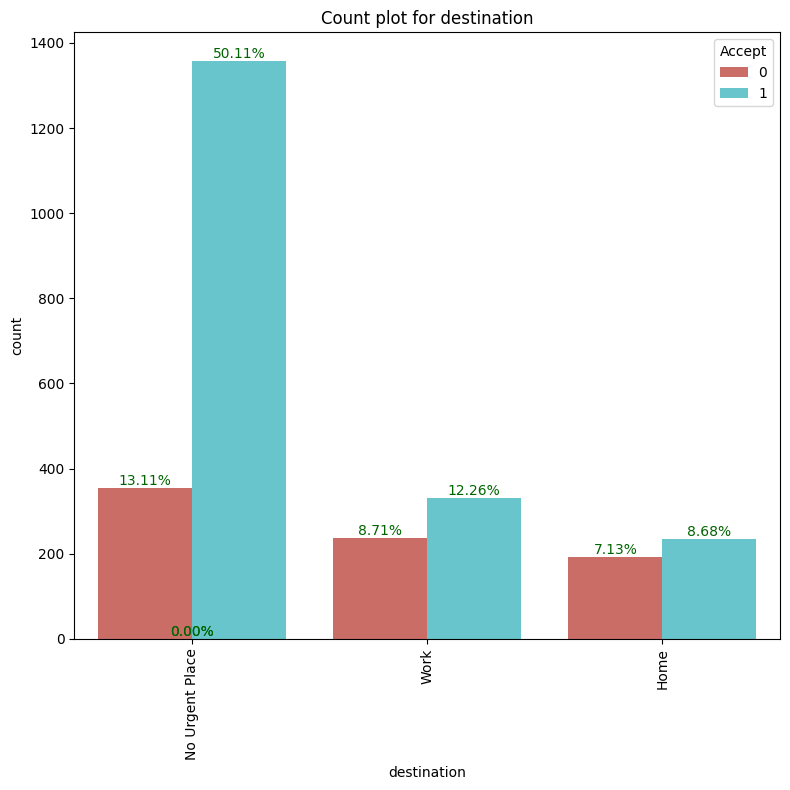

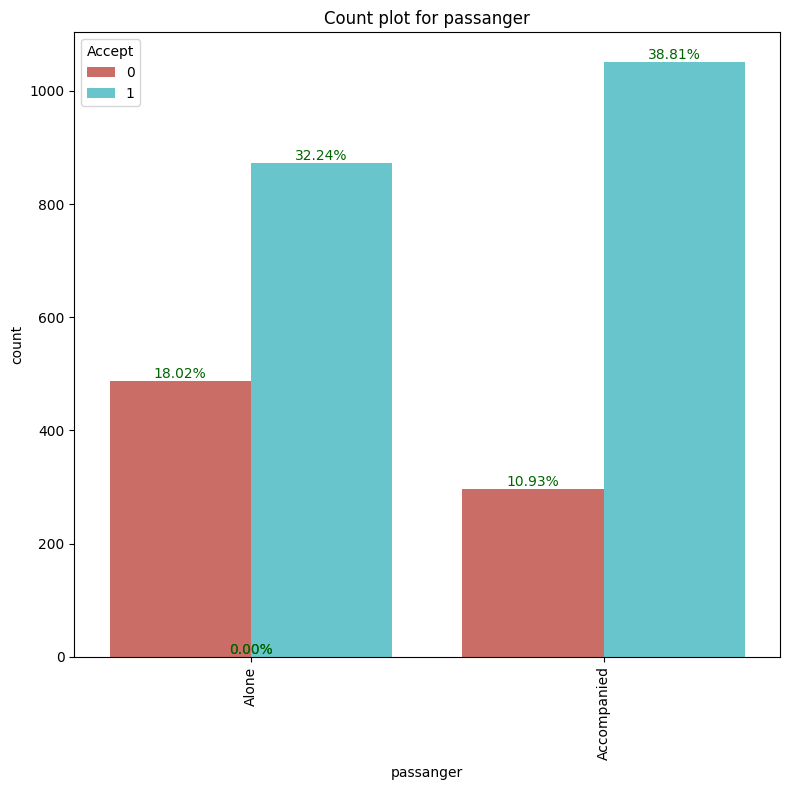

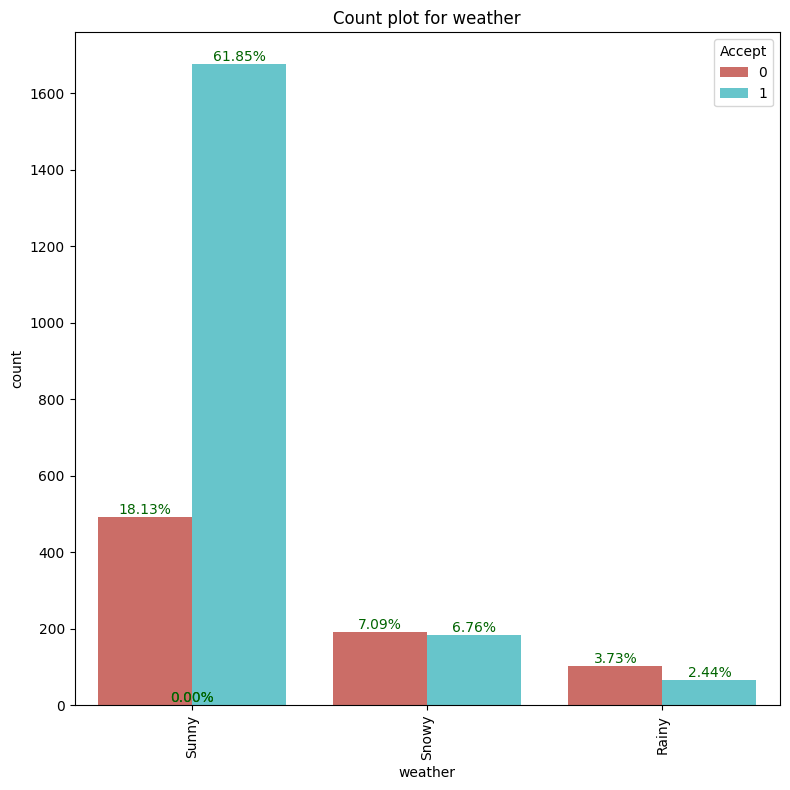

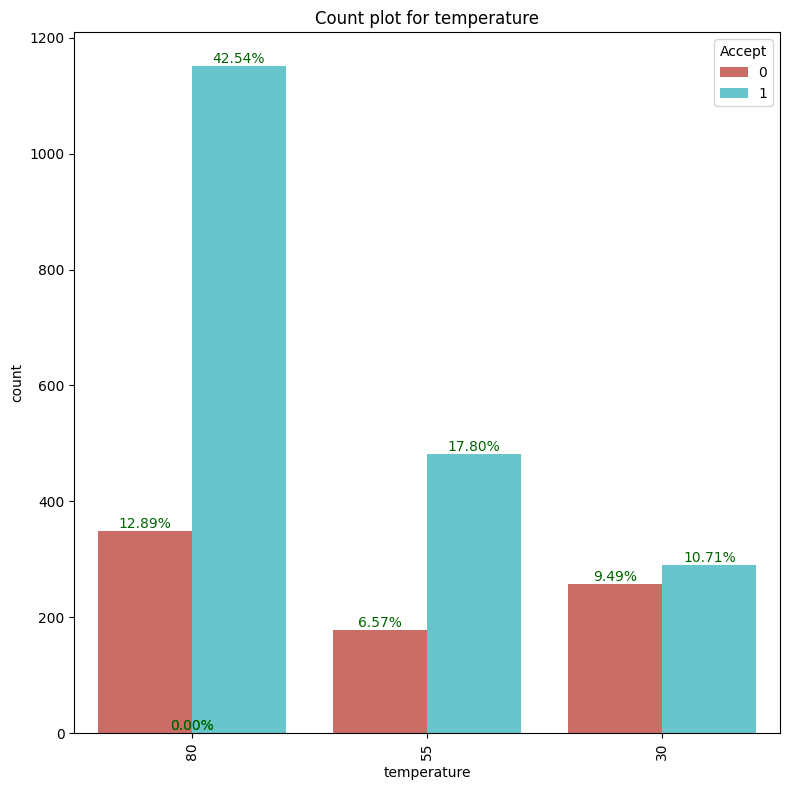

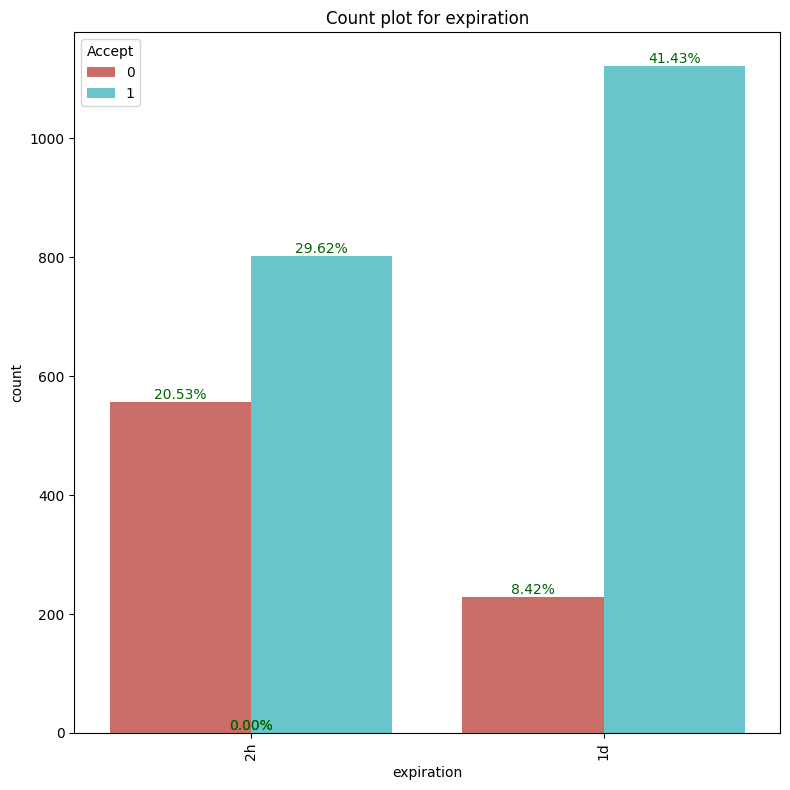

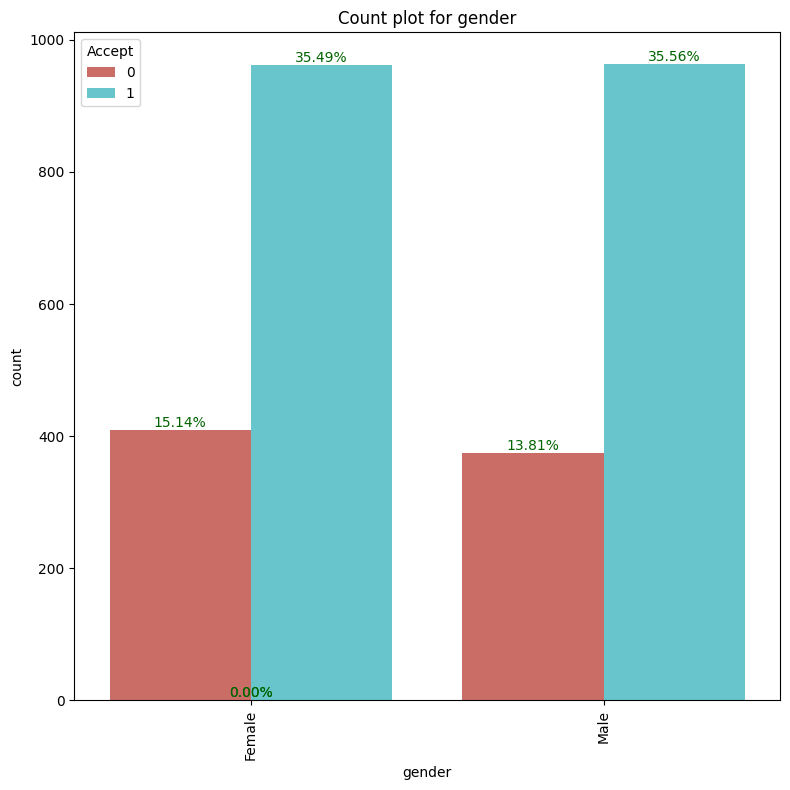

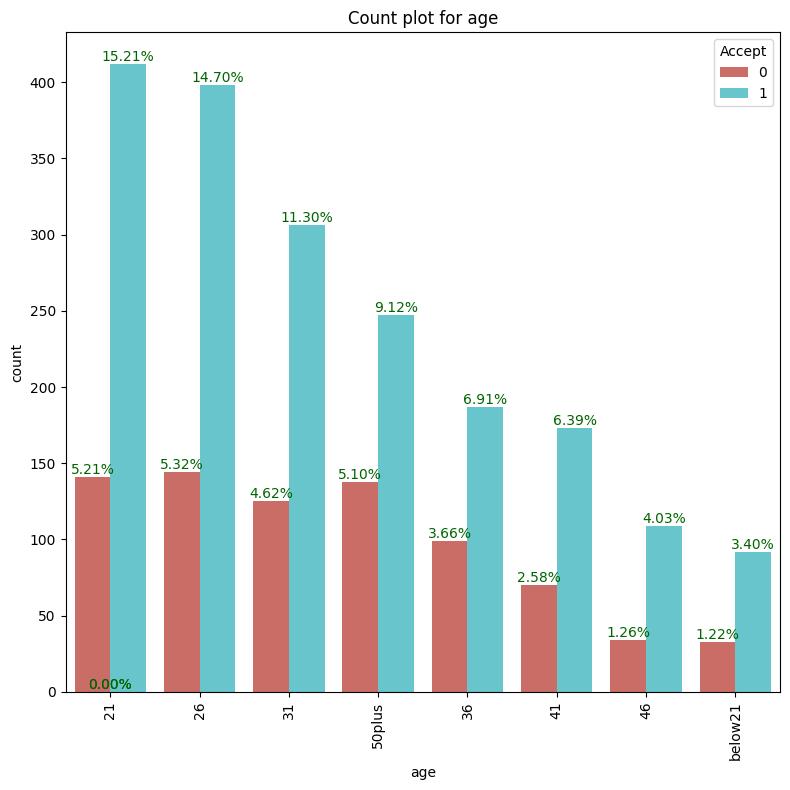

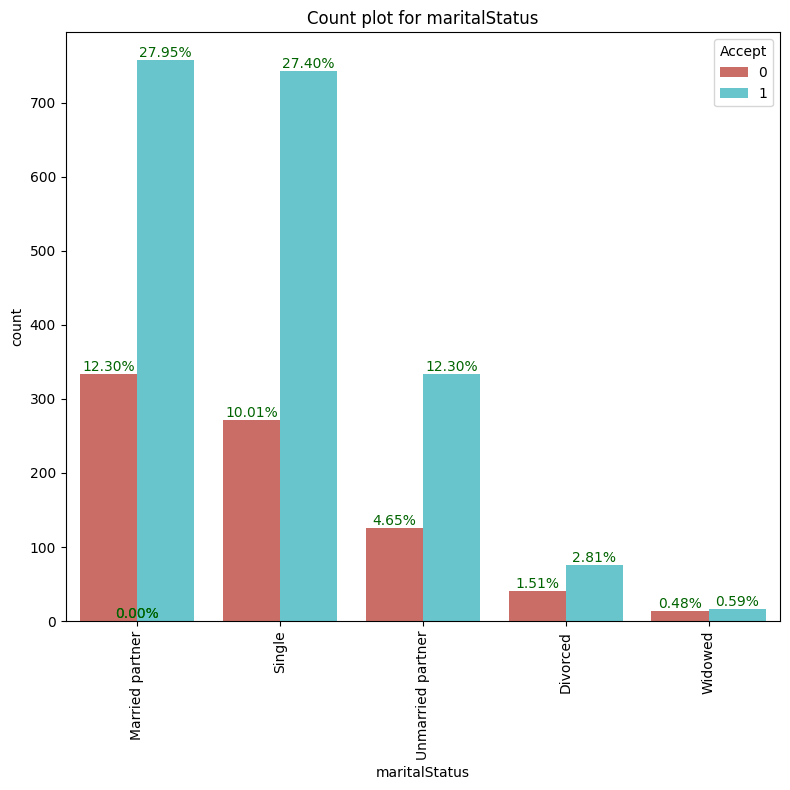

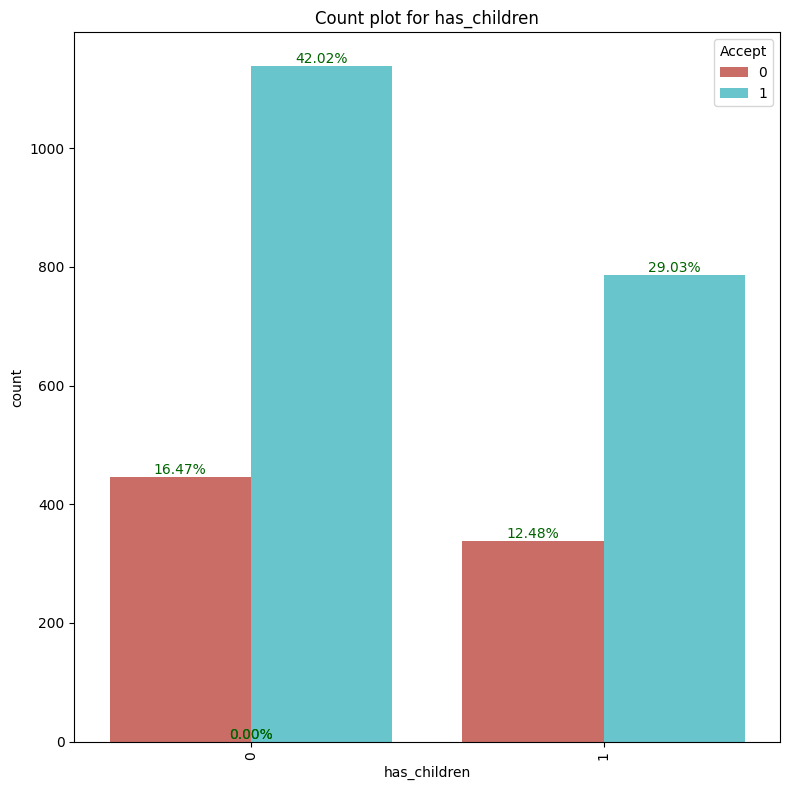

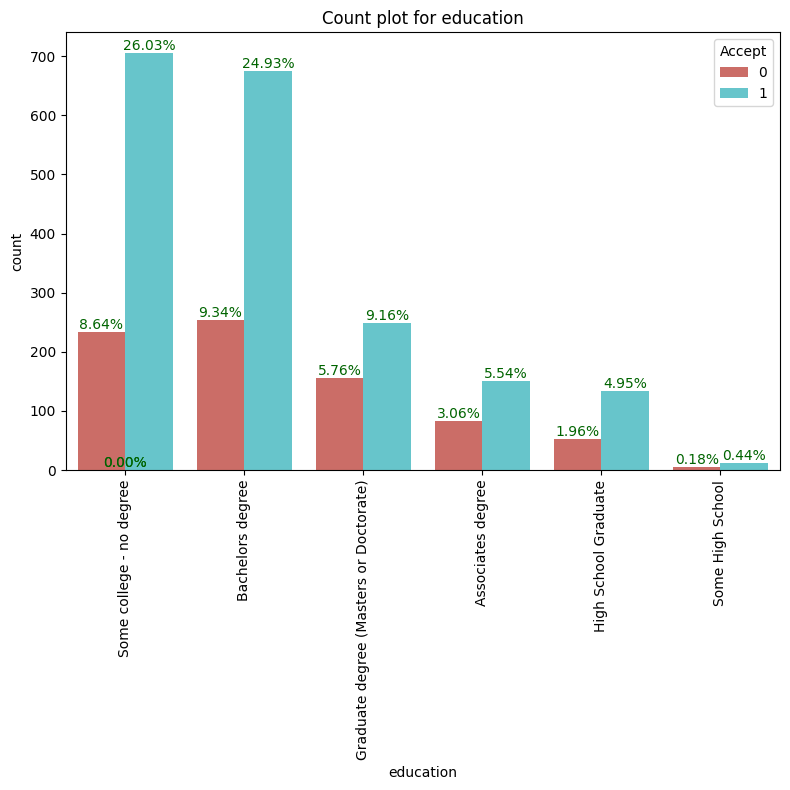

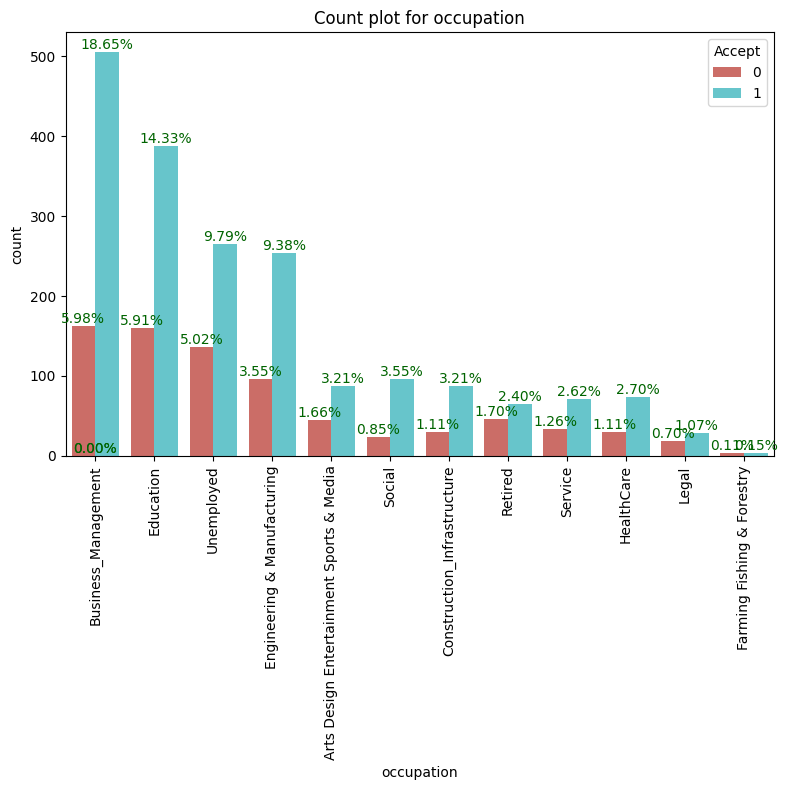

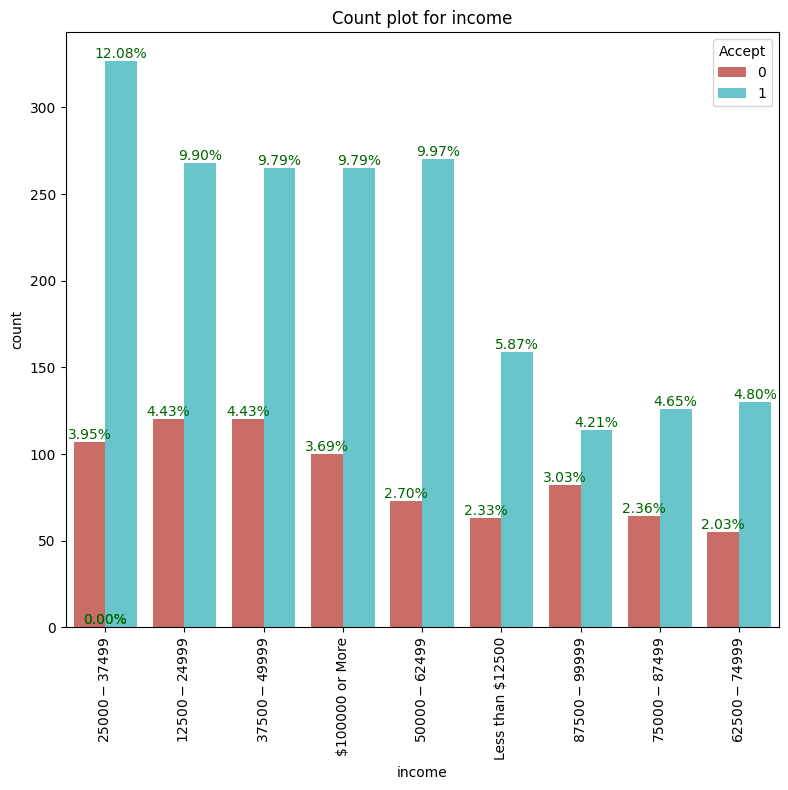

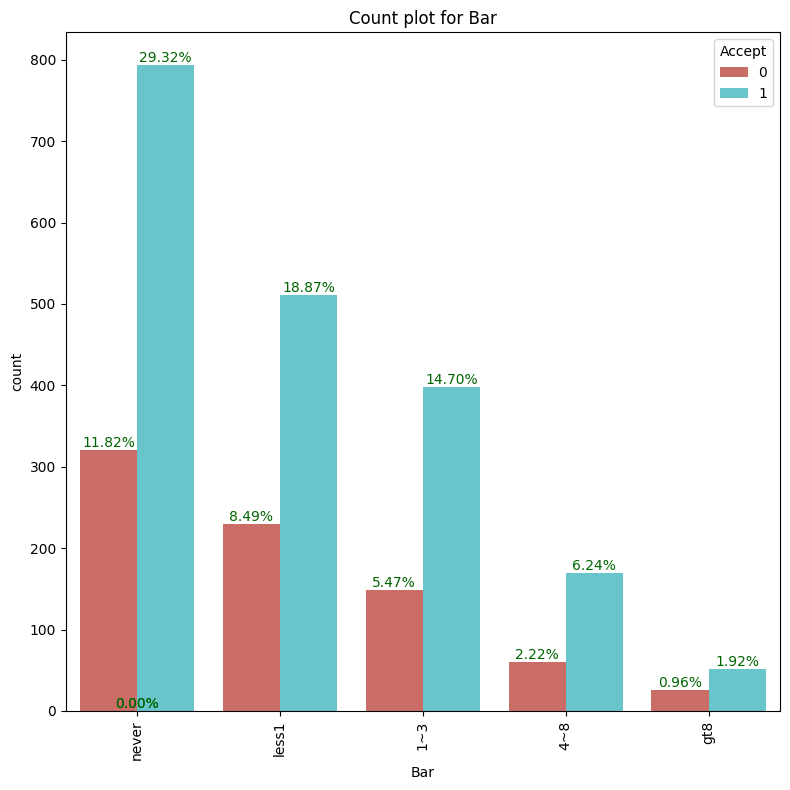

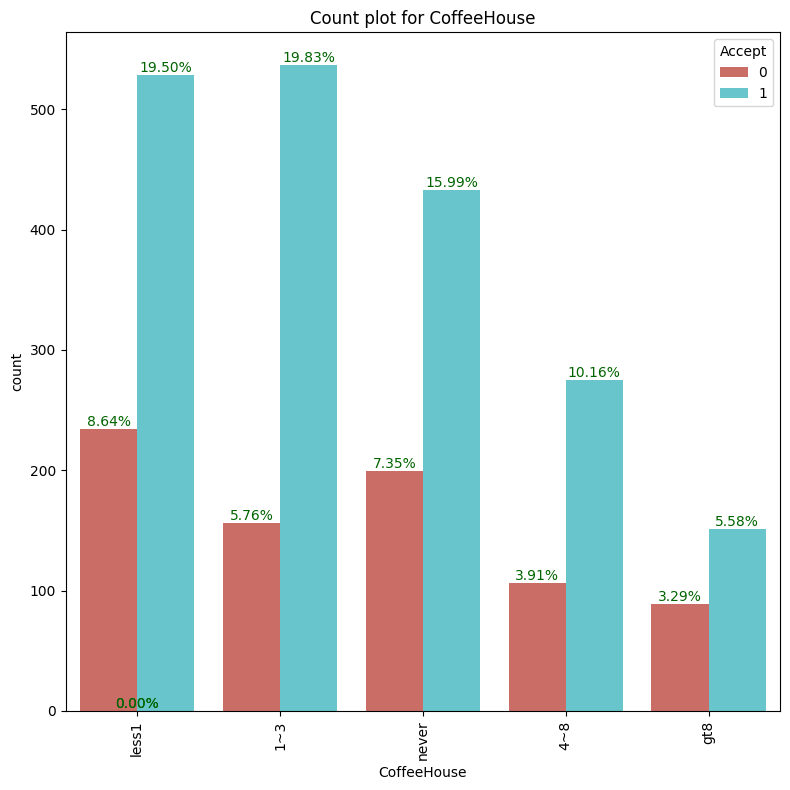

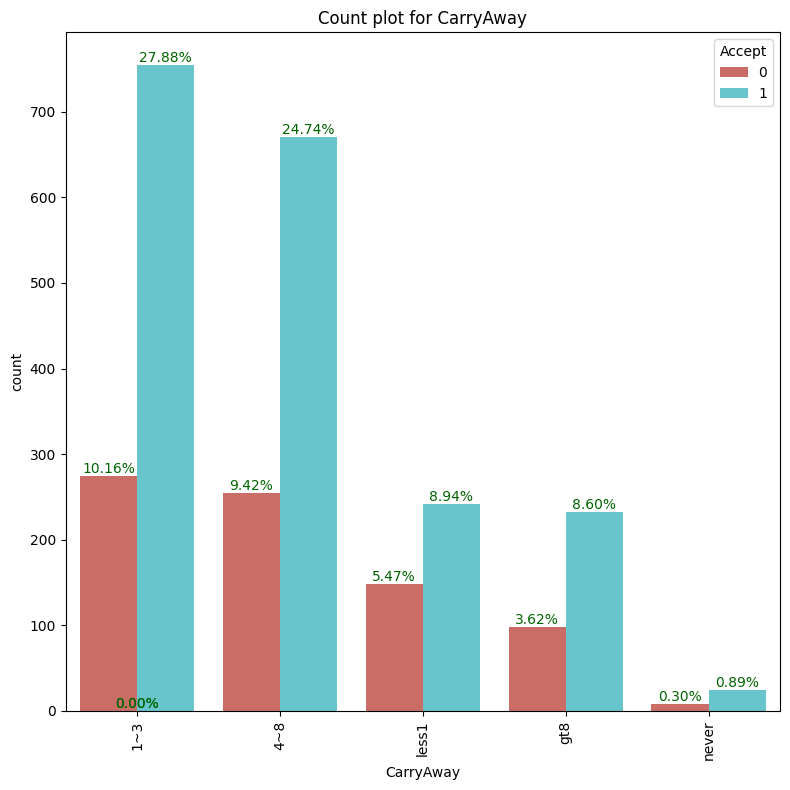

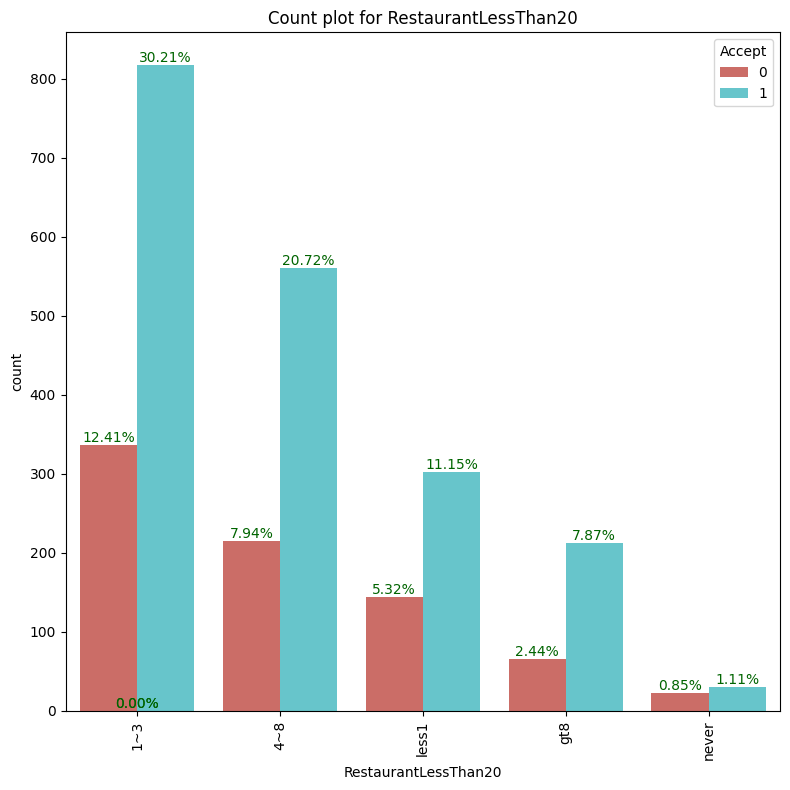

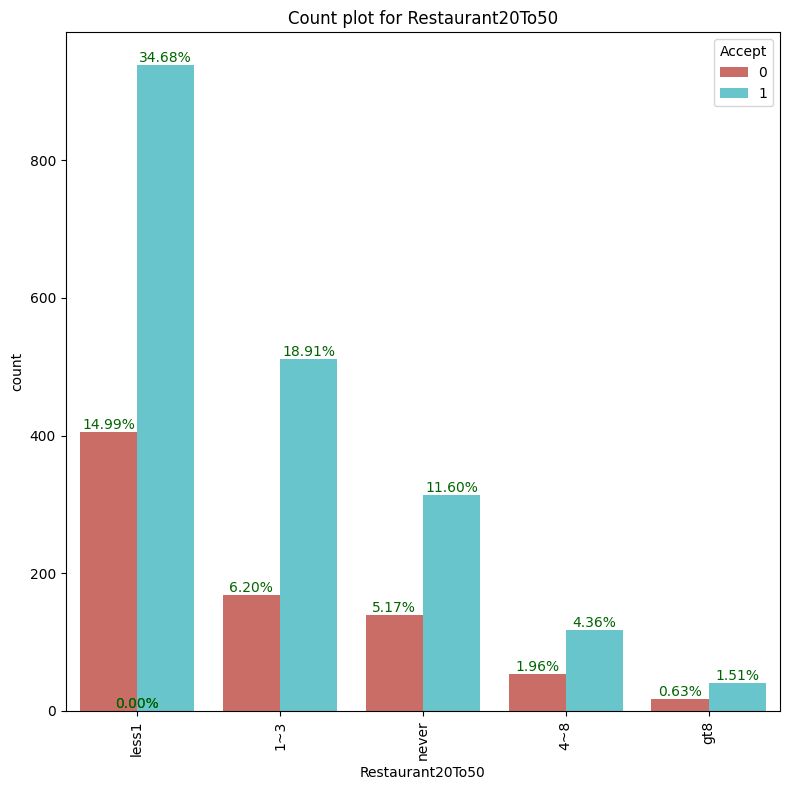

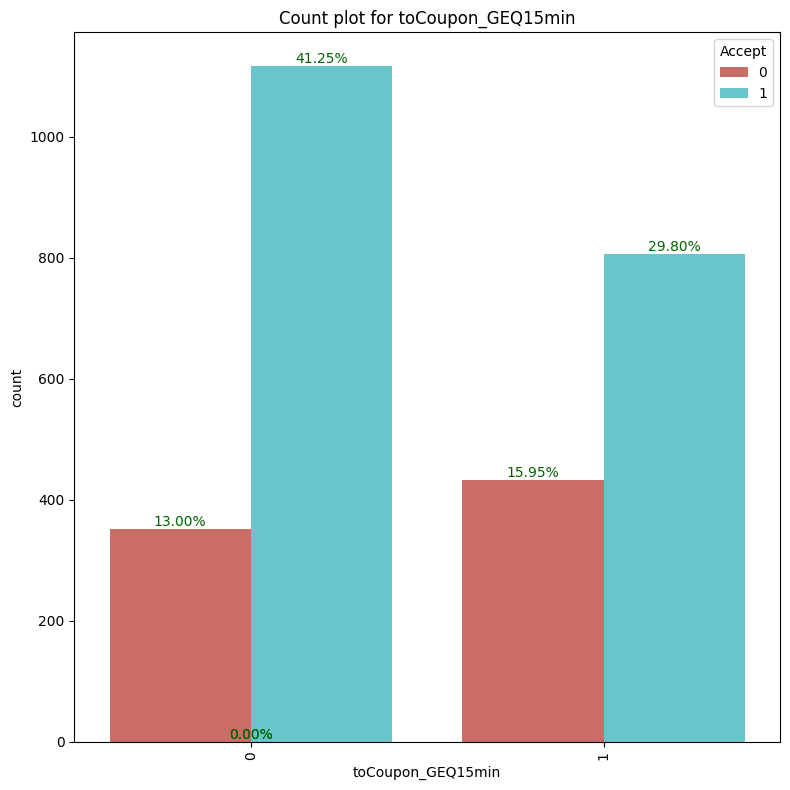

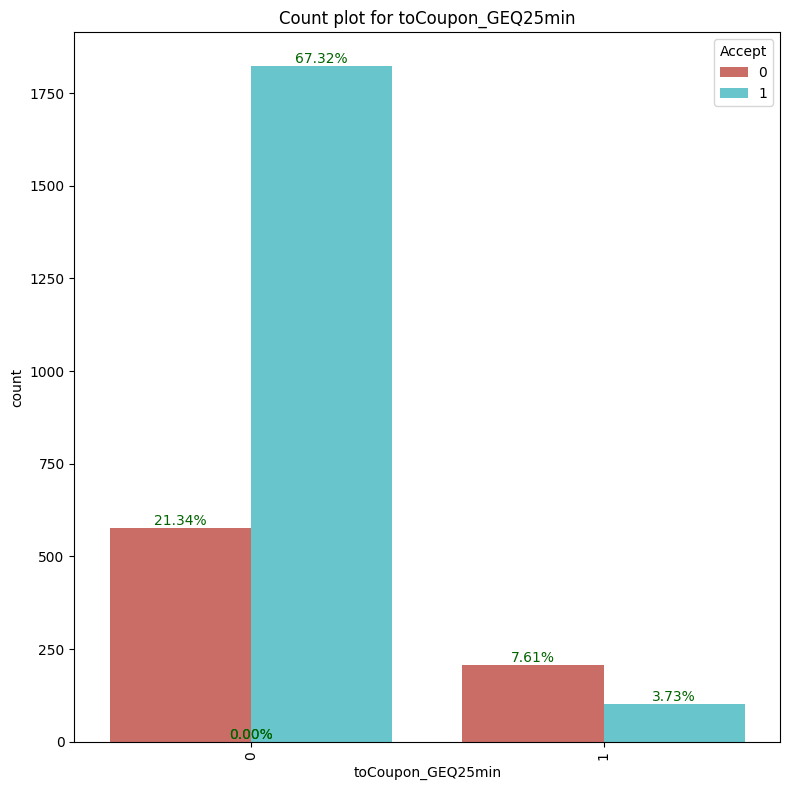

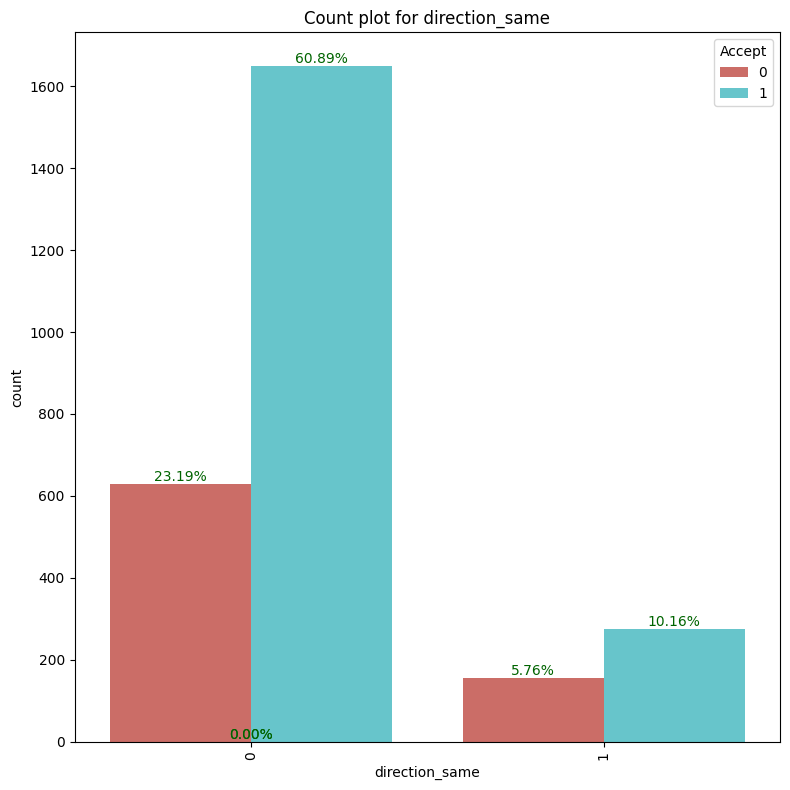

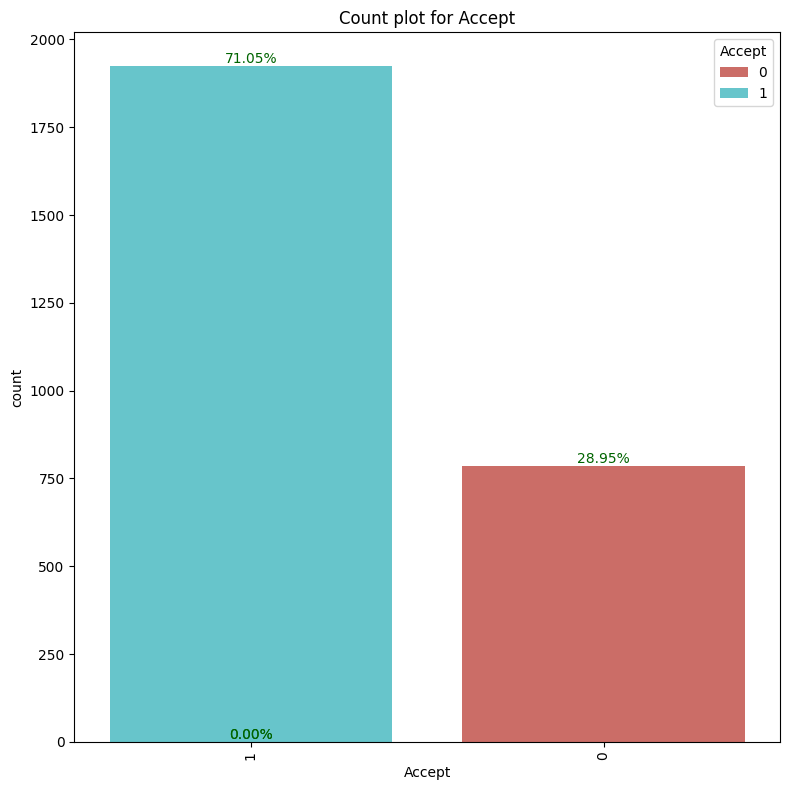

In [ ]:
coupon_count(df_RestaurantLessThan20)



*   The coupon acceptance rate for RestaurantLessThan20 has acceptance rate of 71%.

*   Key Trends observed which influences coupon acceptance are coupon acceptance rate is higher if the traveller has lot of time to reach with no urgency
*   Coupon Acceptance rate is higher when it is a sunny day and are accompanied , No significant difference observed with respect to gender whereas coupouns with expiration validity upto 1 day has higher acceptance . Acceptance rate is higher amongst the age group of 21-31 when compared to others . Married couples and singles accepted coupons when compared to other groups


*  Acceptance rate was observed to be higher for the couples who dont have childern , Business Management professional has the highest acceptance rate when compared to others


*   Individuals who never go to bar and visited coffee House between less1 times a month and opted for carry away between 1-3 times visited Restaurant less than 20$ and visited Restaurant to 20-50 less1 had higher acceptance rate for coffee house coupons.






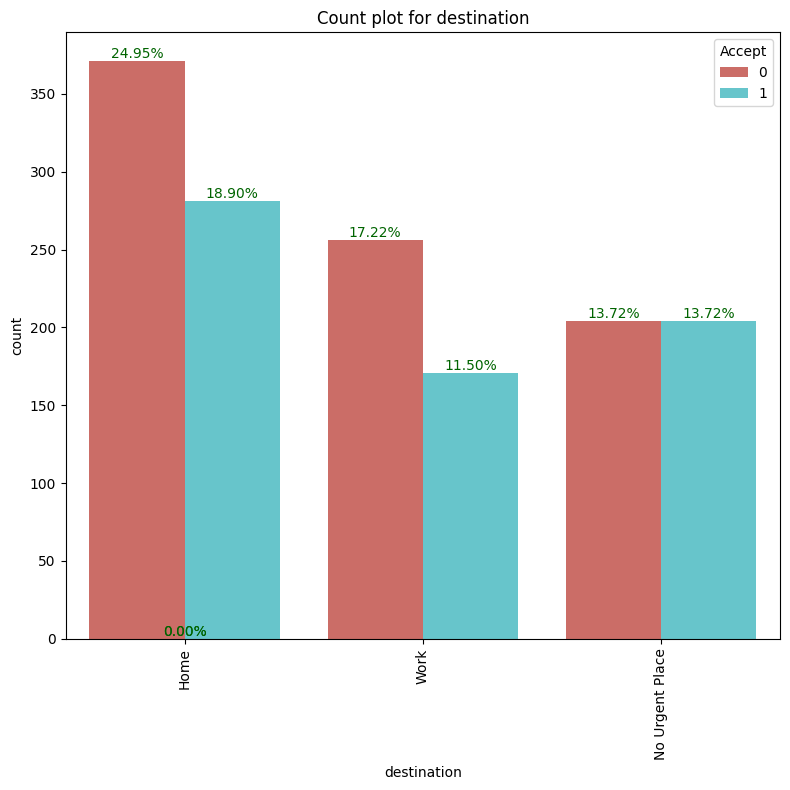

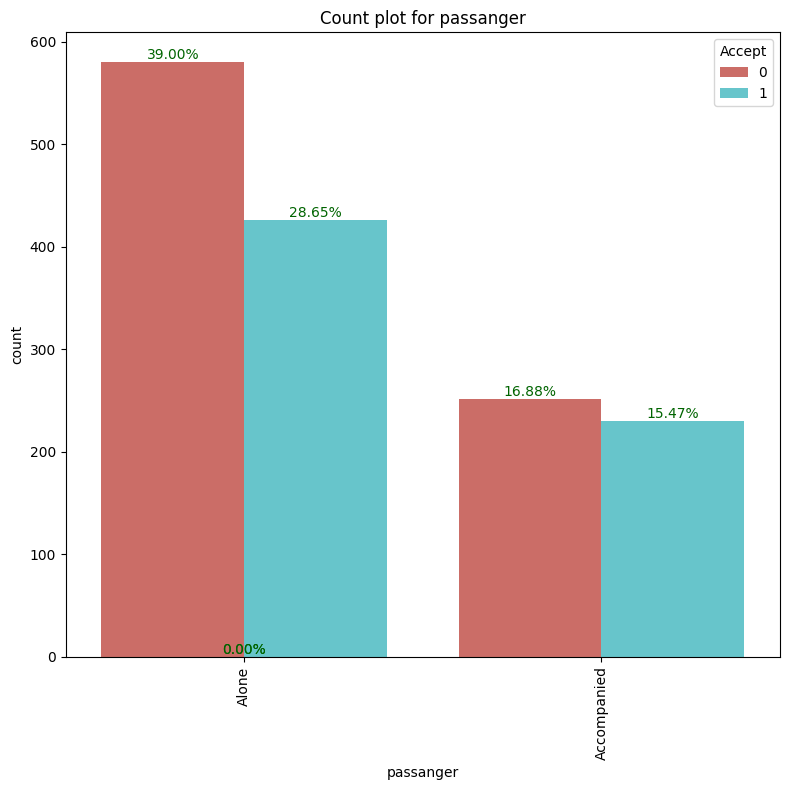

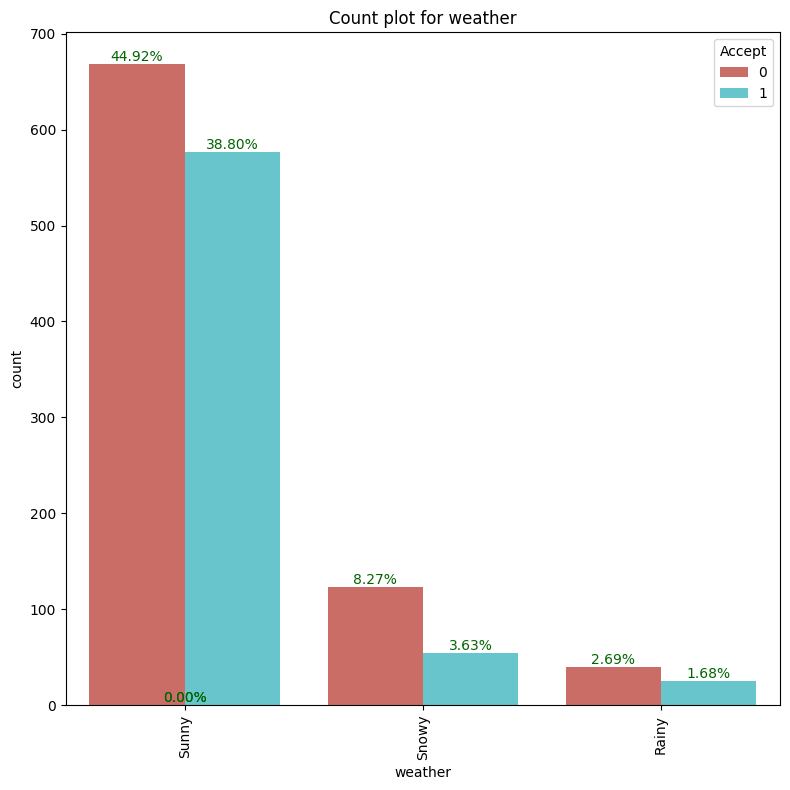

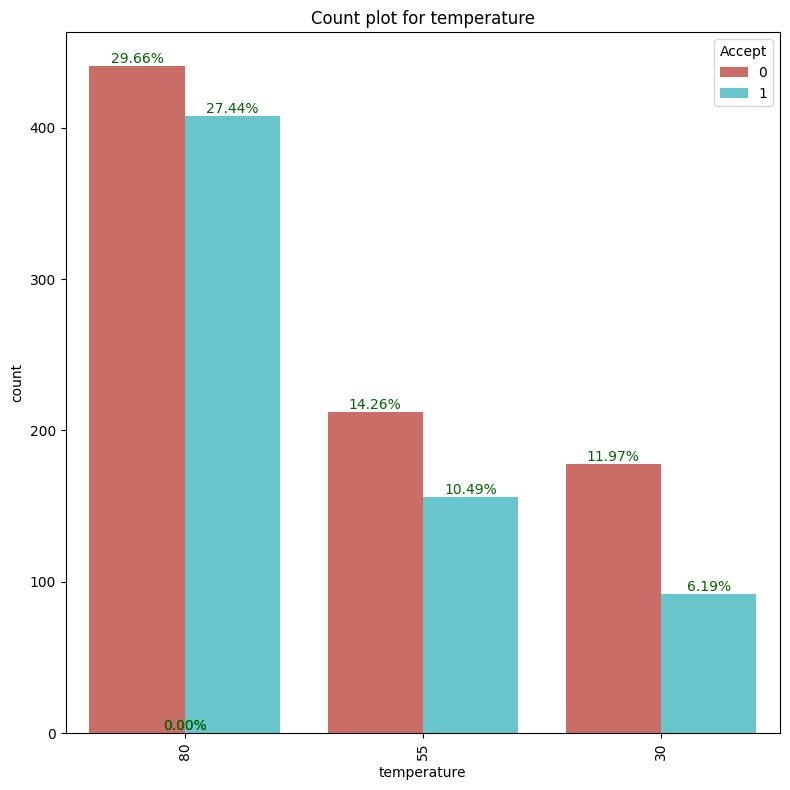

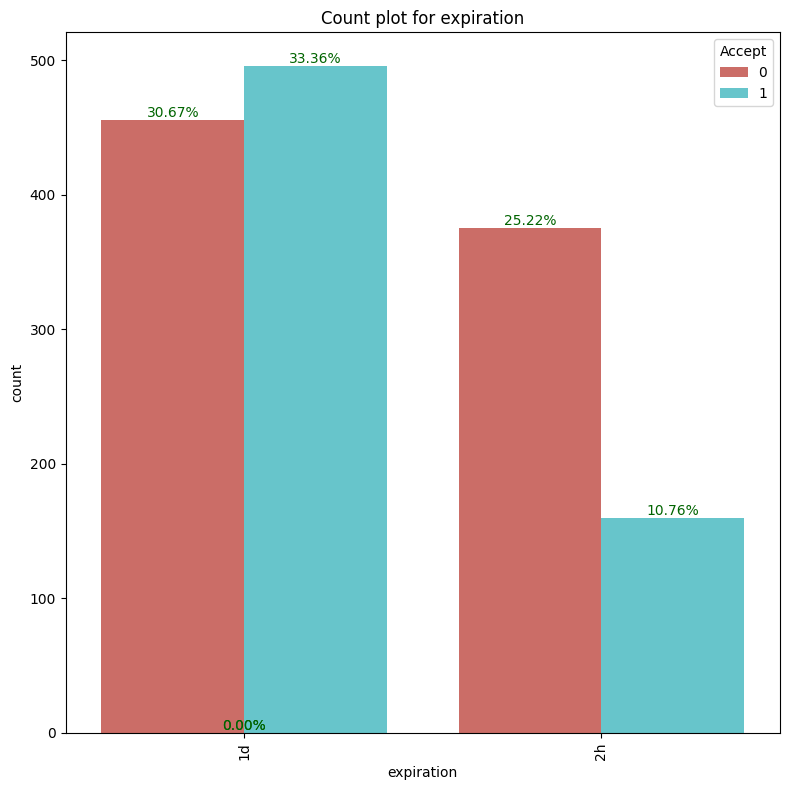

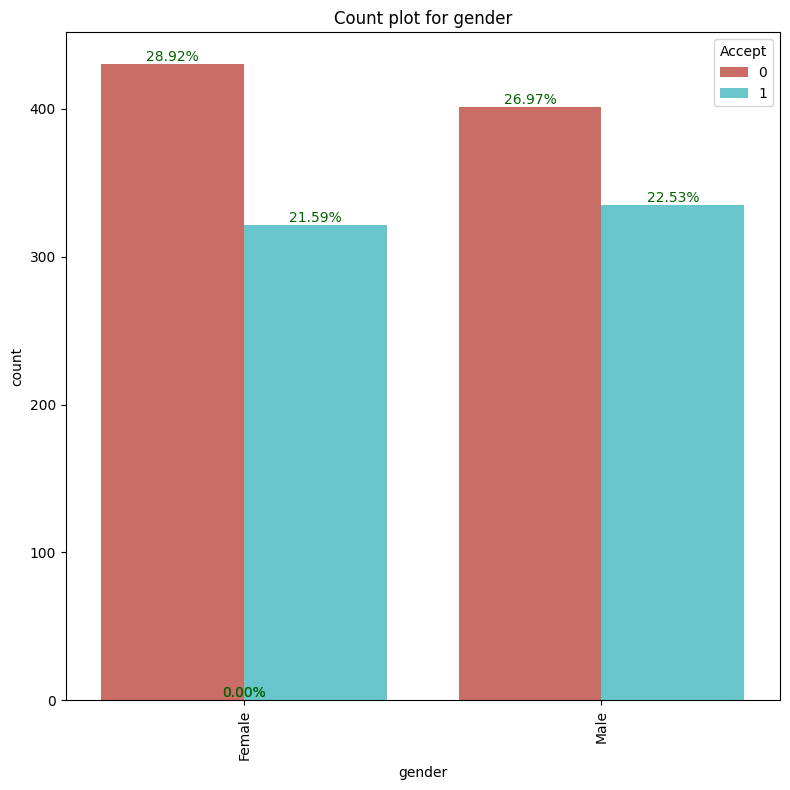

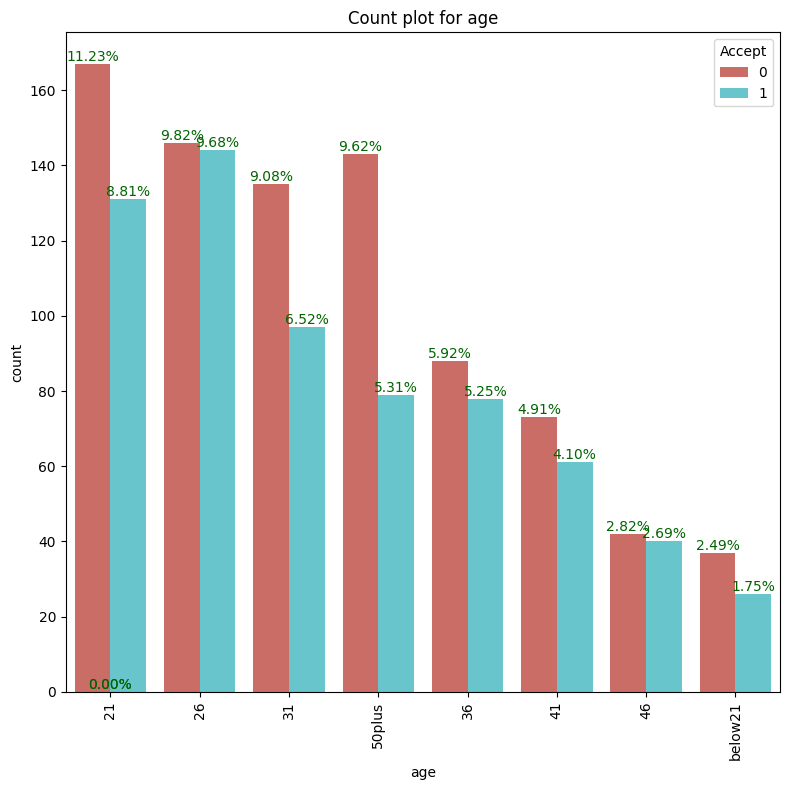

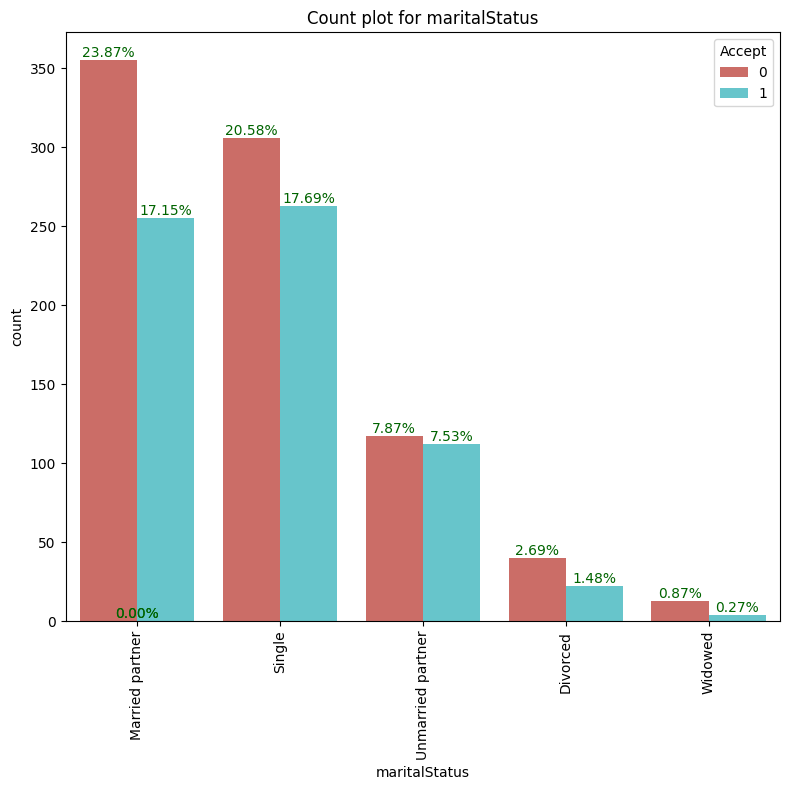

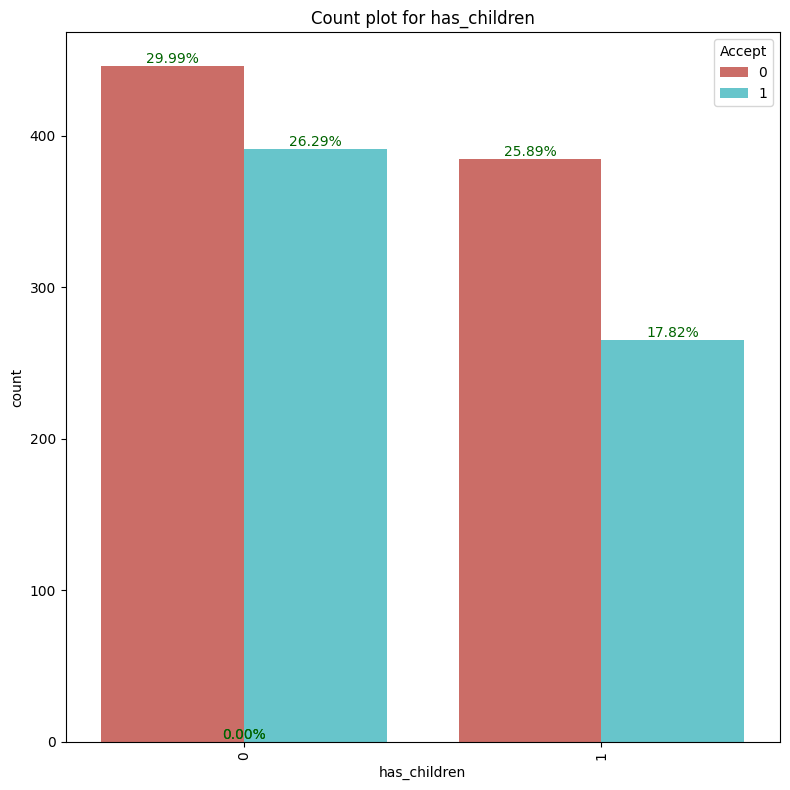

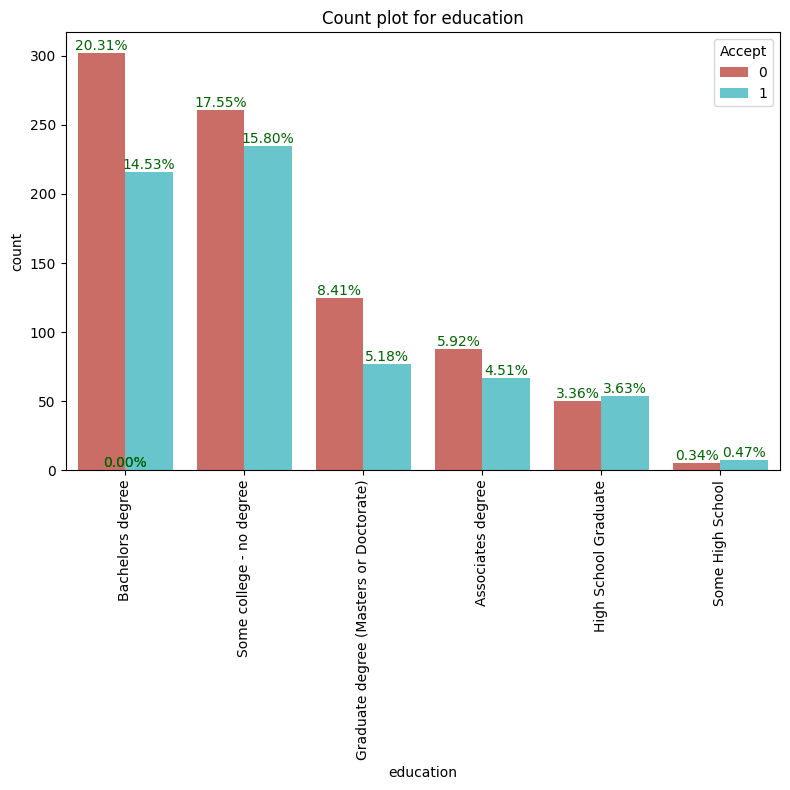

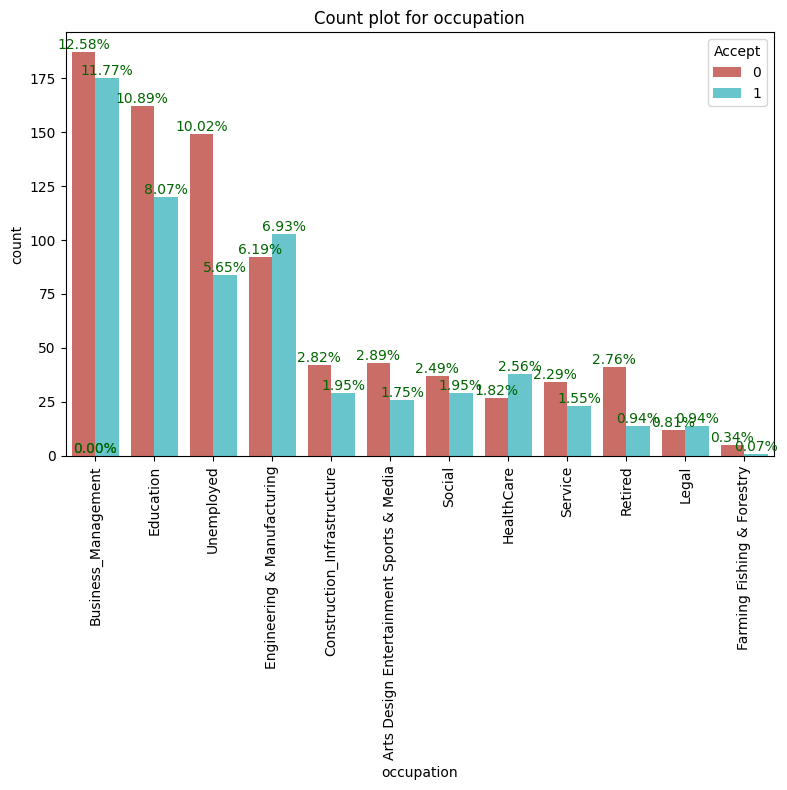

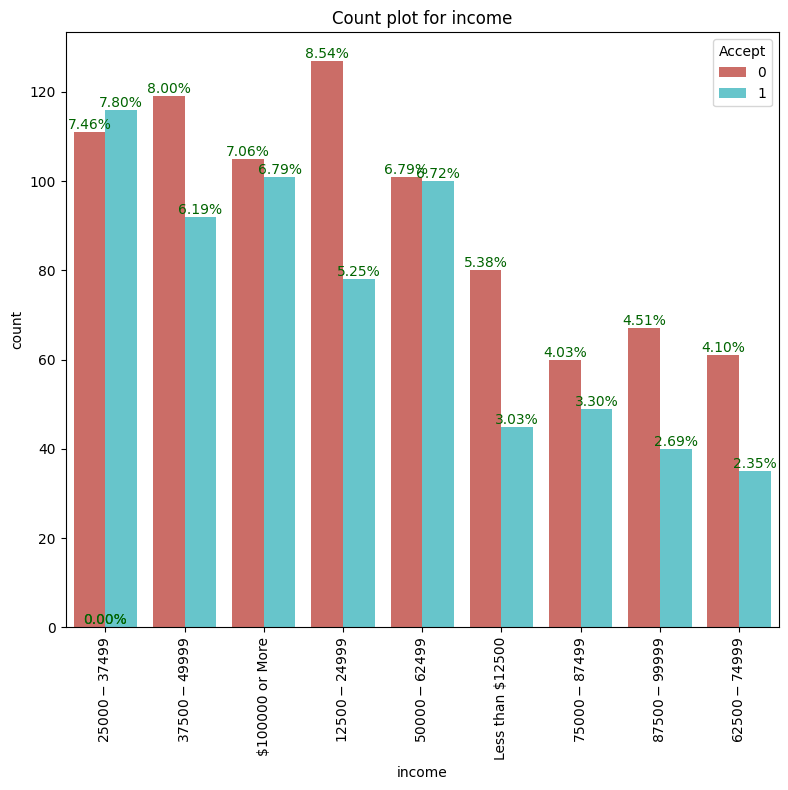

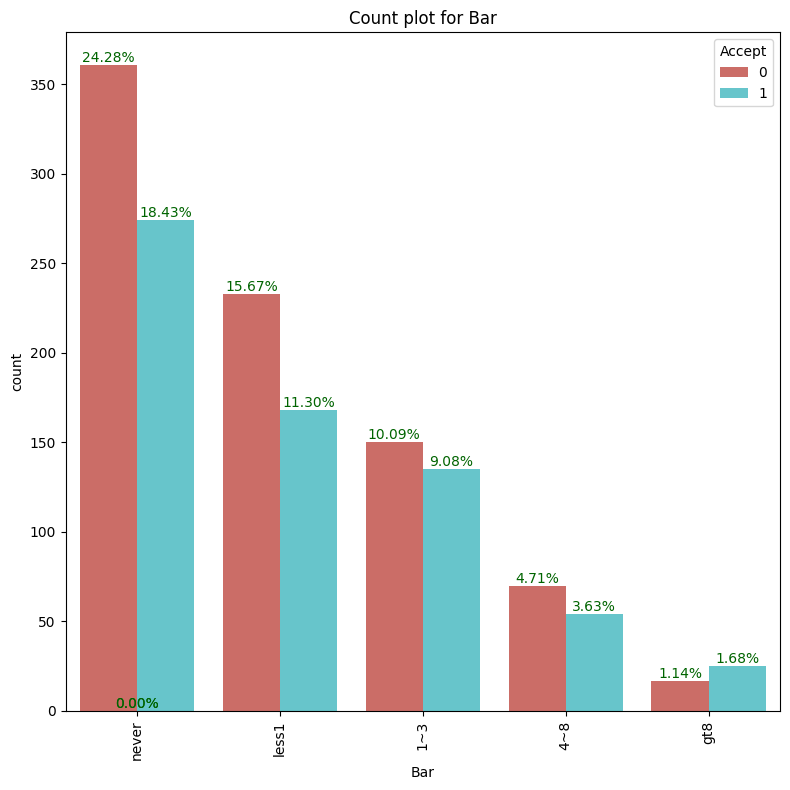

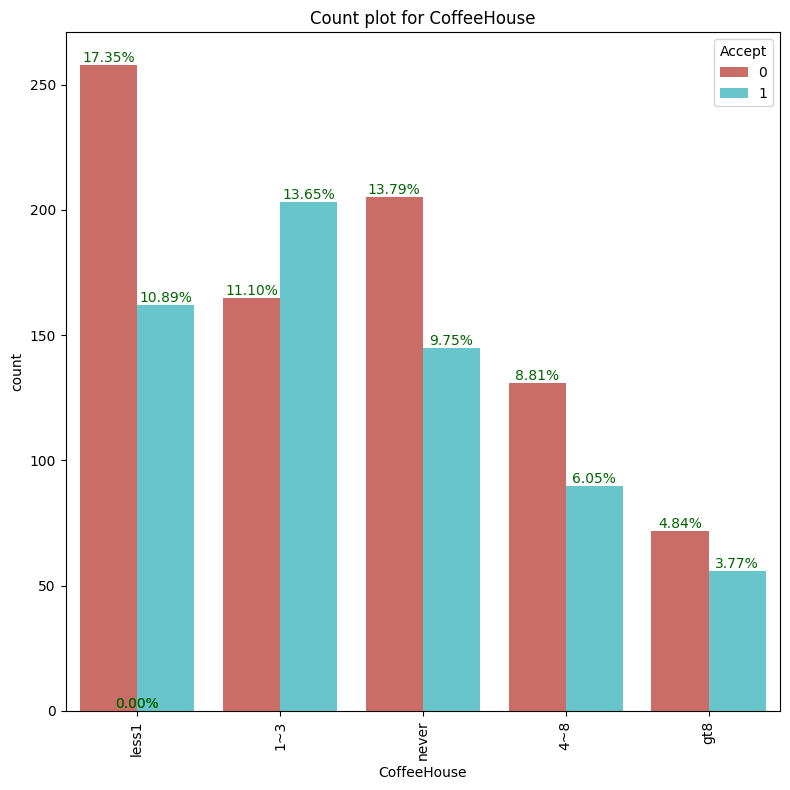

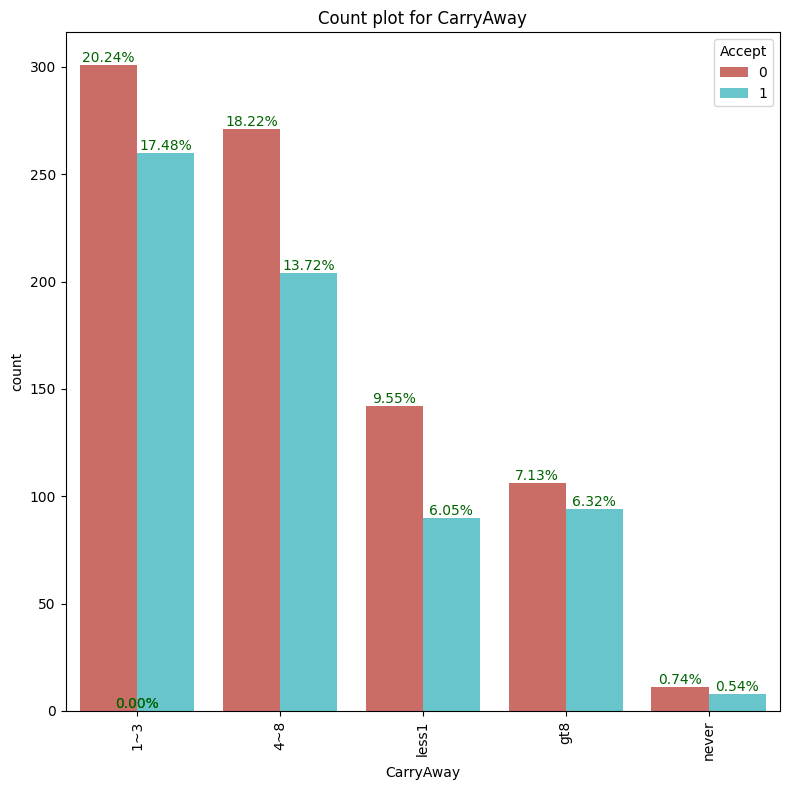

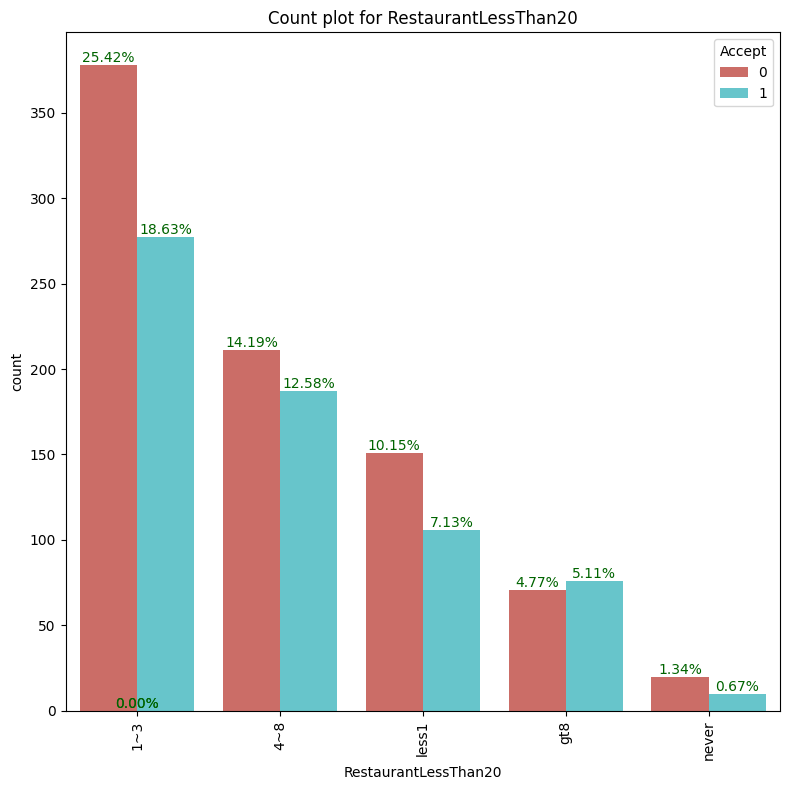

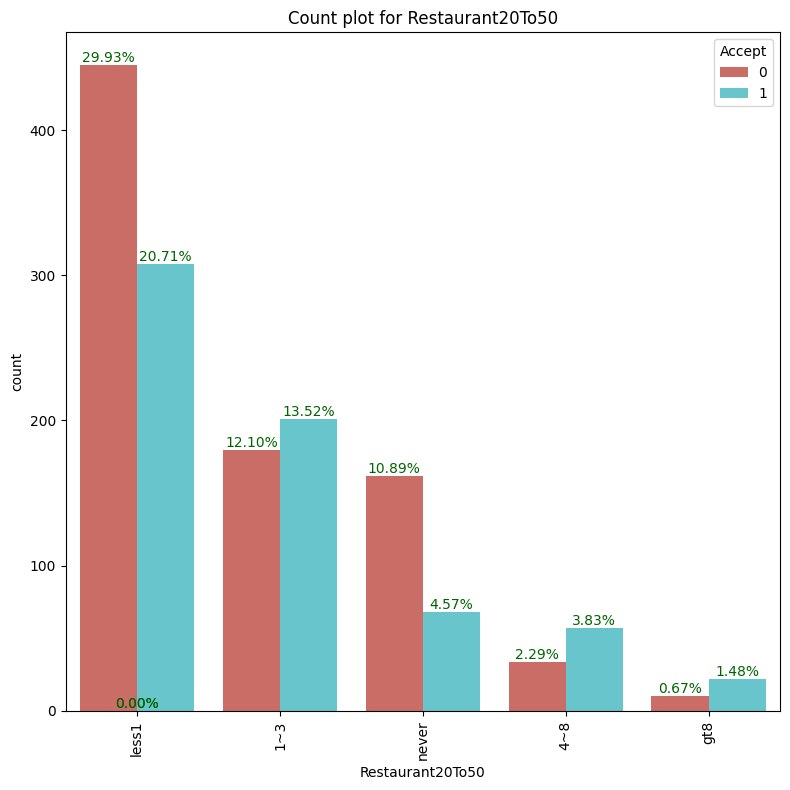

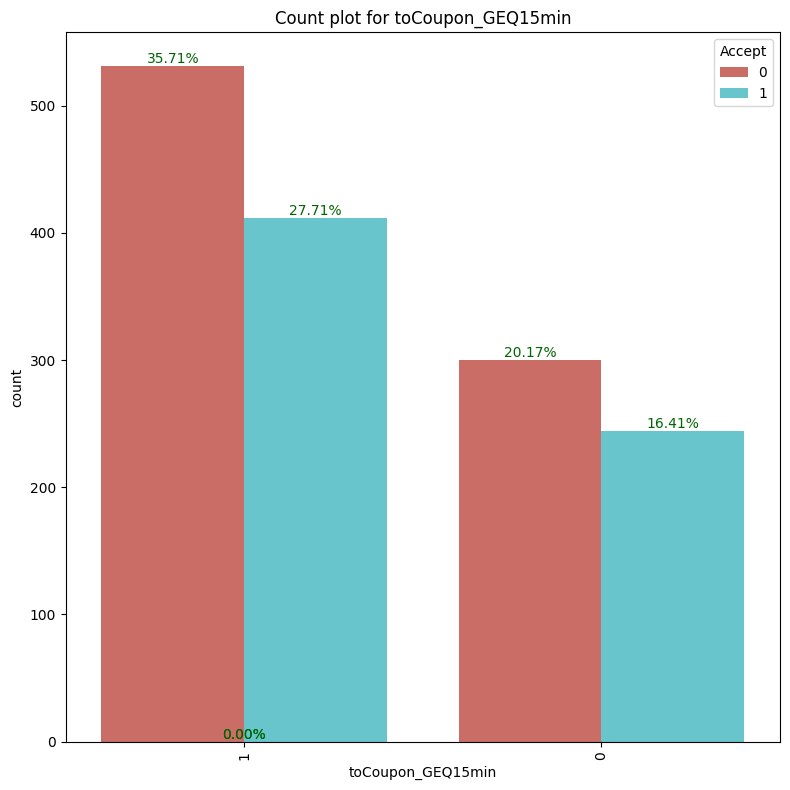

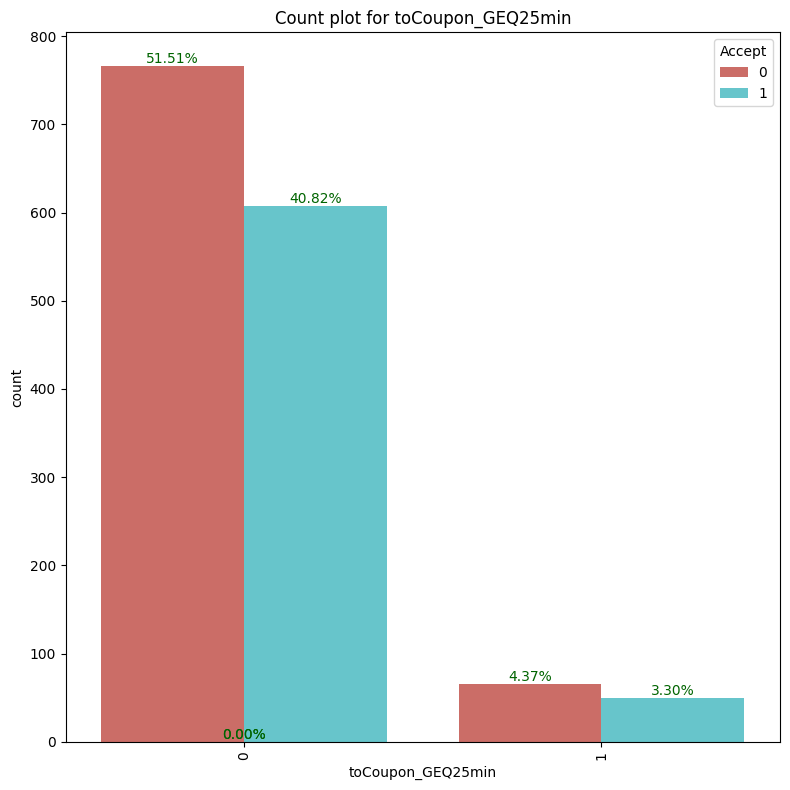

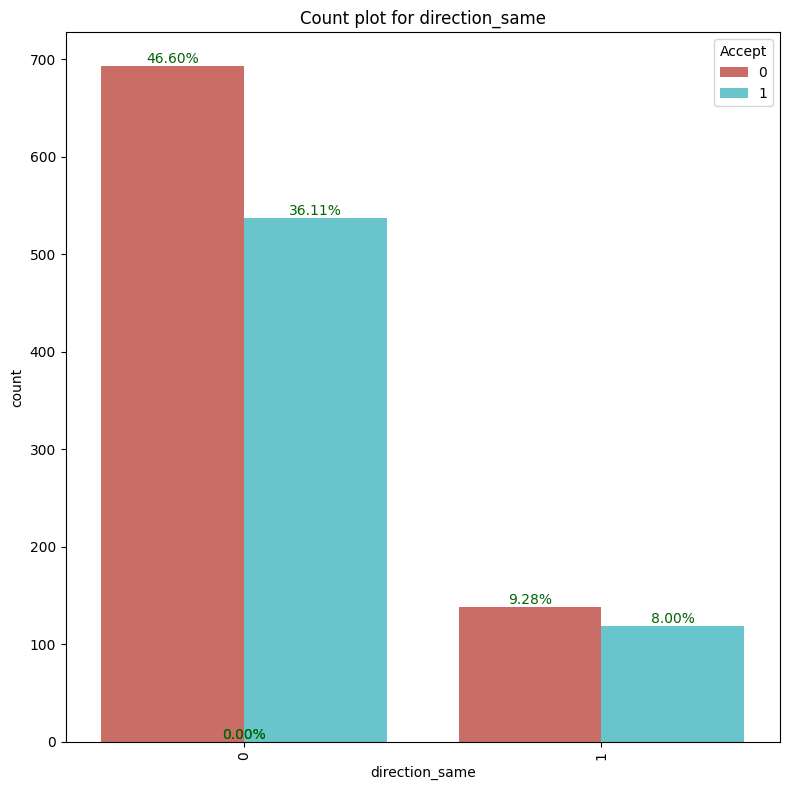

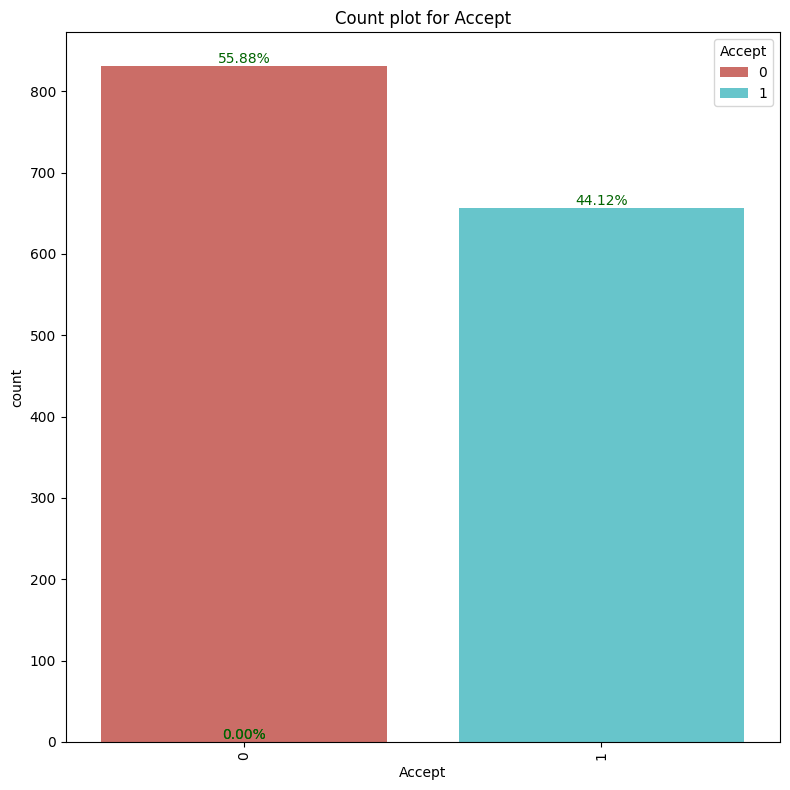

In [ ]:
coupon_count(df_Restaurant20To50)



*   
The coupon acceptance rate for Restaurant20to50 has acceptance rate of 44.12%



*   Coupon Acceptance rate is higher when it is a sunny day and are Alone , No significant difference observed with respect to gender whereas coupouns with expiration validity upto 1 day has higher acceptance . Acceptance rate is higher amongst the age group of 21-31 when compared to others . Married couples and singles accepted coupons when compared to other groups
*   Acceptance rate was observed to be higher for the couples who dont have childern , Business Management professional has the highest acceptance rate when compared to others

*   Individuals who never go to bar ,visited coffee house between 1-3 times in a month,opted for carry away 1-3 in a month, visited a restuartant where the bill is less than 20 between 1-3 usually have higher acceptance rate for Restaurant(20-50) coupons.




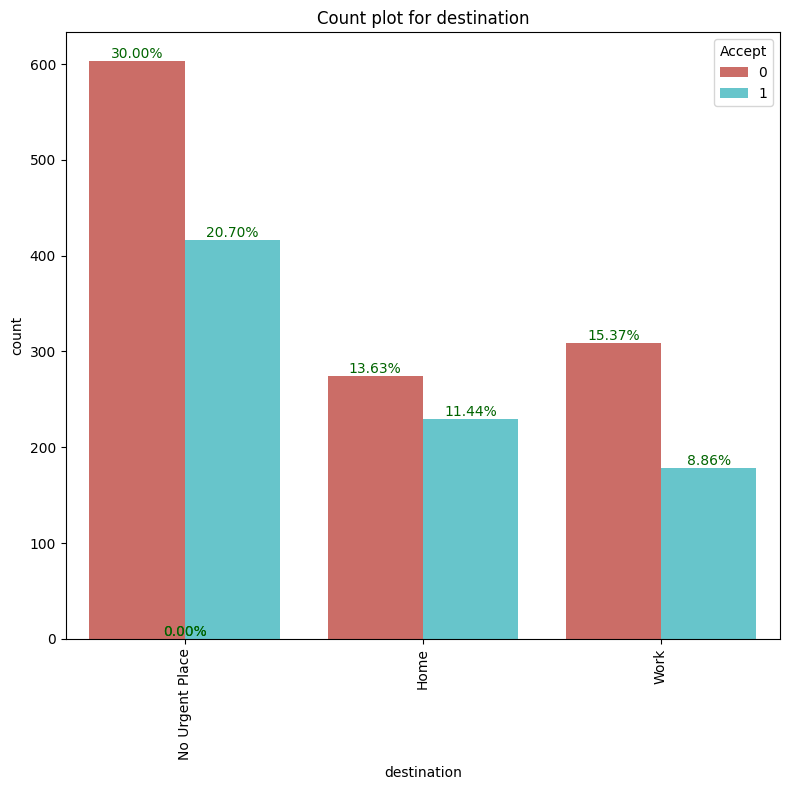

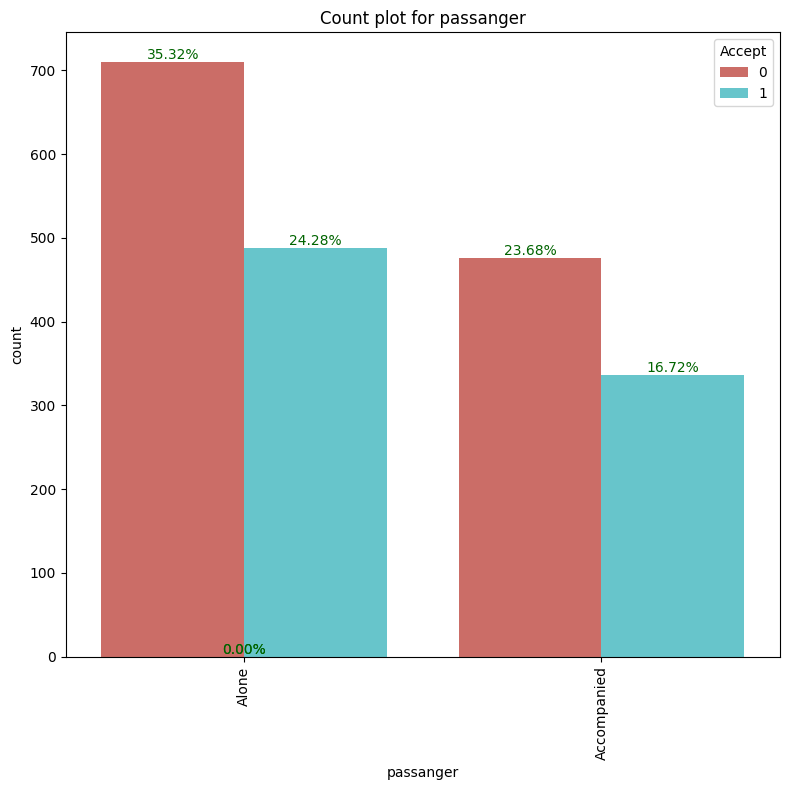

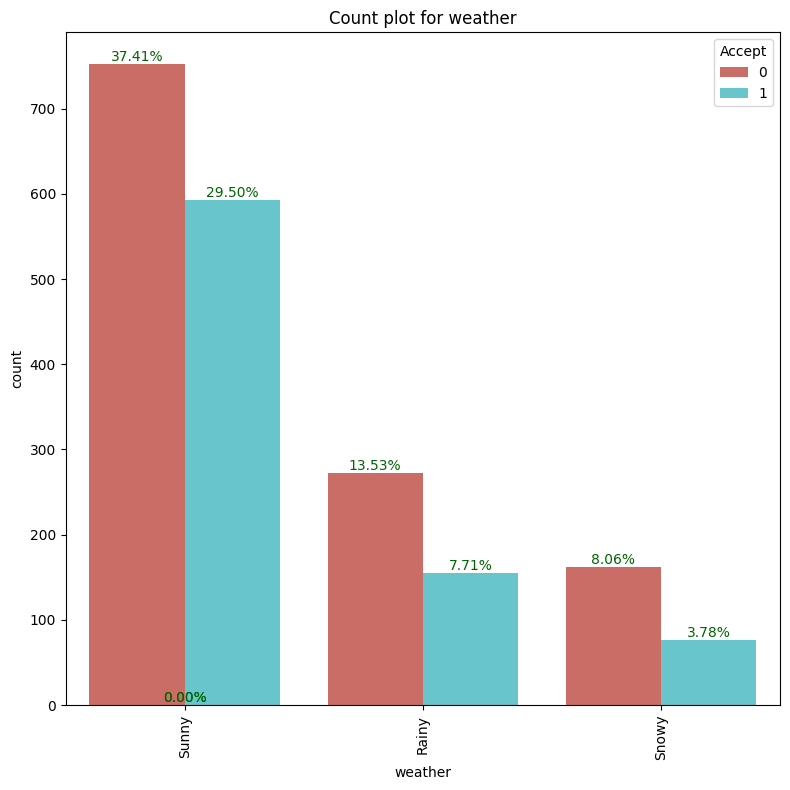

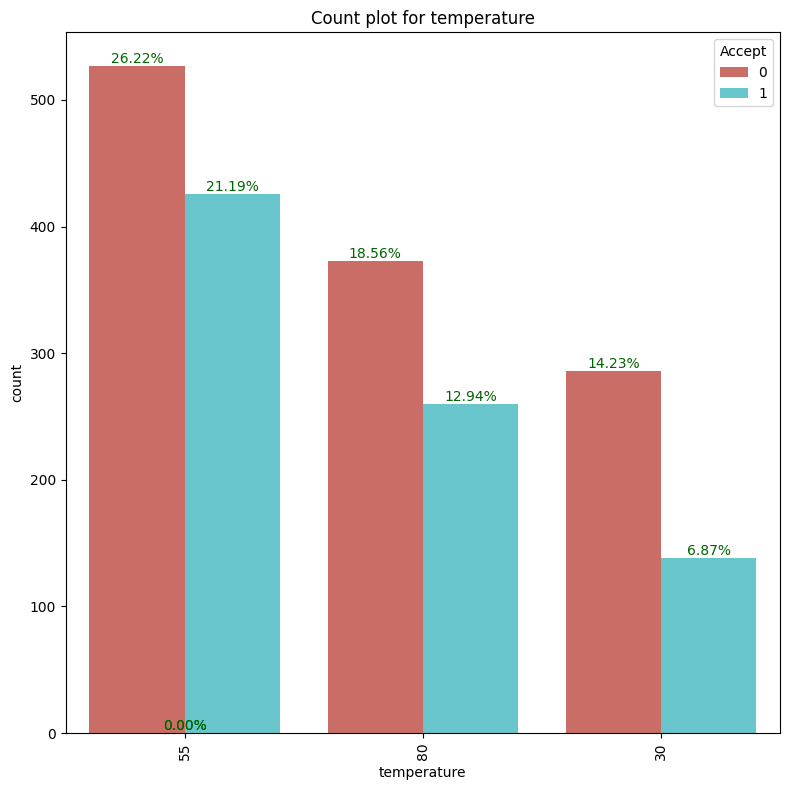

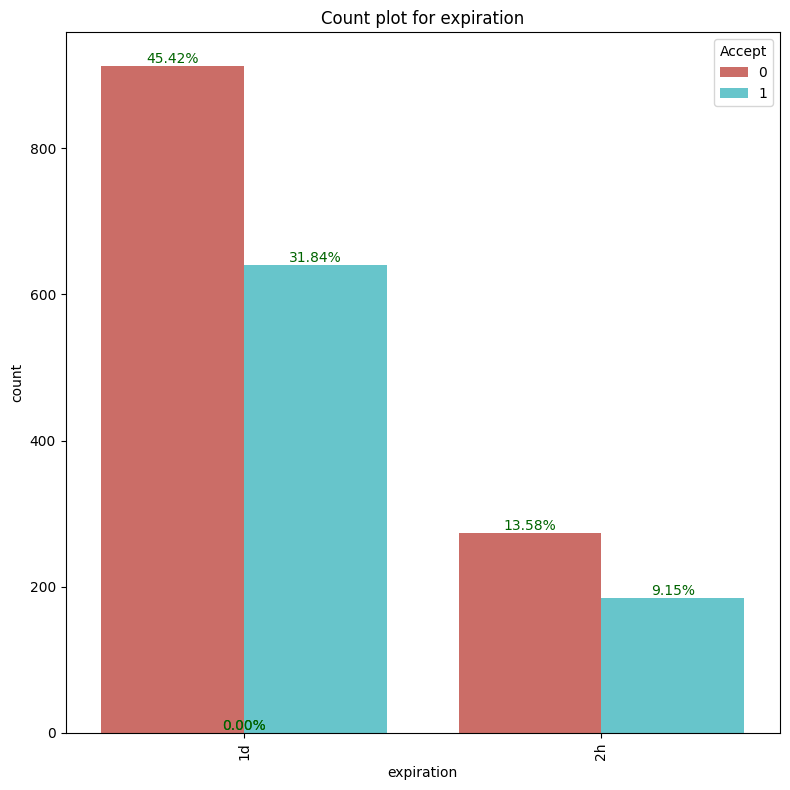

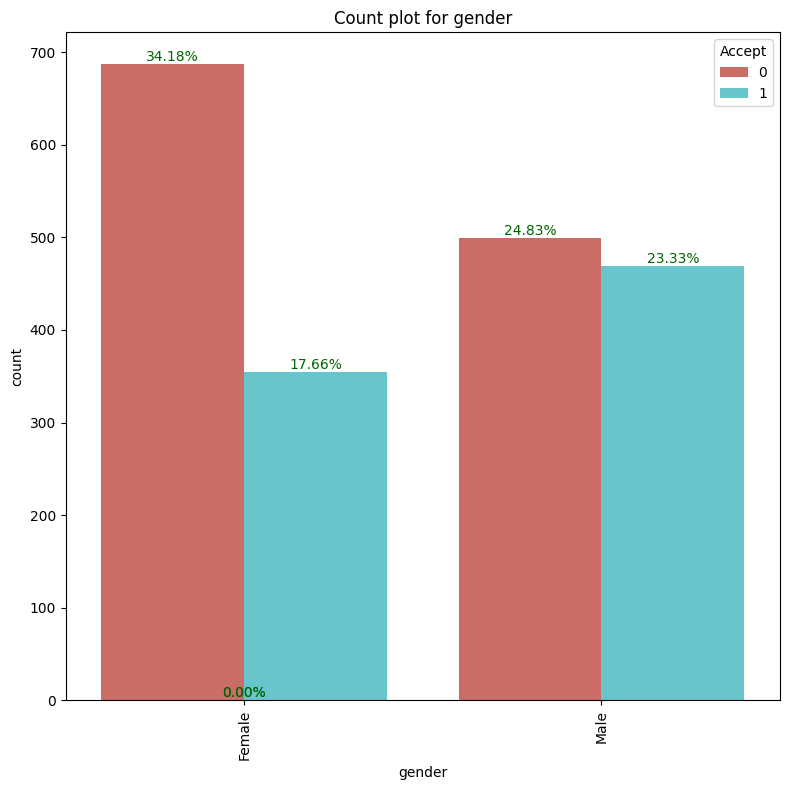

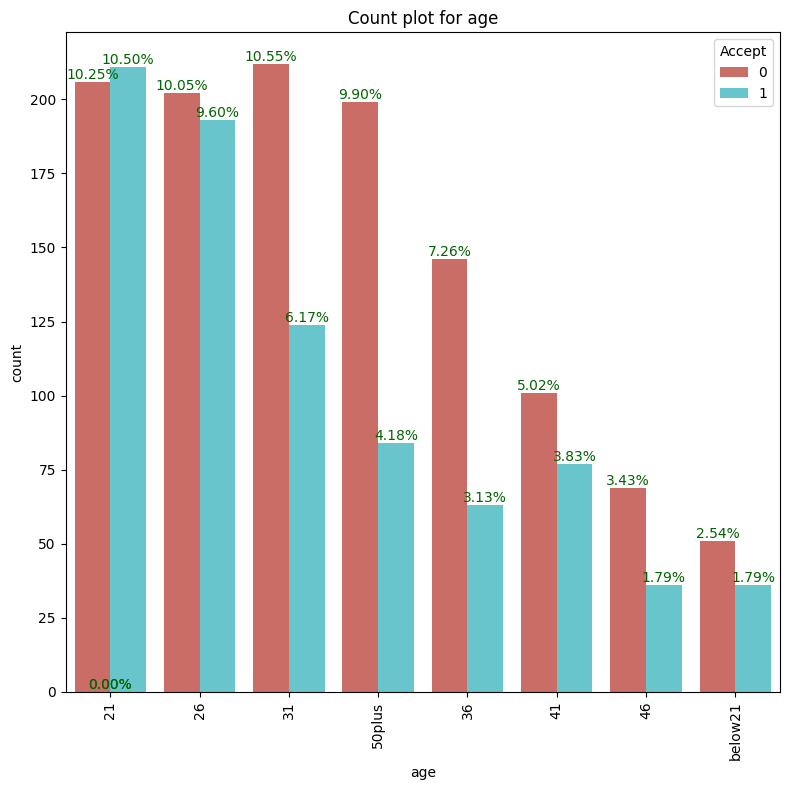

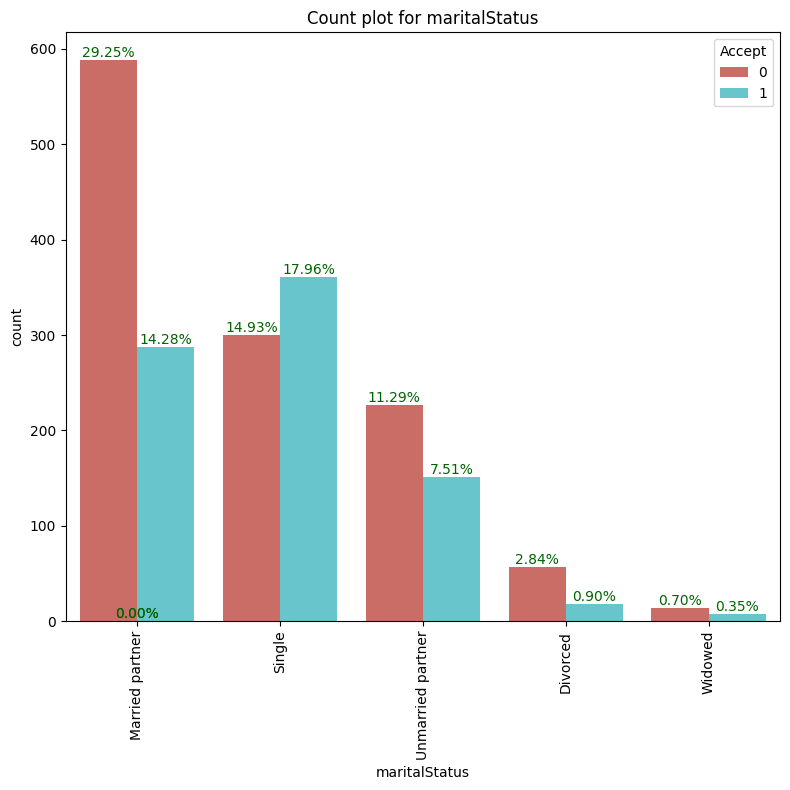

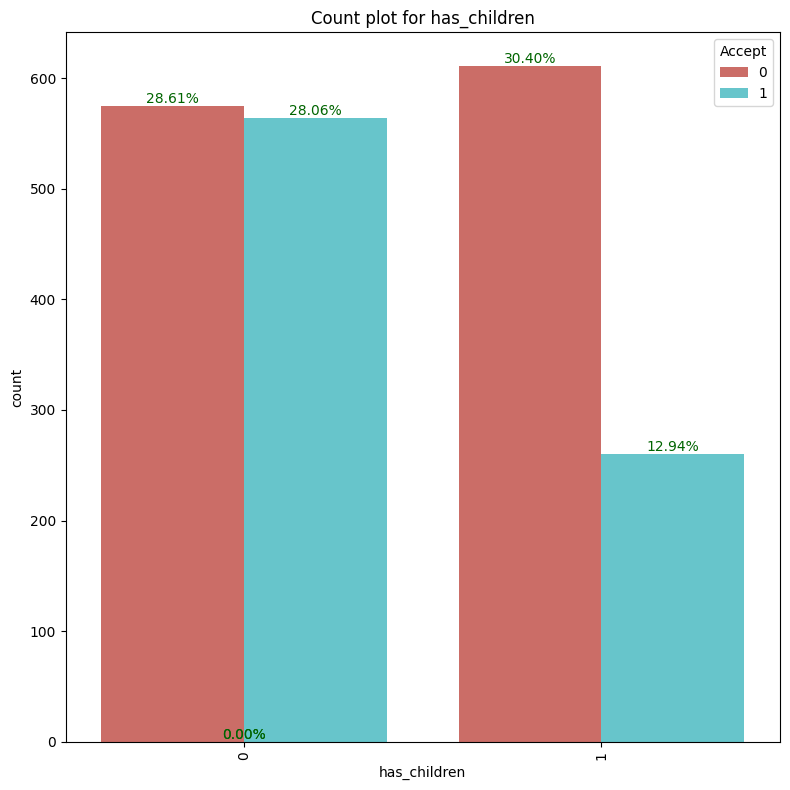

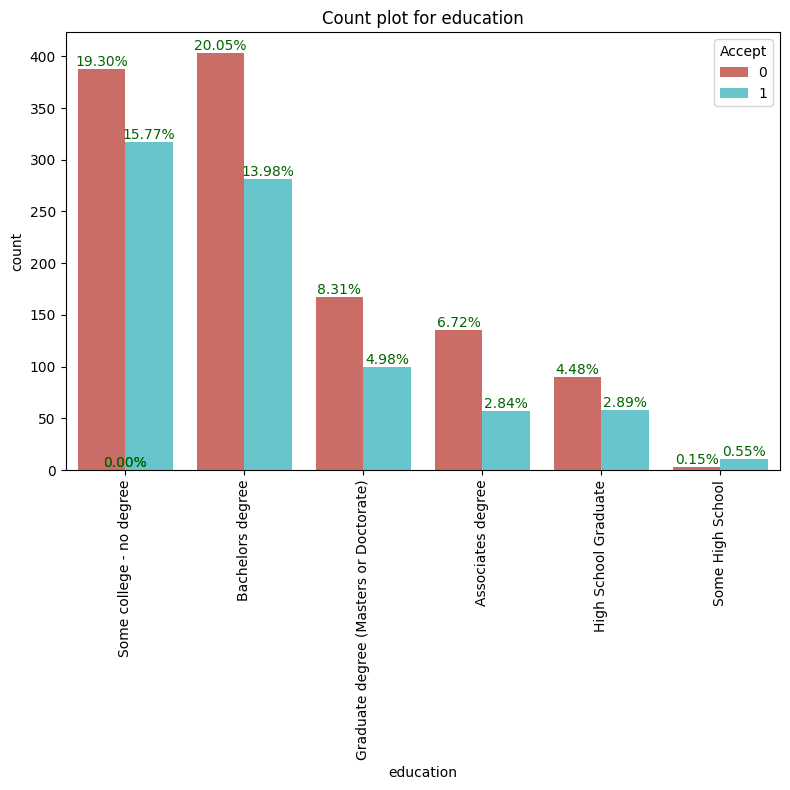

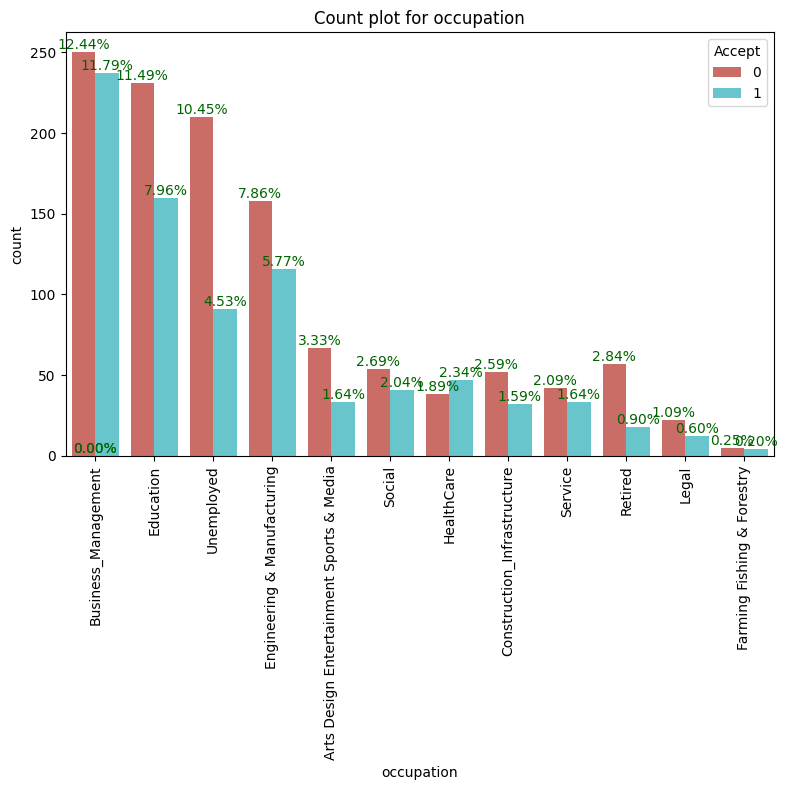

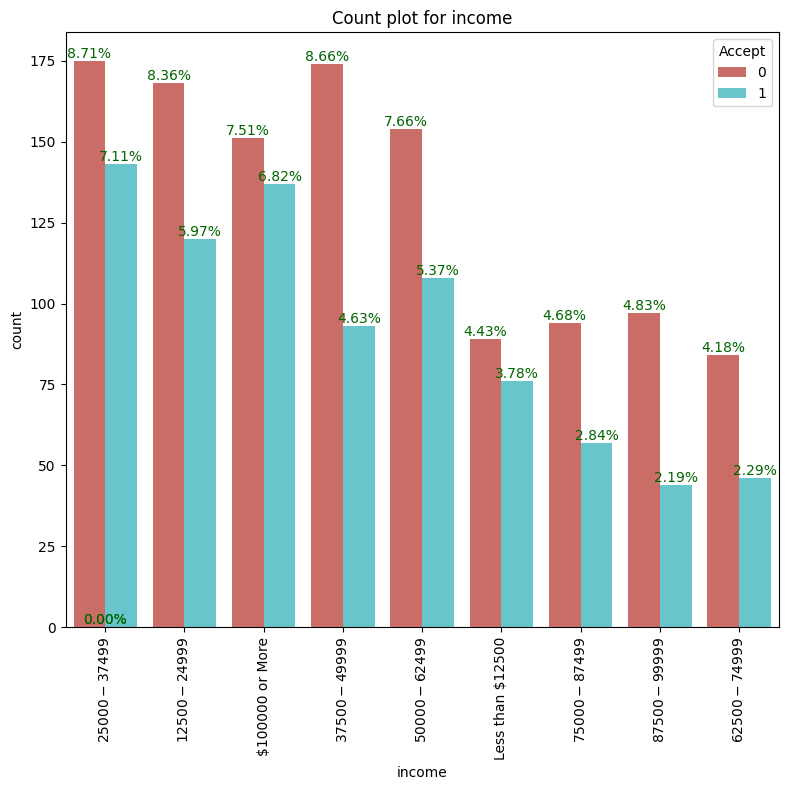

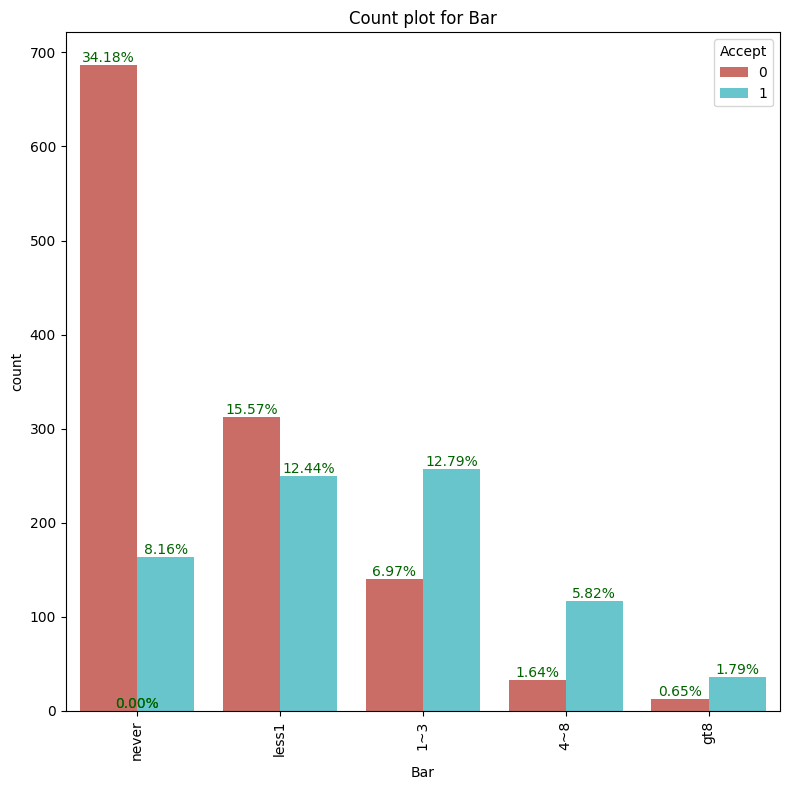

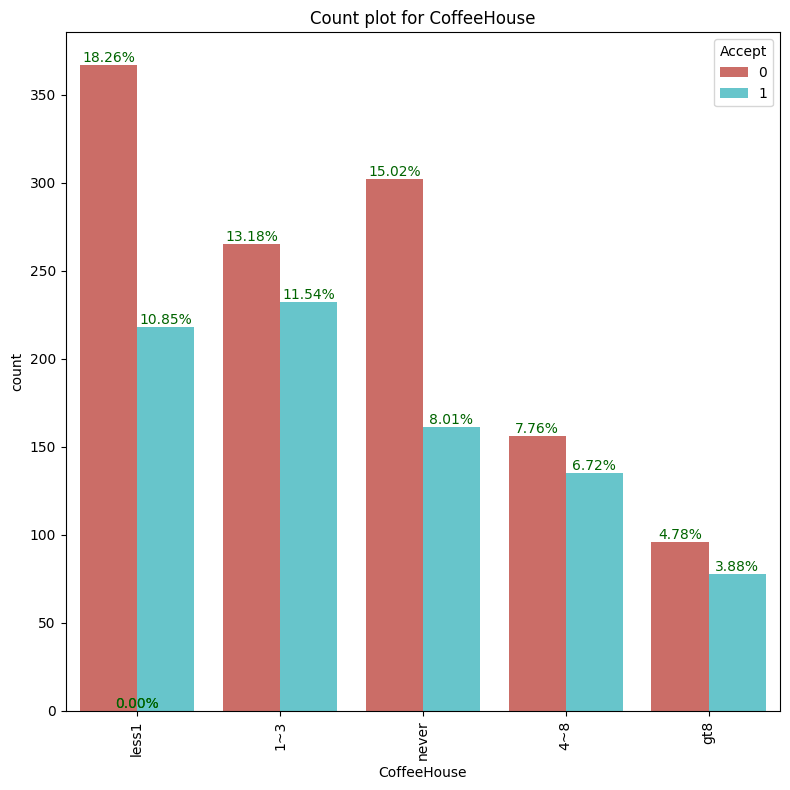

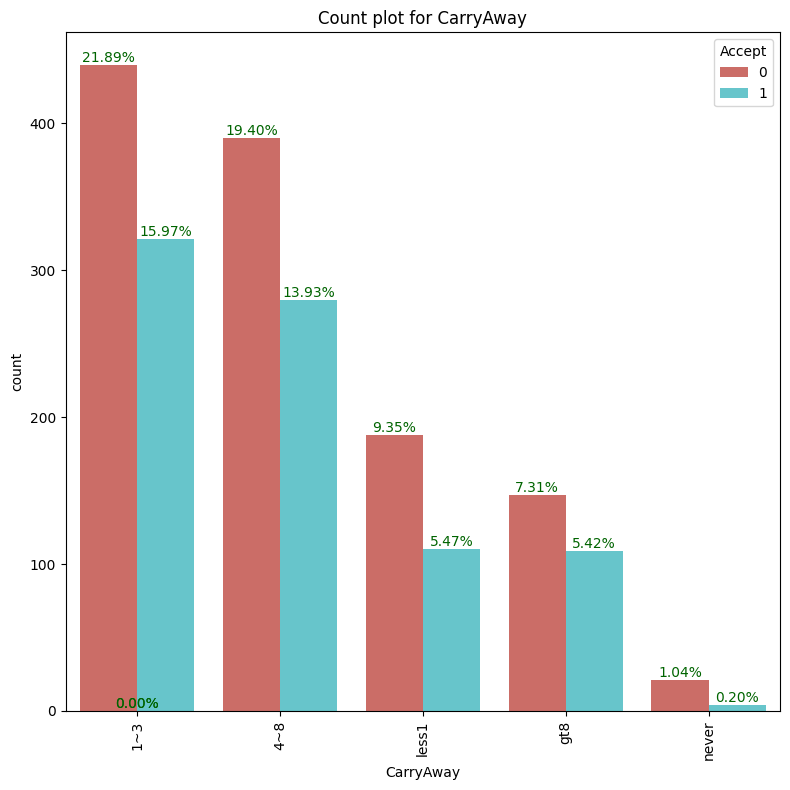

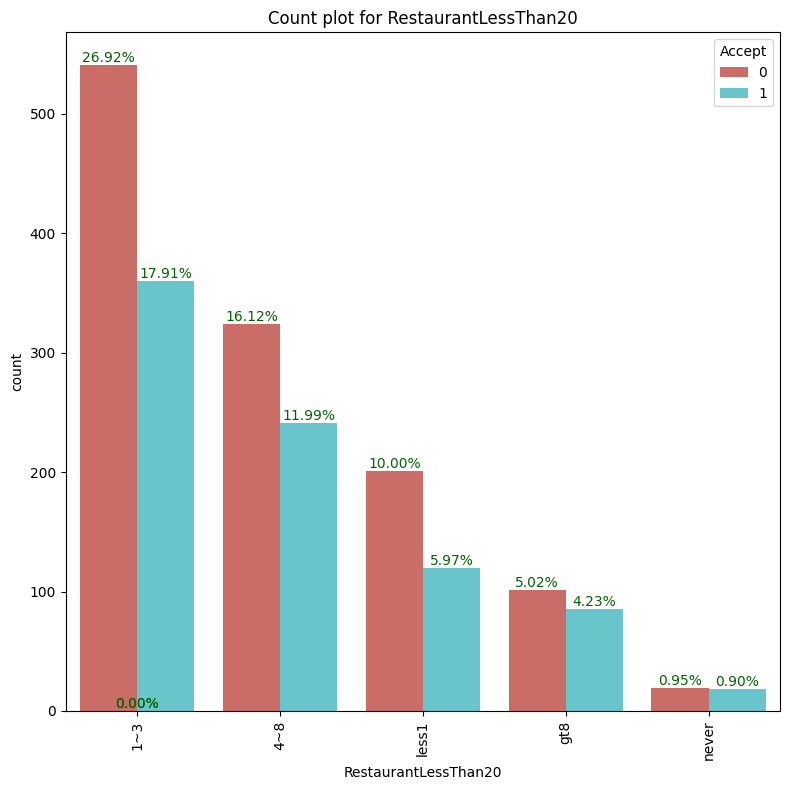

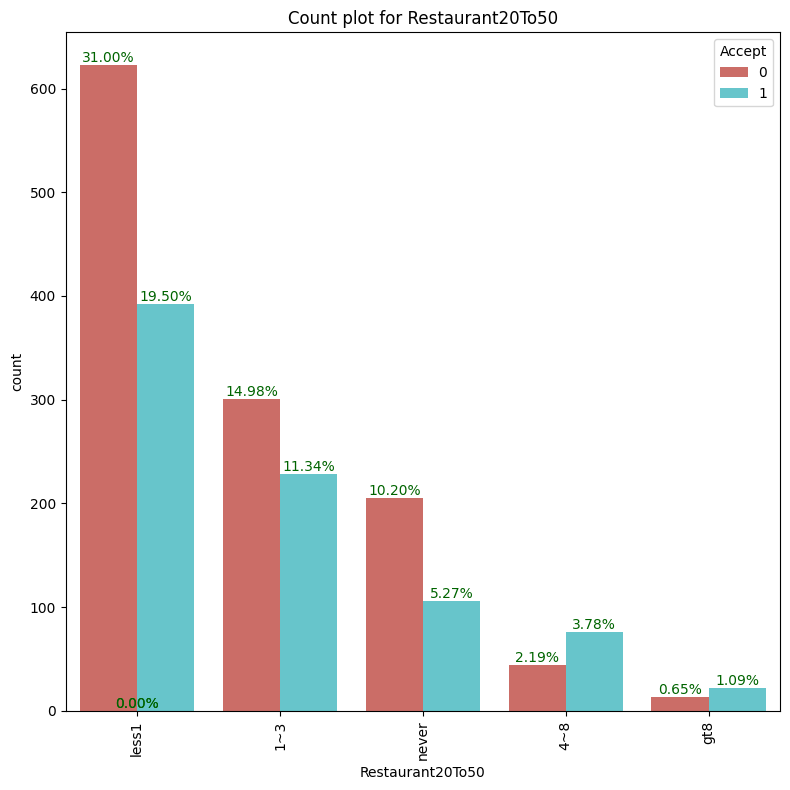

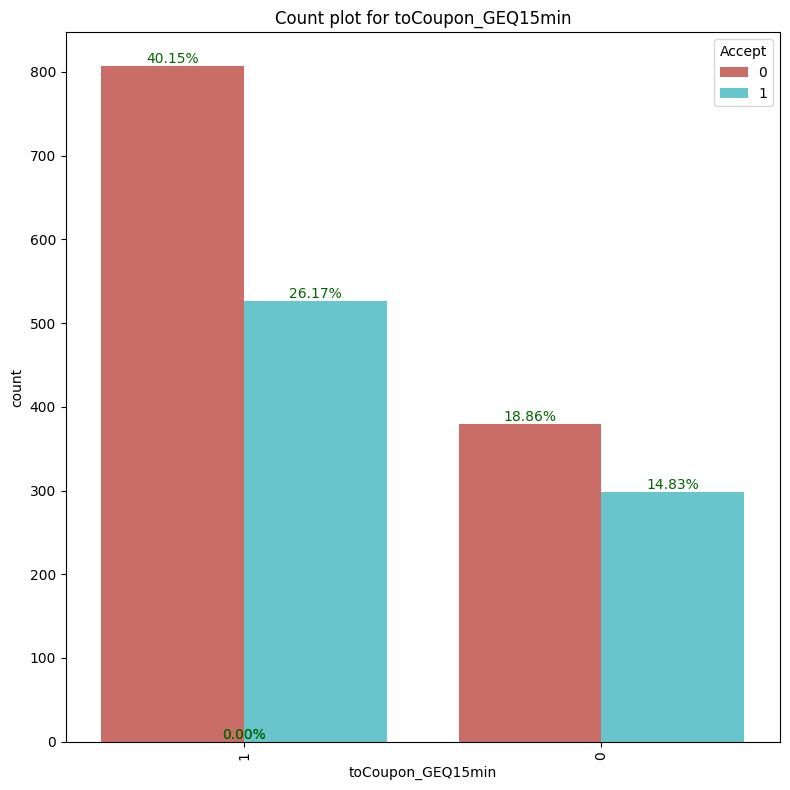

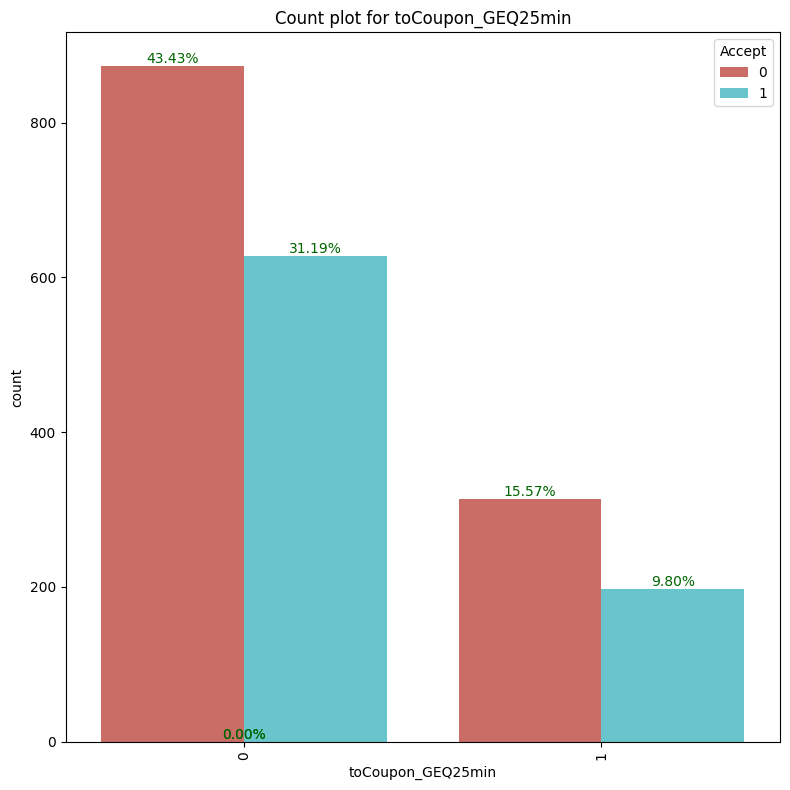

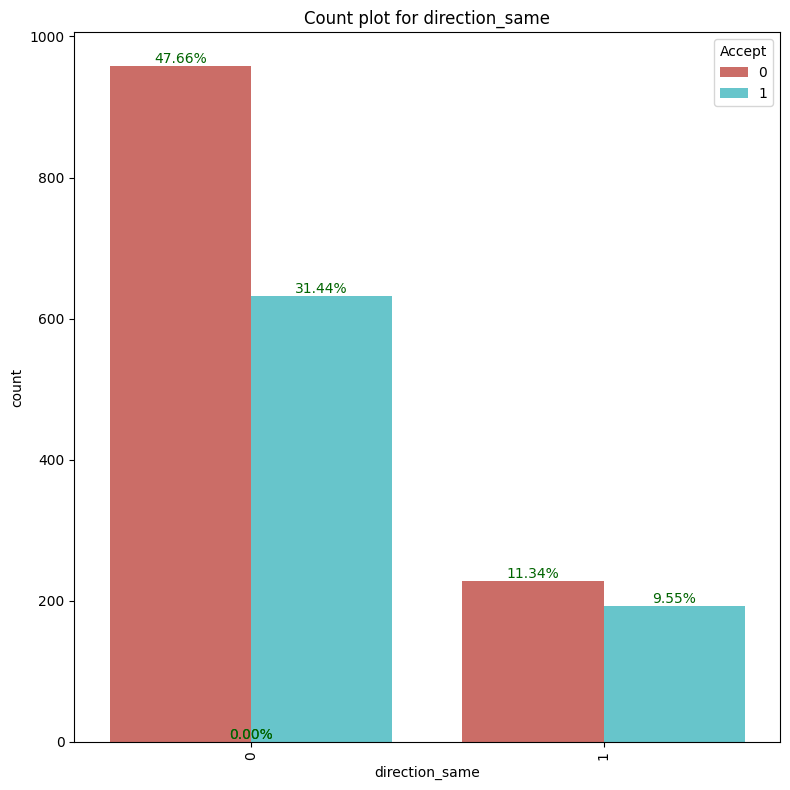

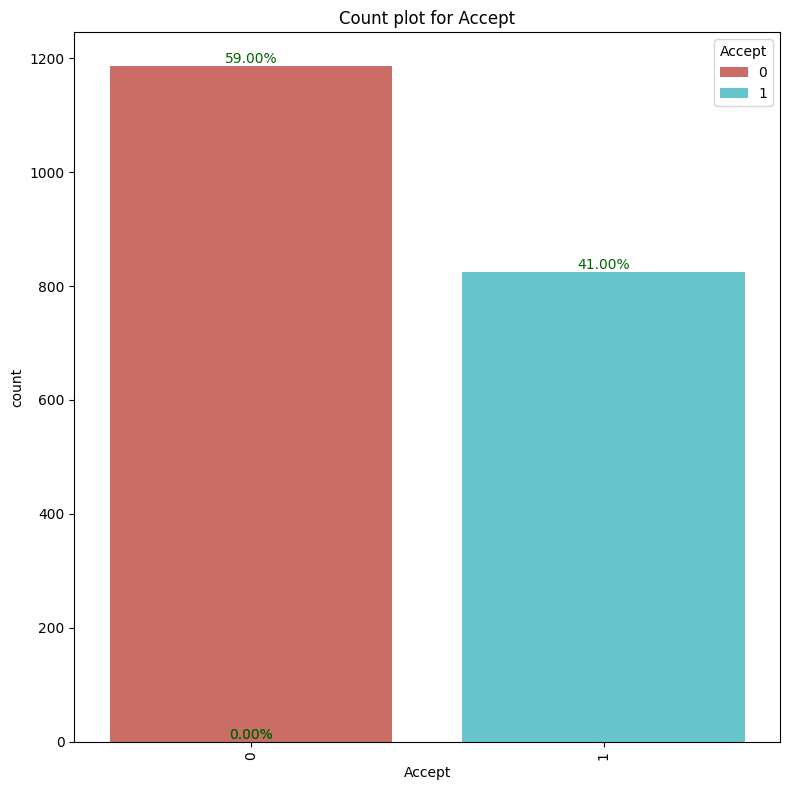

In [ ]:
coupon_count(df_Bar)



*   The coupon acceptance rate for Bar is 41%.
*   Coupon Acceptance rate is higher when it is a sunny day and are Alone , Males are mostly likely to accept Bar Coupons when compared to Females , Acceptance rate is higher amongst the young individuals of age 21,26,31 and singles. Bar Coupons are more likely to be accepted by Business_Management professionals compared to others.

*   People who frequently visited CoffeeHouse,Restaurantlessthan20 and Carry Away were mostly likely to accept Bar related coupons.




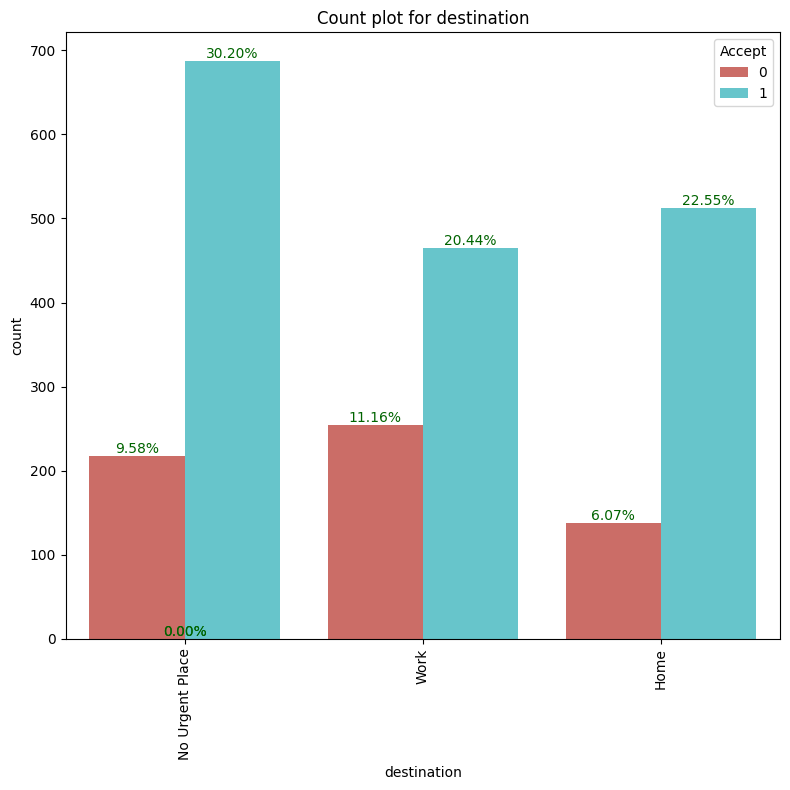

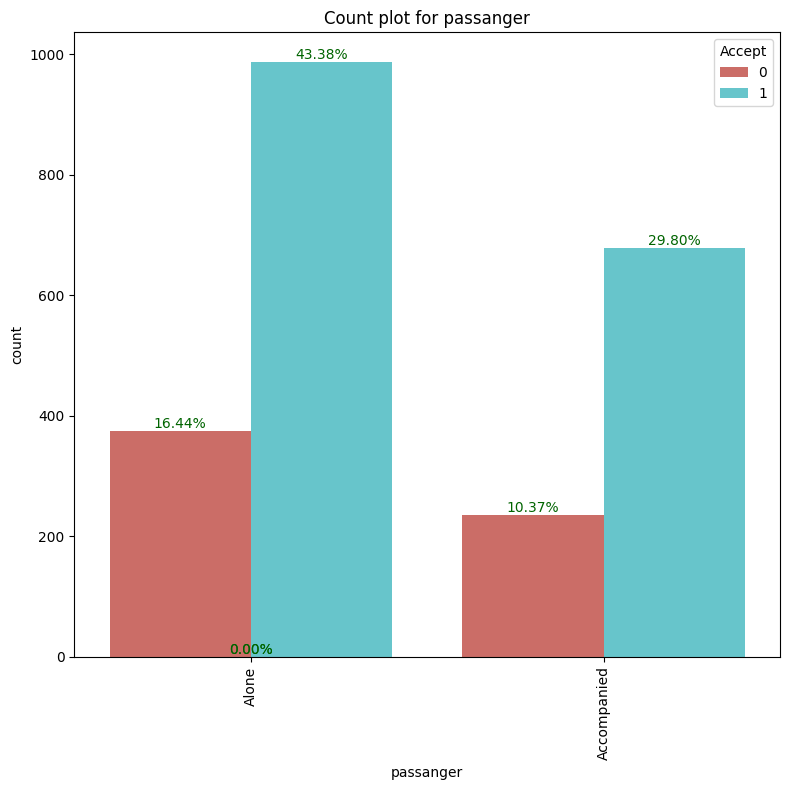

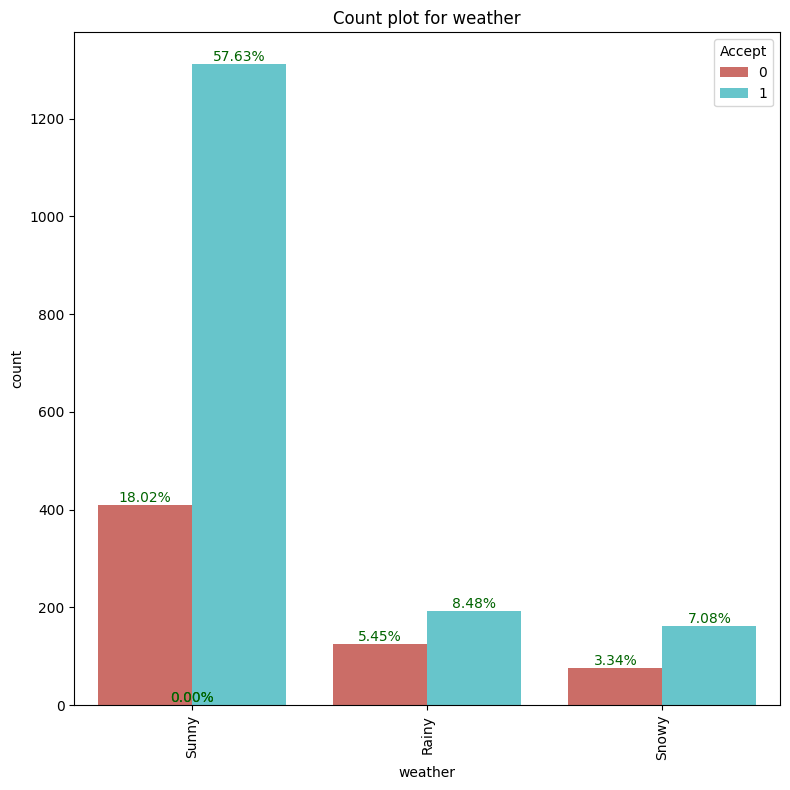

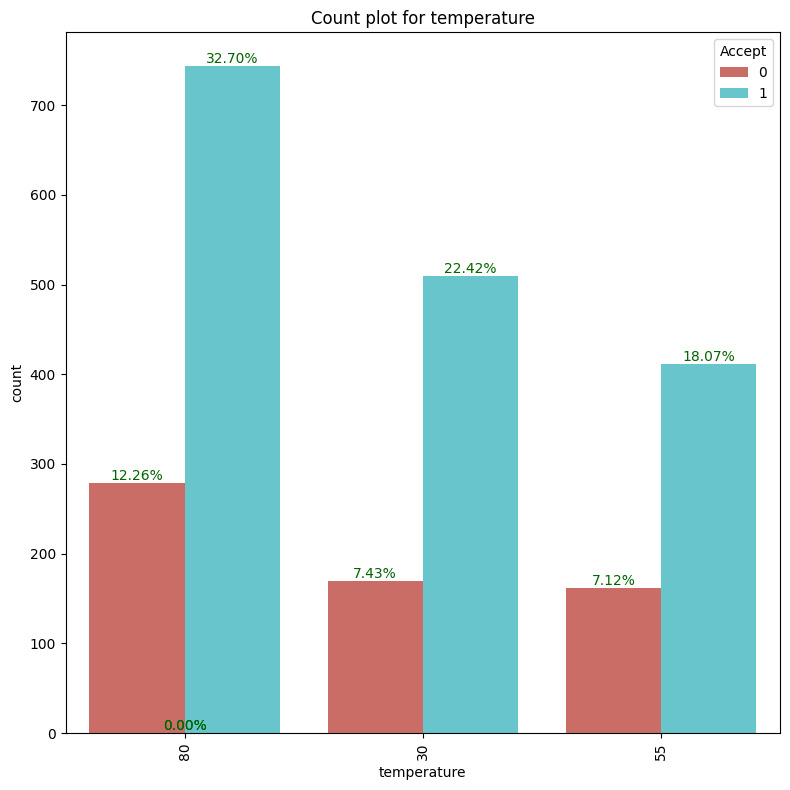

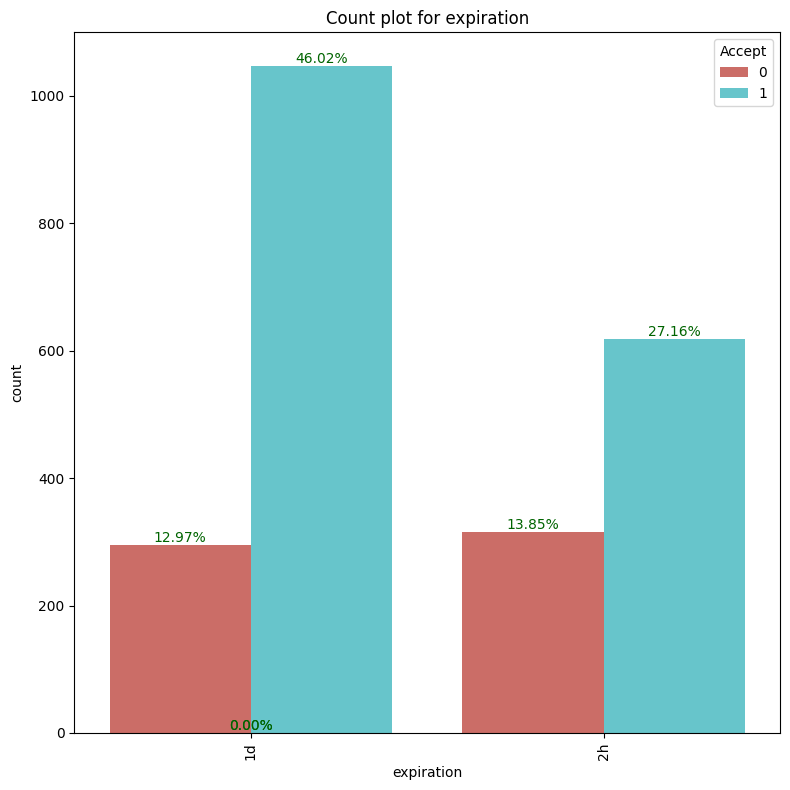

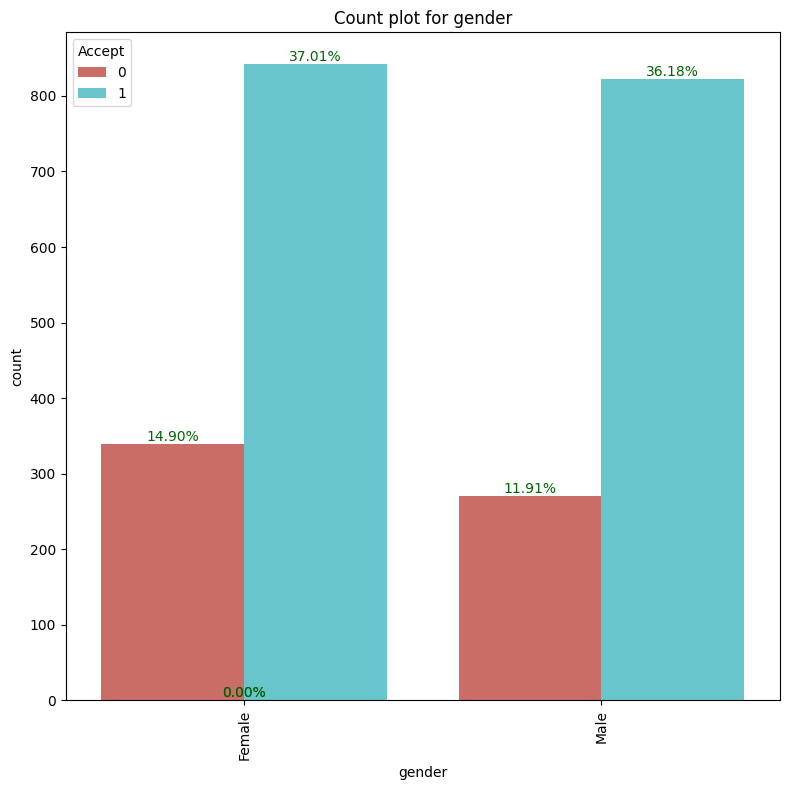

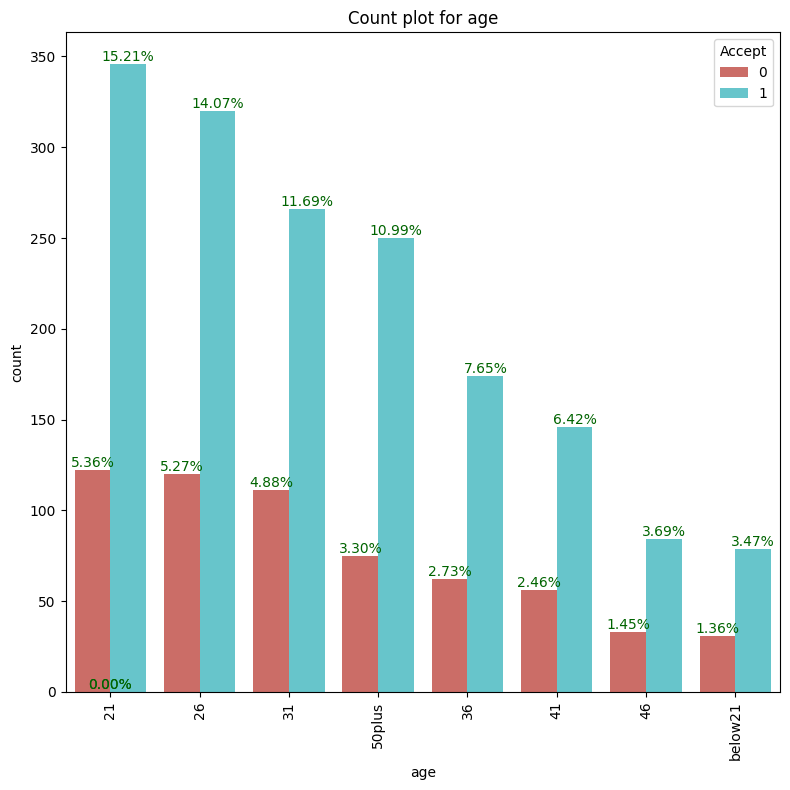

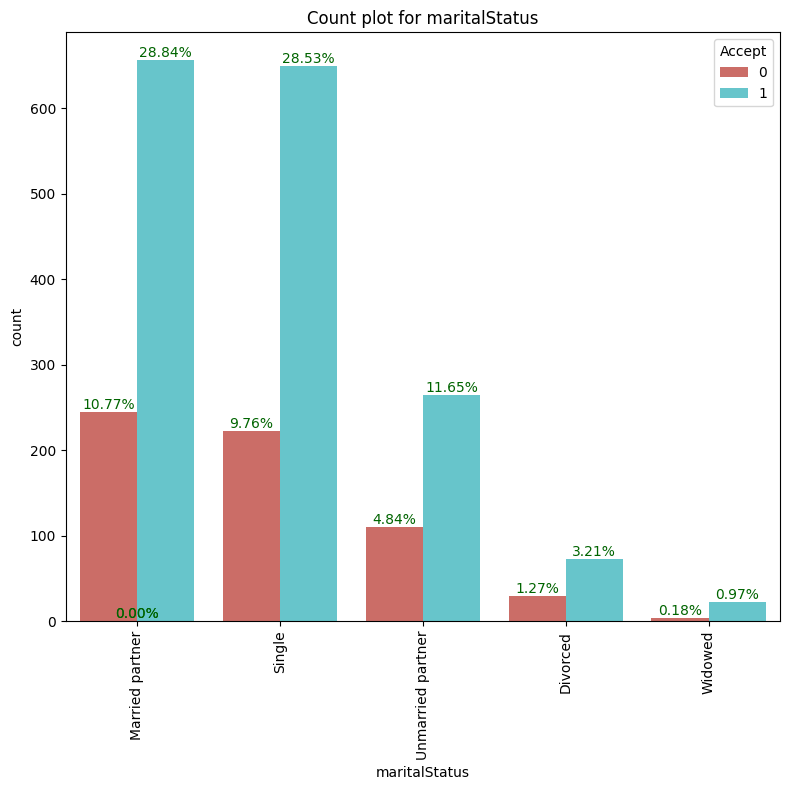

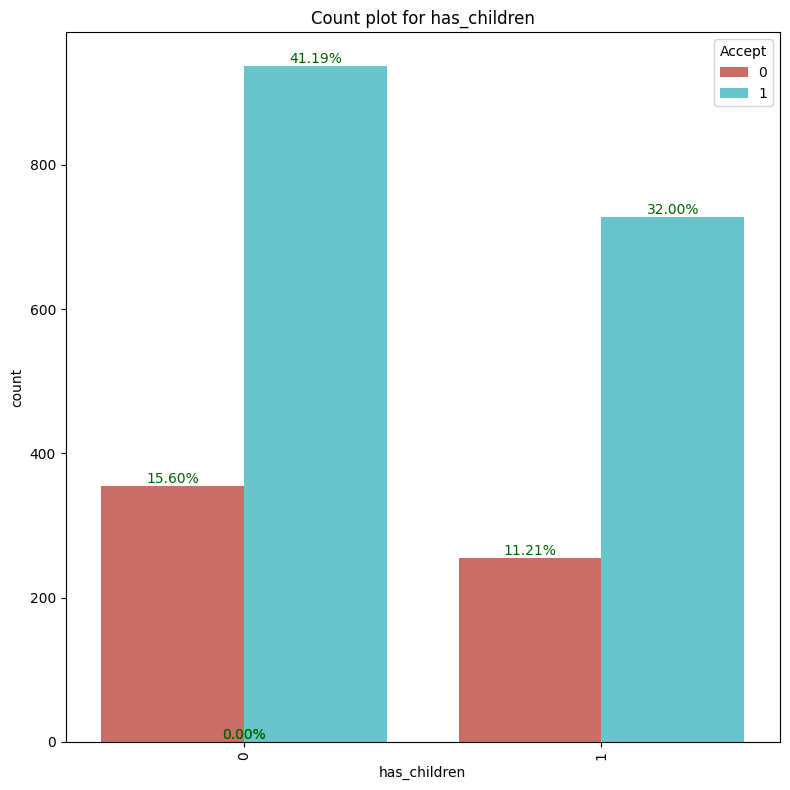

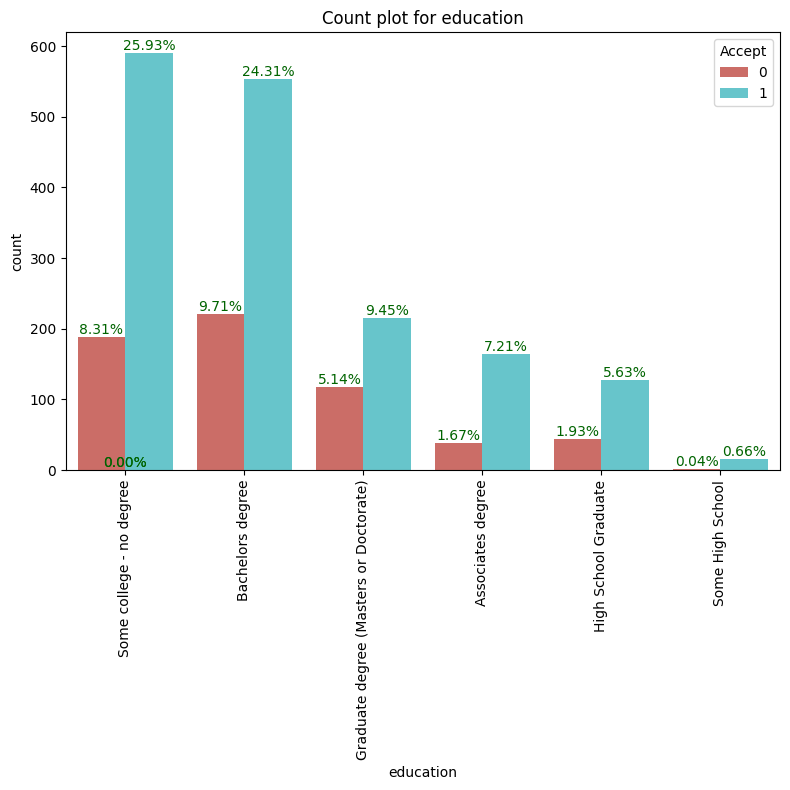

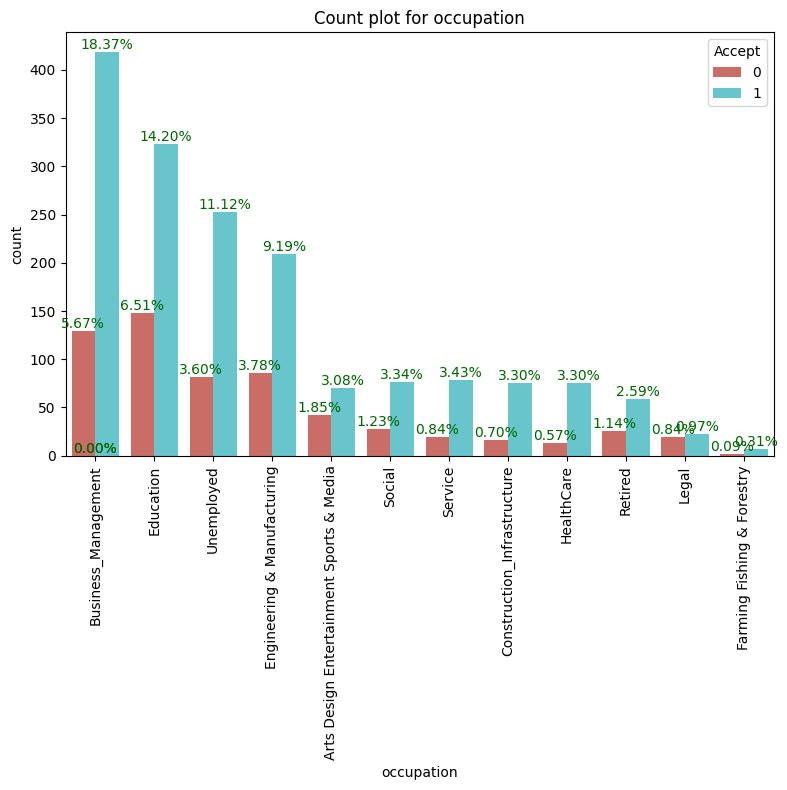

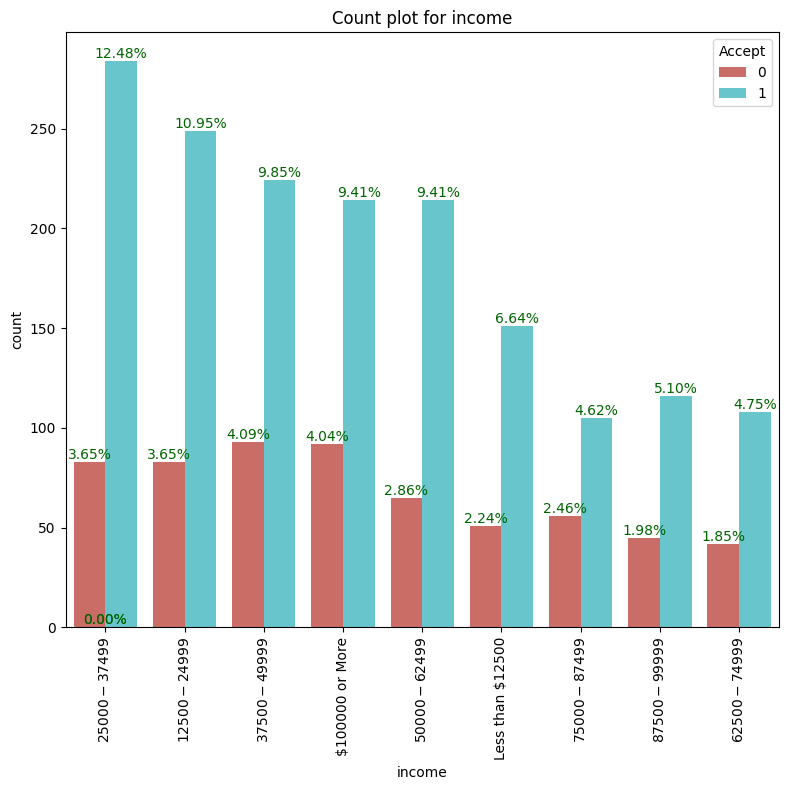

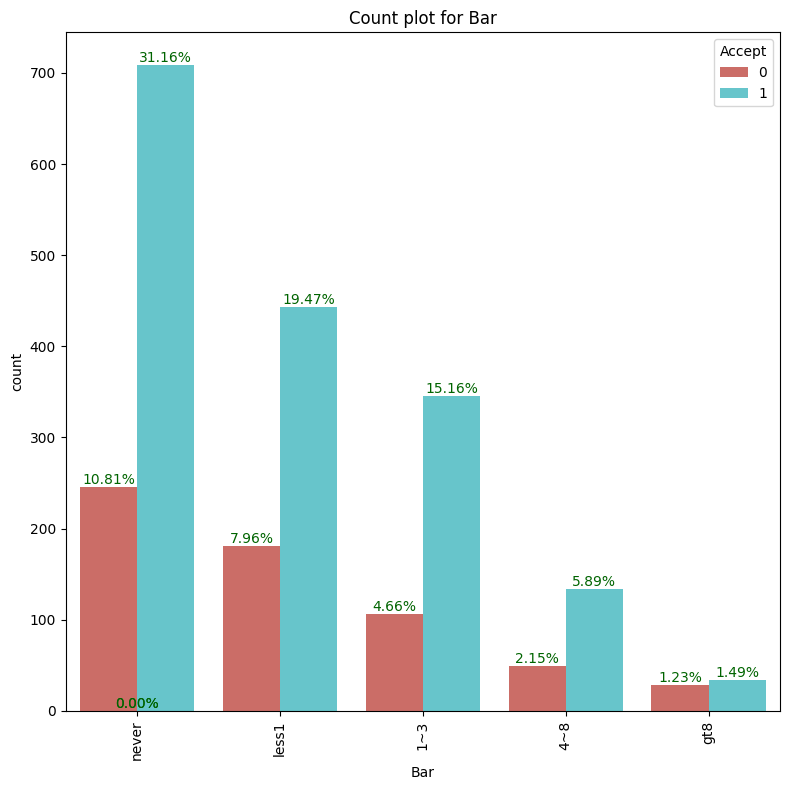

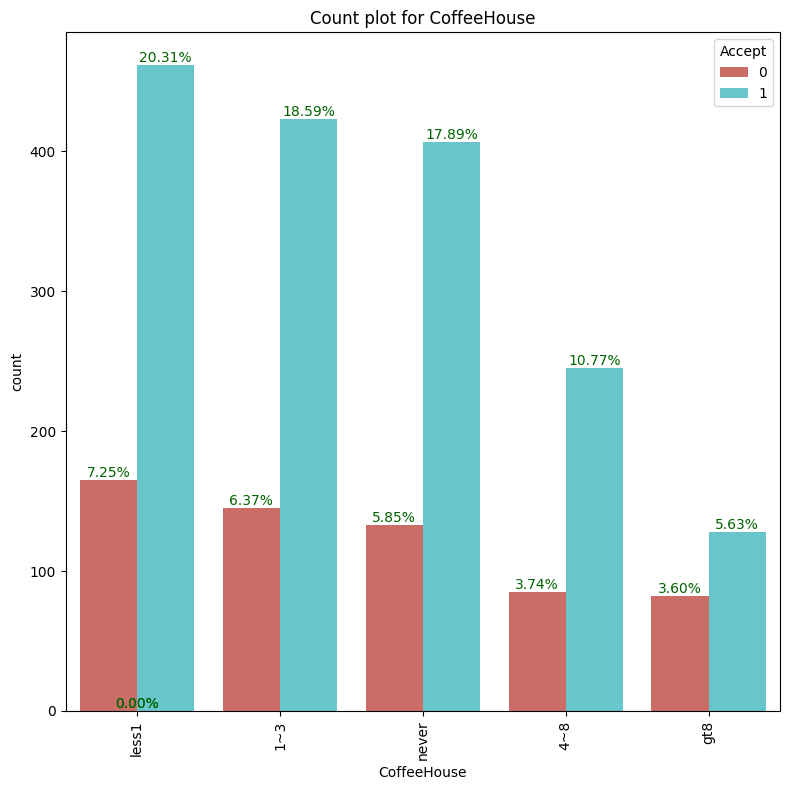

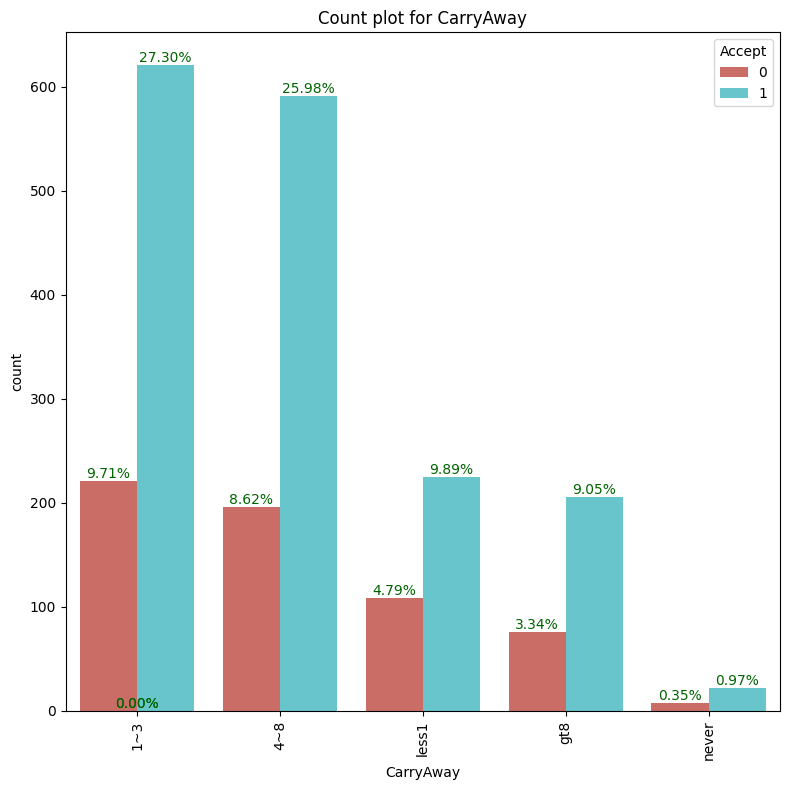

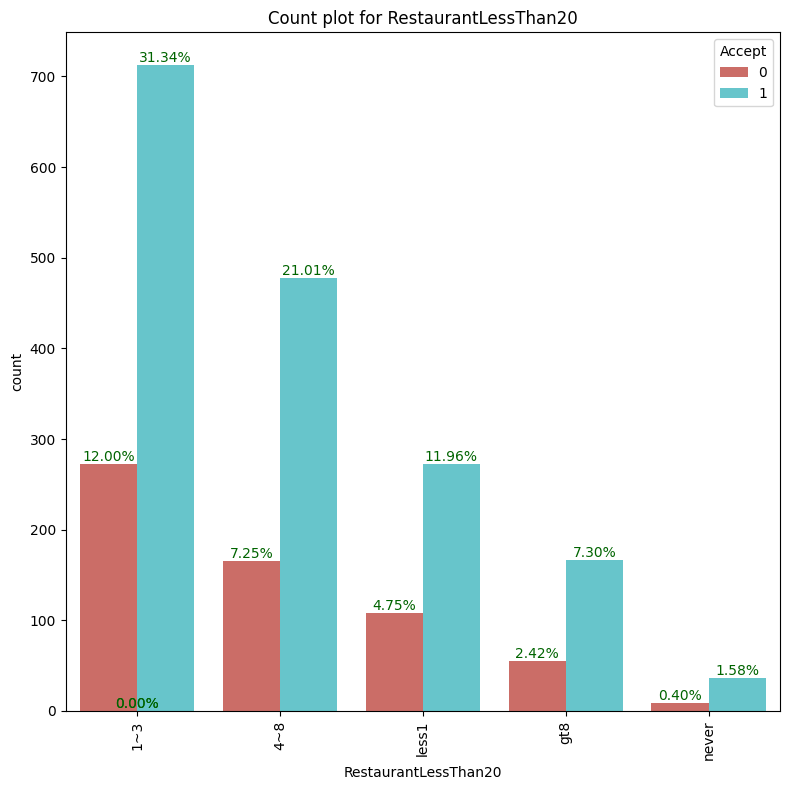

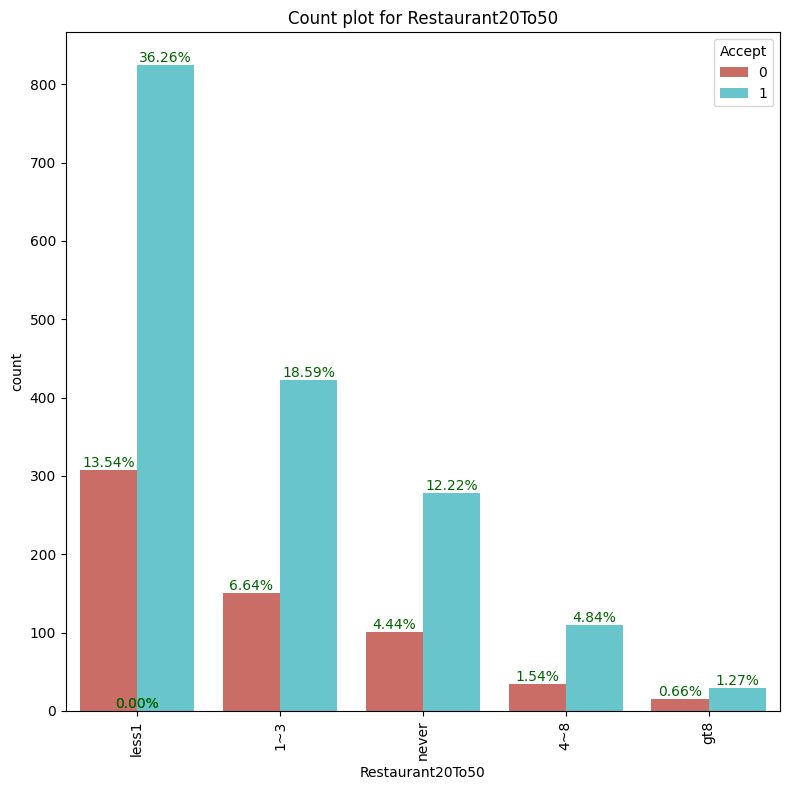

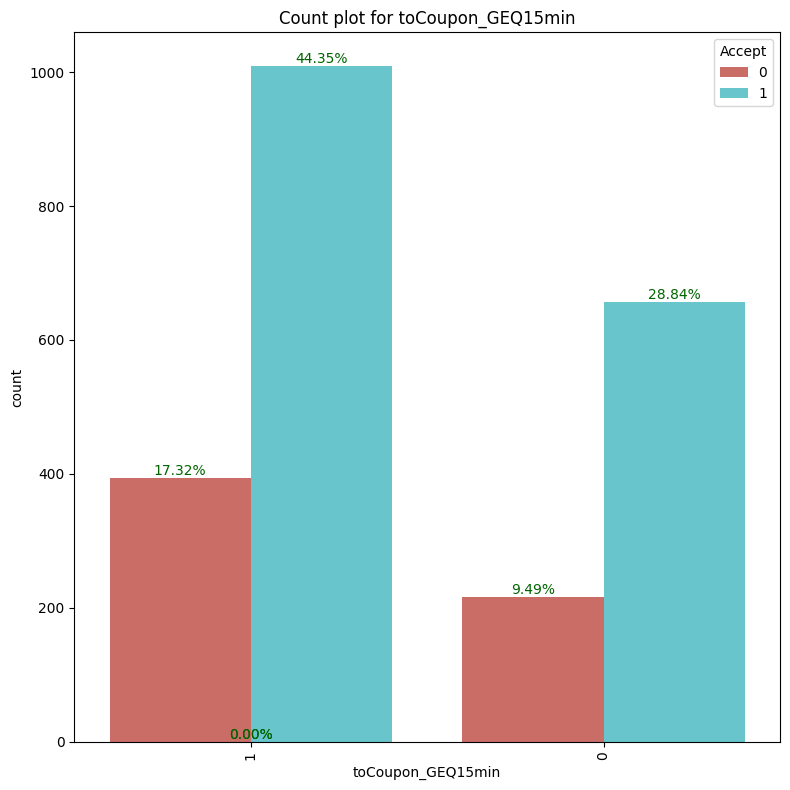

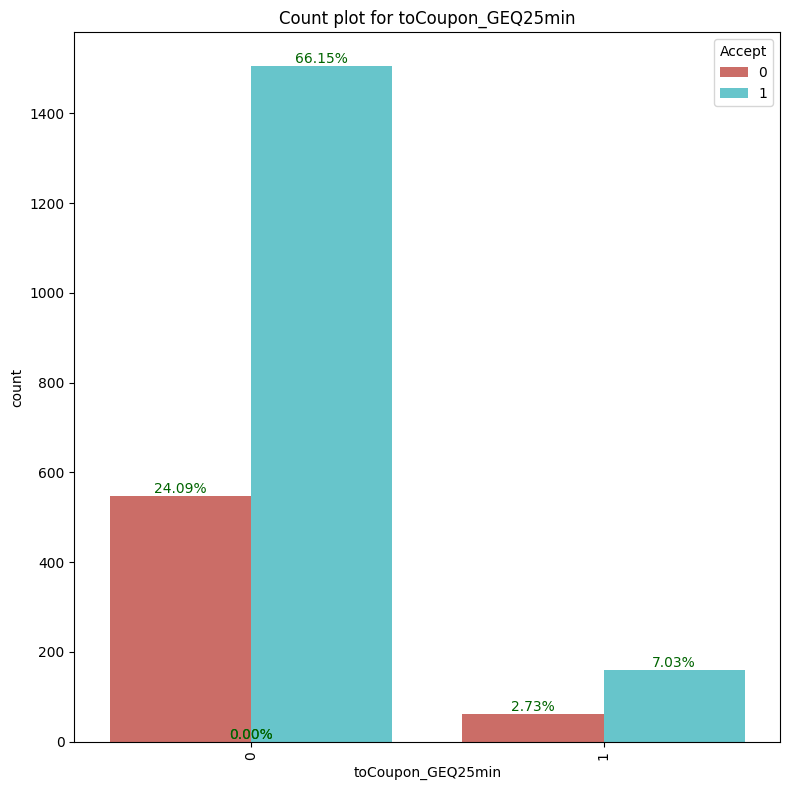

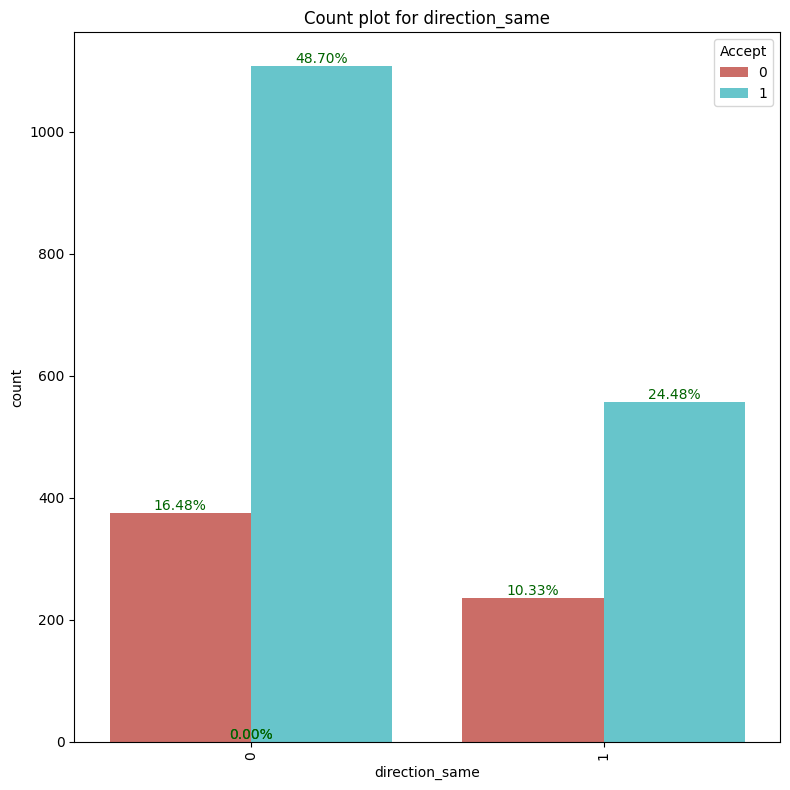

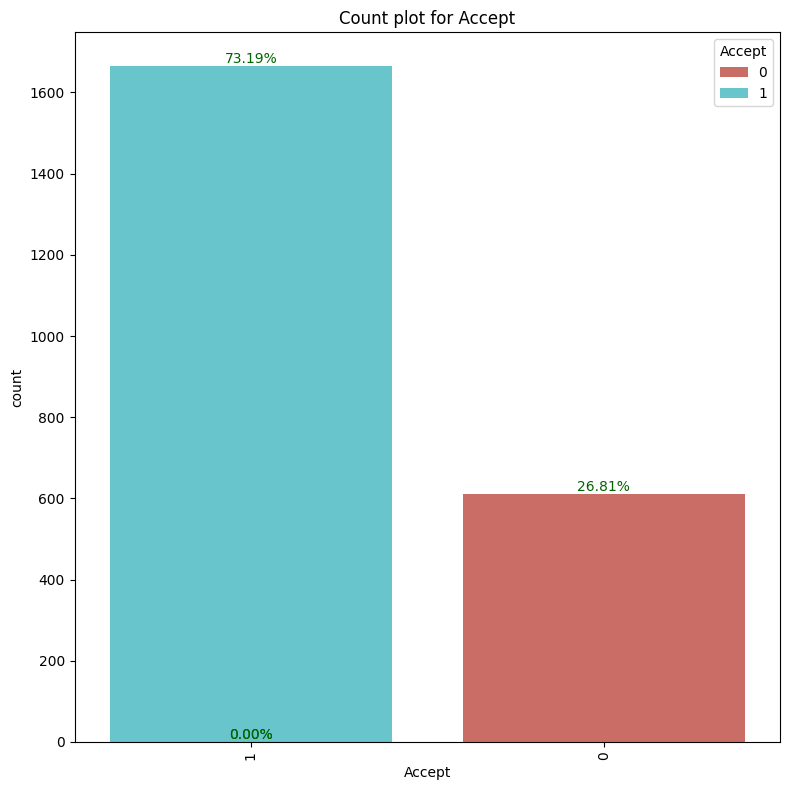

In [ ]:
coupon_count(df_CarryAway)





*   73.19% of the people accepted Carry Away coupons.
*   Coupon Acceptance is higher when it is a sunny day and are Alone , Acceptance rate is higher amongst the young individuals of age 21-31 and singles and Married Couples. Carry Away Coupons are more likely to be accepted by Business_Management professionals compared to others.Middle-income indivuals between 25k-40k earning has higher coupon rate acceptance when compared to others.


*   People who never visit Bar, visit less1 to coffee House and also visited Restuarantlessthan20 and Restuarant20to50 between 1-3 have higher acceptance rate of Carry Away Coupons.
*   List item







In [ ]:
le = LabelEncoder()
for col in df.columns:
  if col not in ['toCoupon_GEQ15min','toCoupon_GEQ15min','direction_same','Accept']:
    df[col]=le.fit_transform(df[col])
    print (col,':',df[col].unique(),':',le.inverse_transform(df[col].unique()))

destination : [1 0 2] : ['No Urgent Place' 'Home' 'Work']
passanger : [1 0] : ['Alone' 'Accompanied']
weather : [2 0 1] : ['Sunny' 'Rainy' 'Snowy']
temperature : [1 2 0] : [55 80 30]
coupon : [4 2 1 0 3] : ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration : [0 1] : ['1d' '2h']
gender : [0 1] : ['Female' 'Male']
age : [0 5 1 2 4 6 3 7] : ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus : [3 2 1 0 4] : ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
has_children : [1 0] : [1 0]
education : [5 1 0 3 2 4] : ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation : [11  4  3  6  1  0 10  9  2  7  8  5] : ['Unemployed' 'Engineering & Manufacturing' 'Education' 'HealthCare'
 'Business_Management' 'Arts Design Entertainment Sports & Media' 'Social'
 'Service' 'Construction_Infrastructure' 'Legal' 'Retire

**Correlation Matrix**

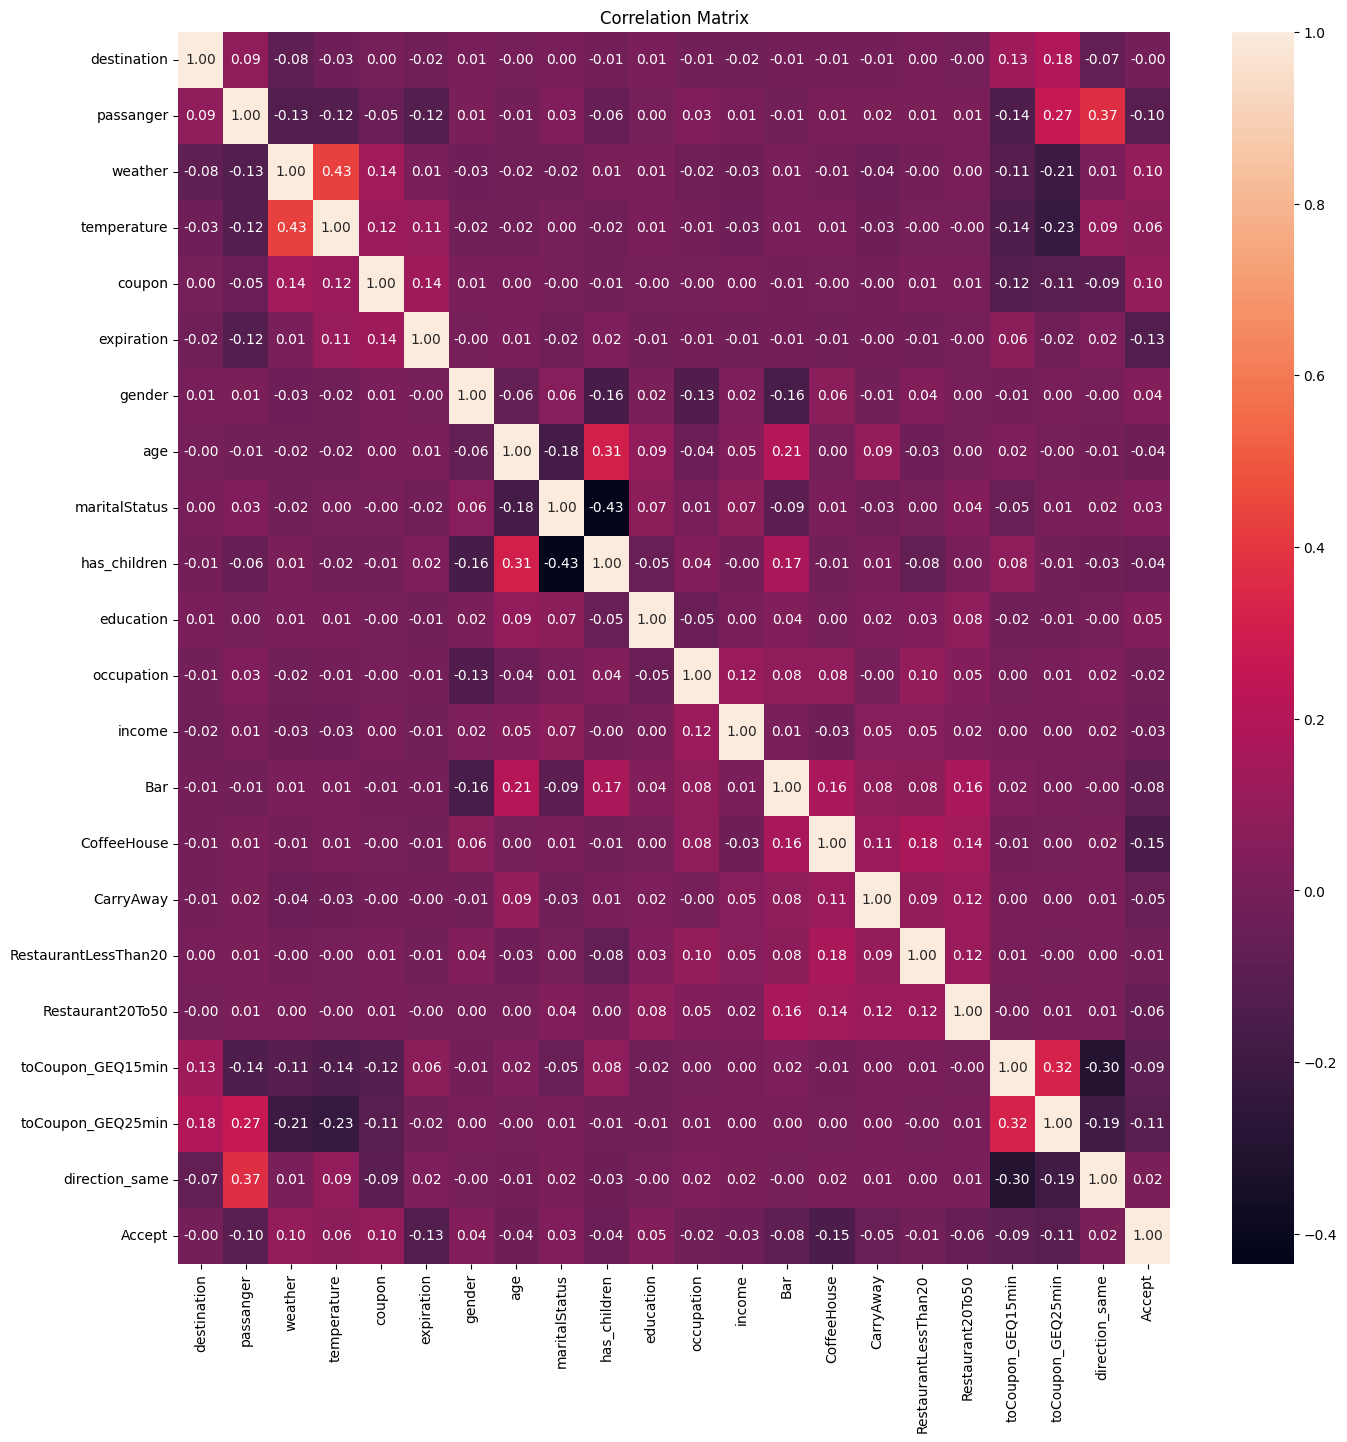

In [ ]:
df_corr = df.corr()
plt.figure(figsize=(16,16))
sns.heatmap(data=df_corr,fmt='.2f',annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
def correlation_test(df):
  threshold = 0.80
  corr_lst=[]
  for i in range(len(df_corr)):
    for j in range(i):
      if(abs(df_corr.iloc[i,j]>threshold)):
        col_name=df_corr.columns[i]
        corr_lst.append(col_name)
  return corr_lst


In [ ]:
correlation_test(df_corr)

[]



*   No Independent variable is correlated



In [ ]:
X = df.drop(columns='Accept')
y = df['Accept']

Chi Square Contigency test

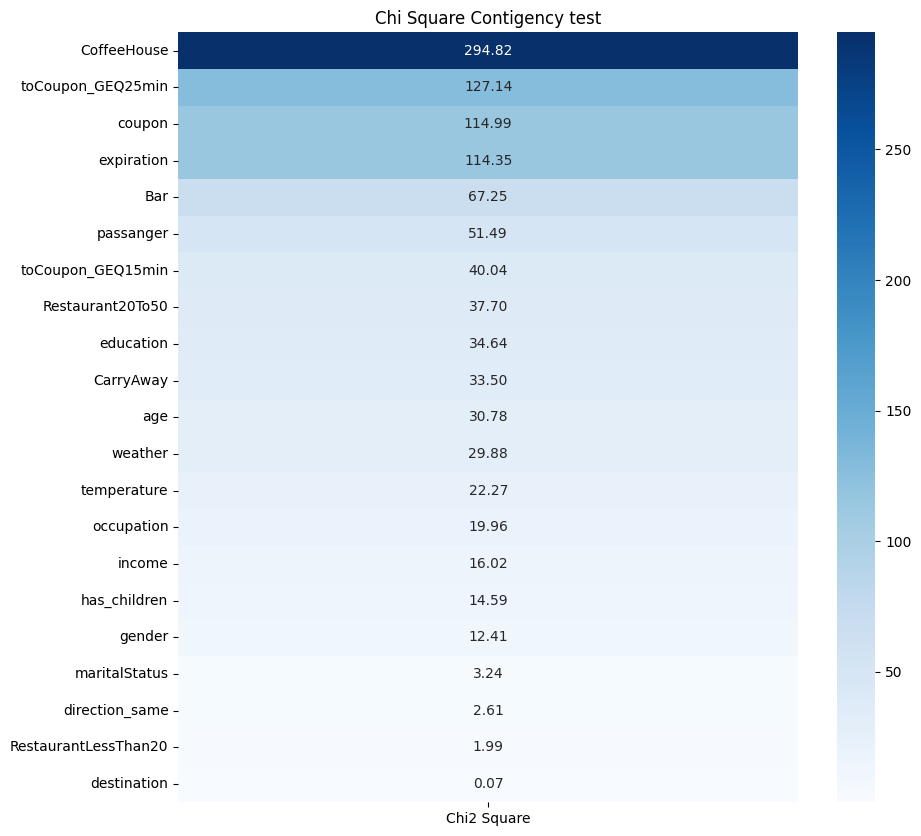

In [ ]:
chi2_selector=SelectKBest(score_func=chi2,k='all')
chi2_selector.fit(X,y)
feature_score = pd.DataFrame(data={'Chi2 Square':chi2_selector.scores_,'p-value':chi2_selector.pvalues_},index=chi2_selector.feature_names_in_).sort_values(by='Chi2 Square',ascending=False)
plt.figure(figsize=(10,10))
sns.heatmap(feature_score[['Chi2 Square']],annot=True,cmap='Blues',fmt='.2f')
plt.title('Chi Square Contigency test')
plt.show()

In [ ]:
feature_score

Chi2 Square       p-value
CoffeeHouse            294.815162  4.440229e-66
toCoupon_GEQ25min      127.144615  1.727180e-29
coupon                 114.993978  7.893679e-27
expiration             114.346029  1.094426e-26
Bar                     67.254473  2.386288e-16
passanger               51.492780  7.186089e-13
toCoupon_GEQ15min       40.043731  2.483404e-10
Restaurant20To50        37.696999  8.263160e-10
education               34.640558  3.965574e-09
CarryAway               33.503779  7.112567e-09
age                     30.777431  2.893841e-08
weather                 29.883846  4.587187e-08
temperature             22.268583  2.370535e-06
occupation              19.959092  7.911684e-06
income                  16.021982  6.261130e-05
has_children            14.594720  1.332875e-04
gender                  12.410389  4.269519e-04
maritalStatus            3.235646  7.205187e-02
direction_same           2.606687  1.064138e-01
RestaurantLessThan20     1.991280  1.582072e-01
destination              0.068436  7.936279e-01

Feature Importance from Random Forest

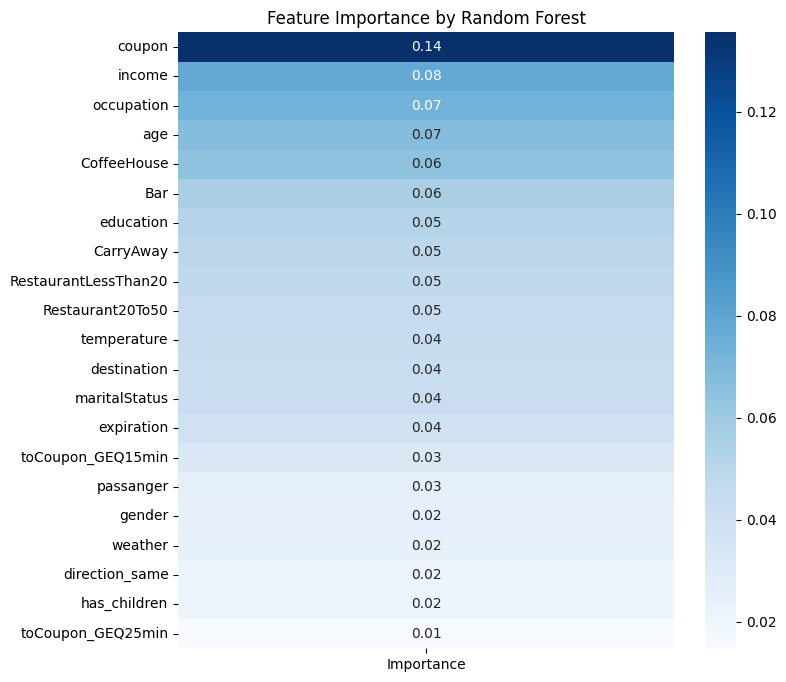

In [ ]:
rf_model=RandomForestClassifier(random_state=42)
rf_model.fit(X,y)
importances=rf_model.feature_importances_
feature_name=X.columns
rf_features=pd.DataFrame(data={'Importance':importances},index=rf_model.feature_names_in_).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(8,8))
sns.heatmap(rf_features[['Importance']],cmap='Blues',fmt='.2f',annot=True)
plt.title('Feature Importance by Random Forest')
plt.show()




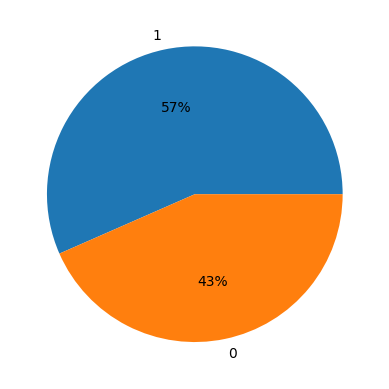

In [ ]:
plt.pie(x=y.value_counts(),labels=y.value_counts().index,autopct='%1.f%%')
plt.show()

*The dataset is pretty balanced with majority class having 57% whereas minority class having 43%. Hence there is no need to handle the imbalanced data*

**Train Test Split**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
X_train.shape

(9294, 21)

In [ ]:
X_test.shape

(3099, 21)

In [ ]:
y_train.shape

(9294,)

In [ ]:
y_test.shape

(3099,)

Standard Scaling

In [ ]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

**Model Building**

**Logistic Regression**

In [ ]:
lr_model = LogisticRegression()
param_list={
    'max_iter':[100,300,500,700,1000],
    'penalty':['l1','l2','elasticnet'],
    'C':[0.01, 1, 100]
}
cv_log=GridSearchCV(lr_model,cv=5,param_grid=param_list,n_jobs=-1)
cv_log.fit(X_train_scaled,y_train)
print('The Best Parameters using GridSearch CV :\n',cv_log.best_params_)
log=LogisticRegression(**cv_log.best_params_)
log.fit(X_train,y_train)
lr_train_pred=log.predict(X_train_scaled)
lr_train_accuracy=accuracy_score(lr_train_pred,y_train)
lr_test_pred=log.predict(X_test_scaled)
lr_test_accuracy=accuracy_score(lr_test_pred,y_test)
print('Training Accuracy',lr_train_accuracy)
print('Test Accuracy',lr_test_accuracy)
print(classification_report(lr_test_pred,y_test))

The Best Parameters using GridSearch CV :
 {'C': 1, 'max_iter': 100, 'penalty': 'l2'}
Training Accuracy 0.6275016139444803
Test Accuracy 0.6131010003226848
              precision    recall  f1-score   support

           0       0.35      0.61      0.44       777
           1       0.82      0.61      0.70      2322

    accuracy                           0.61      3099
   macro avg       0.59      0.61      0.57      3099
weighted avg       0.70      0.61      0.64      3099



**Confusion Matrix for Logistic Regression**

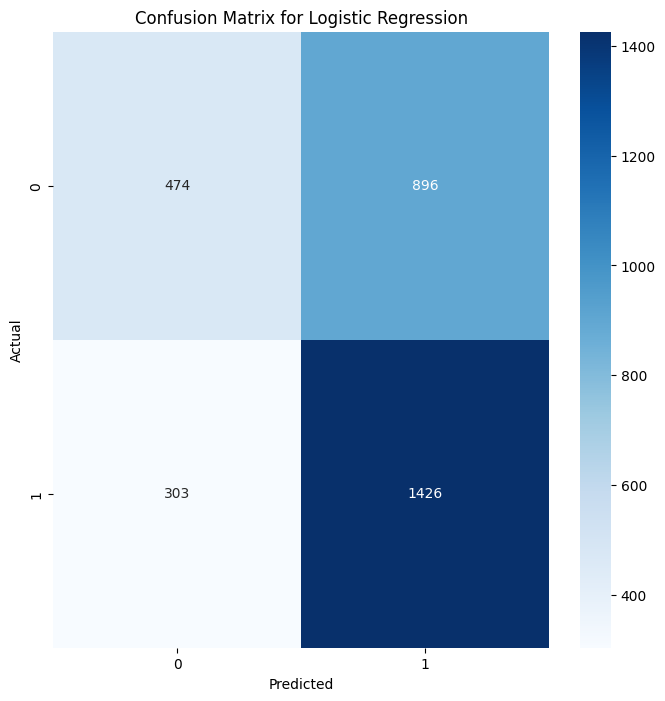

In [ ]:
plt.figure(figsize=(8,8))
cm=confusion_matrix(y_test,lr_test_pred)
sns.heatmap(cm,fmt='d',annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

**Random Forest Classifier**

In [ ]:
rfc_model = RandomForestClassifier()
param_list = {
    'n_estimators':[100,300,500,1000],
    'max_depth':[1000,3000,5000],
    'bootstrap':[True,False],
    'max_features':['sqrt','log2',None],
    'criterion':['gini','entropy'],
    'min_samples_split':[5,10],
    'min_samples_leaf':[1,2,4]
}
cv_rfc=RandomizedSearchCV(rfc_model,cv=5,param_distributions=param_list,n_jobs=-1)
cv_rfc.fit(X_train,y_train)
print('The Best Parameters using GridSearch CV :\n',cv_rfc.best_params_)


The Best Parameters using GridSearch CV :
 {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 3000, 'criterion': 'entropy', 'bootstrap': True}


In [ ]:
rfc=RandomForestClassifier(**cv_rfc.best_params_,random_state=42)
rfc.fit(X_train,y_train)
rfc_train_pred=rfc.predict(X_train)
rfc_test_pred=rfc.predict(X_test)
rfc_train_accuracy=accuracy_score(rfc_train_pred,y_train)
rfc_test_accuracy=accuracy_score(rfc_test_pred,y_test)
print('Training Accuracy for Random Forest Classifier',rfc_train_accuracy)
print('Testing Accuracy for Random Forest Classifier',rfc_test_accuracy)
print(classification_report(rfc_test_pred,y_test))

Training Accuracy for Random Forest Classifier 0.9261889391004949
Testing Accuracy for Random Forest Classifier 0.7366892545982575
              precision    recall  f1-score   support

           0       0.63      0.73      0.68      1184
           1       0.82      0.74      0.78      1915

    accuracy                           0.74      3099
   macro avg       0.73      0.74      0.73      3099
weighted avg       0.75      0.74      0.74      3099



**Confusion Matrix for Random Forest Classifier**

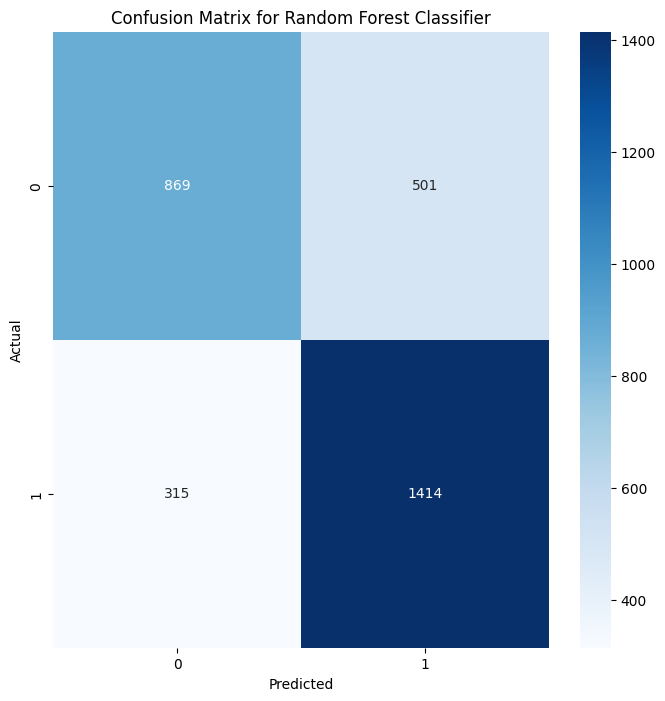

In [ ]:
plt.figure(figsize=(8,8))
cm=confusion_matrix(y_test,rfc_test_pred)
sns.heatmap(cm,fmt='d',annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

**XGB Classifier**

In [ ]:
xgboost=XGBClassifier(n_estimators=500,learning_rate=0.05,random_state=42)
xgboost.fit(X_train,y_train)
xgboost_train_pred=xgboost.predict(X_train)
xgboost_test_pred=xgboost.predict(X_test)
xgboost_train_accuracy=accuracy_score(xgboost_train_pred,y_train)
xgboost_test_accuracy=accuracy_score(xgboost_test_pred,y_test)
print('Training Accuracy for XGB Classifier',xgboost_train_accuracy)
print('Testing Accuracy for XGB Classifier',xgboost_test_accuracy)
print(classification_report(xgboost_test_pred,y_test))

Training Accuracy for XGB Classifier 0.9045620830643426
Testing Accuracy for XGB Classifier 0.7457244272345918
              precision    recall  f1-score   support

           0       0.66      0.74      0.70      1228
           1       0.81      0.75      0.78      1871

    accuracy                           0.75      3099
   macro avg       0.74      0.74      0.74      3099
weighted avg       0.75      0.75      0.75      3099



**Confusion Matrix for XGB Classifier**

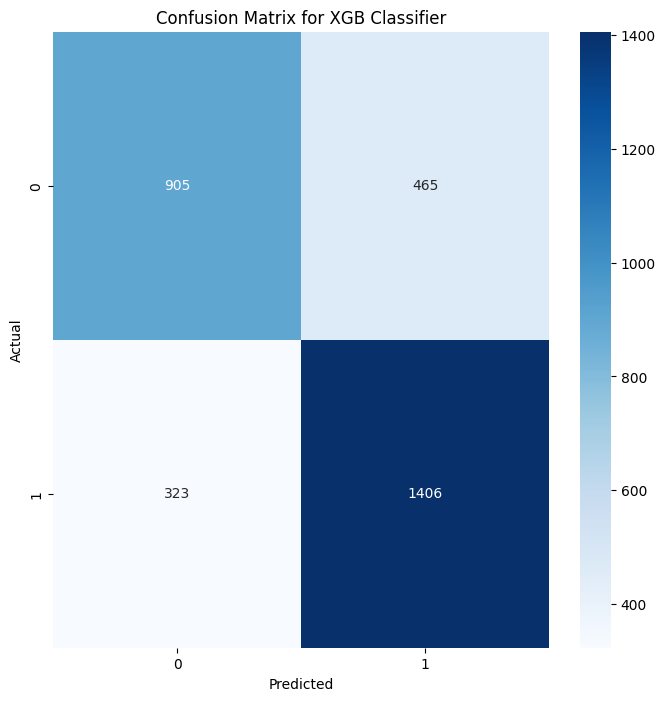

In [ ]:
plt.figure(figsize=(8,8))
cm=confusion_matrix(y_test,xgboost_test_pred)
sns.heatmap(cm,fmt='d',annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGB Classifier')
plt.show()

**LGBM Classifier**

In [ ]:
lgbm = LGBMClassifier(learning_rate=0.05,n_estimators=500)
lgbm.fit(X_train,y_train)
lgbm_train_pred=lgbm.predict(X_train)
lgbm_test_pred=lgbm.predict(X_test)
lgbm_train_accuracy=accuracy_score(y_train,lgbm_train_pred)
lgbm_test_accuracy=accuracy_score(y_test,lgbm_test_pred)
print('Training Accuracy for LGBM Classifier',lgbm_train_accuracy)
print('Testing Accuracy for LGBM Classifier',lgbm_test_accuracy)
print(classification_report(lgbm_test_pred,y_test))

[LightGBM] [Info] Number of positive: 5283, number of negative: 4011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 9294, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.568431 -> initscore=0.275454
[LightGBM] [Info] Start training from score 0.275454
Training Accuracy for LGBM Classifier 0.8807833010544437
Testing Accuracy for LGBM Classifier 0.7473378509196515
              precision    recall  f1-score   support

           0       0.65      0.74      0.70      1205
           1       0.82      0.75      0.78      1894

    accuracy                           0.75      3099
   macro avg       0.74      0.75      0.74      3099
weighted avg       0.76      0.75      0.75      3099



**Confusion Matrix for LGBM Classifier**

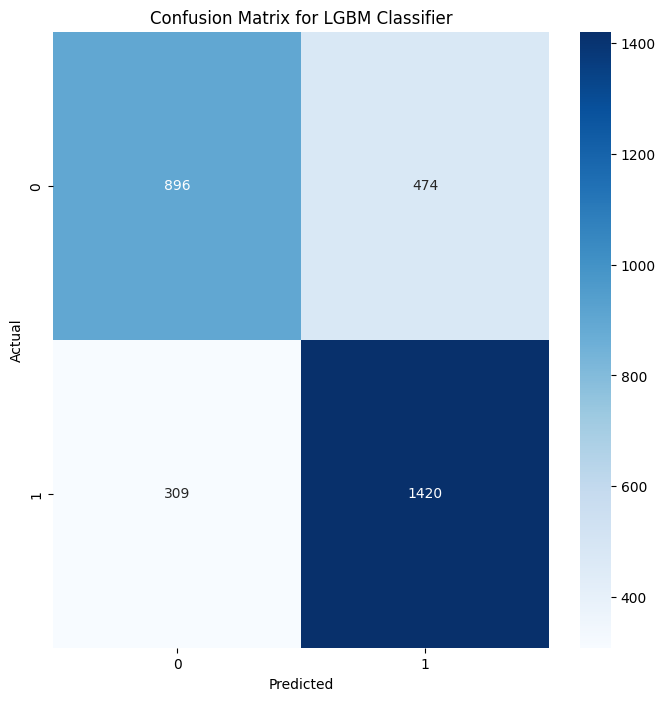

In [ ]:
plt.figure(figsize=(8,8))
cm=confusion_matrix(y_test,lgbm_test_pred)
sns.heatmap(cm,fmt='d',annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for LGBM Classifier')
plt.show()

**SVM Classifier**

In [ ]:
svc = SVC(kernel='rbf')
svc.fit(X_train_scaled,y_train)
svc_train_pred=svc.predict(X_train_scaled)
svc_test_pred=svc.predict(X_test_scaled)
svc_train_accuracy=accuracy_score(y_train,svc_train_pred)
svc_test_accuracy=accuracy_score(y_test,svc_test_pred)
print('Training Accuracy for SVC Classifier',svc_train_accuracy)
print('Testing Accuracy for SVC Classifier',svc_test_accuracy)
print(classification_report(svc_test_pred,y_test))


Training Accuracy for SVC Classifier 0.754465246395524
Testing Accuracy for SVC Classifier 0.6766698935140368
              precision    recall  f1-score   support

           0       0.53      0.67      0.59      1086
           1       0.79      0.68      0.73      2013

    accuracy                           0.68      3099
   macro avg       0.66      0.68      0.66      3099
weighted avg       0.70      0.68      0.68      3099



**Confusion Matrix for SVC Classifier**

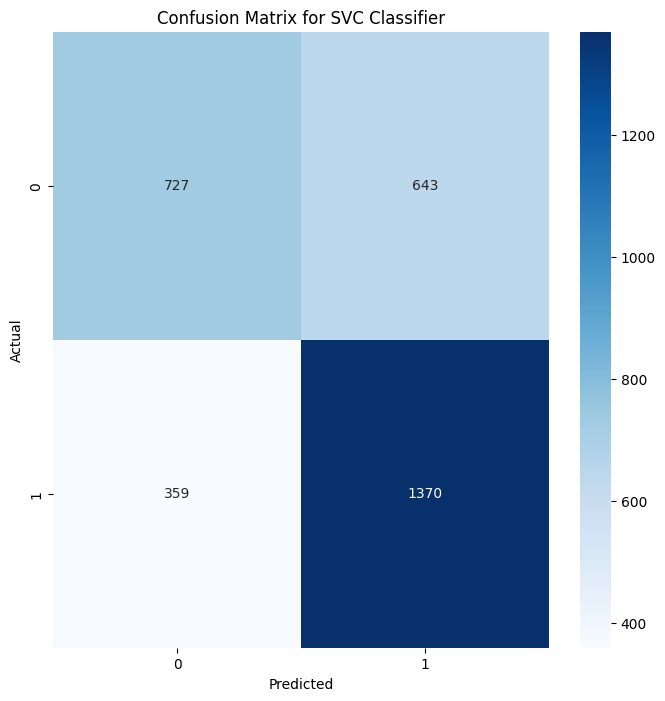

In [ ]:
plt.figure(figsize=(8,8))
cm=confusion_matrix(y_test,svc_test_pred)
sns.heatmap(cm,fmt='d',annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVC Classifier')
plt.show()

In [ ]:
!pip install catboost

**CatBoost Classifier**

In [ ]:
from catboost import CatBoostClassifier
cat_boost = CatBoostClassifier(learning_rate=0.05,n_estimators=500)
cat_boost.fit(X_train,y_train)
cat_boost_train_pred=cat_boost.predict(X_train)
cat_boost_test_pred=cat_boost.predict(X_test)
cat_boost_train_accuracy=accuracy_score(y_train,cat_boost_train_pred)
cat_boost_test_accuracy=accuracy_score(y_test,cat_boost_test_pred)
print('Training Accuracy for catboost Classifier',cat_boost_train_accuracy)
print('Testing Accuracy for catboost Classifier',cat_boost_test_accuracy)
print(classification_report(cat_boost_test_pred,y_test))



0:	learn: 0.6852577	total: 4.73ms	remaining: 2.36s
1:	learn: 0.6772063	total: 9ms	remaining: 2.24s
2:	learn: 0.6707433	total: 12.8ms	remaining: 2.12s
3:	learn: 0.6646724	total: 16.5ms	remaining: 2.05s
4:	learn: 0.6581462	total: 20.3ms	remaining: 2.01s
5:	learn: 0.6538242	total: 25.6ms	remaining: 2.1s
6:	learn: 0.6483791	total: 29.3ms	remaining: 2.07s
7:	learn: 0.6434591	total: 33.1ms	remaining: 2.04s
8:	learn: 0.6390953	total: 37ms	remaining: 2.02s
9:	learn: 0.6349833	total: 40.6ms	remaining: 1.99s
10:	learn: 0.6324334	total: 44.6ms	remaining: 1.98s
11:	learn: 0.6287897	total: 49.6ms	remaining: 2.02s
12:	learn: 0.6262460	total: 53.3ms	remaining: 2s
13:	learn: 0.6230836	total: 57.1ms	remaining: 1.98s
14:	learn: 0.6210829	total: 60.9ms	remaining: 1.97s
15:	learn: 0.6183915	total: 64.7ms	remaining: 1.96s
16:	learn: 0.6164790	total: 68.7ms	remaining: 1.95s
17:	learn: 0.6141473	total: 72.6ms	remaining: 1.94s
18:	learn: 0.6123786	total: 76.6ms	remaining: 1.94s
19:	learn: 0.6098126	total: 80.

**Confusion Matrix for Catboost Classifier**

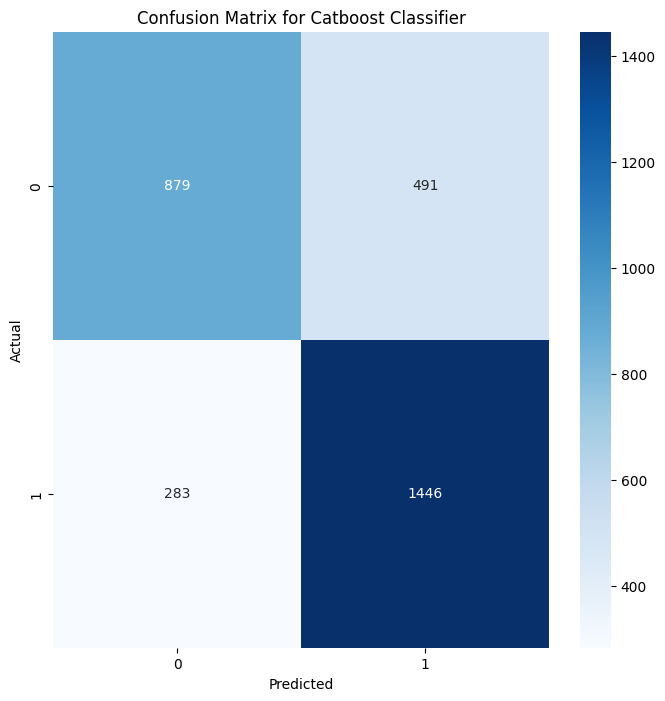

In [ ]:
plt.figure(figsize=(8,8))
cm=confusion_matrix(y_test,cat_boost_test_pred)
sns.heatmap(cm,fmt='d',annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Catboost Classifier')
plt.show()

In [ ]:
log_probs = log.predict_proba(X_test_scaled)[:,1]
rfc_probs = rfc.predict_proba(X_test)[:,1]
xgb_probs = xgboost.predict_proba(X_test)[:,1]
lgbm_probs = lgbm.predict_proba(X_test)[:,1]
catboost_probs = cat_boost.predict_proba(X_test)[:,1]


**ROC-AUC curve**

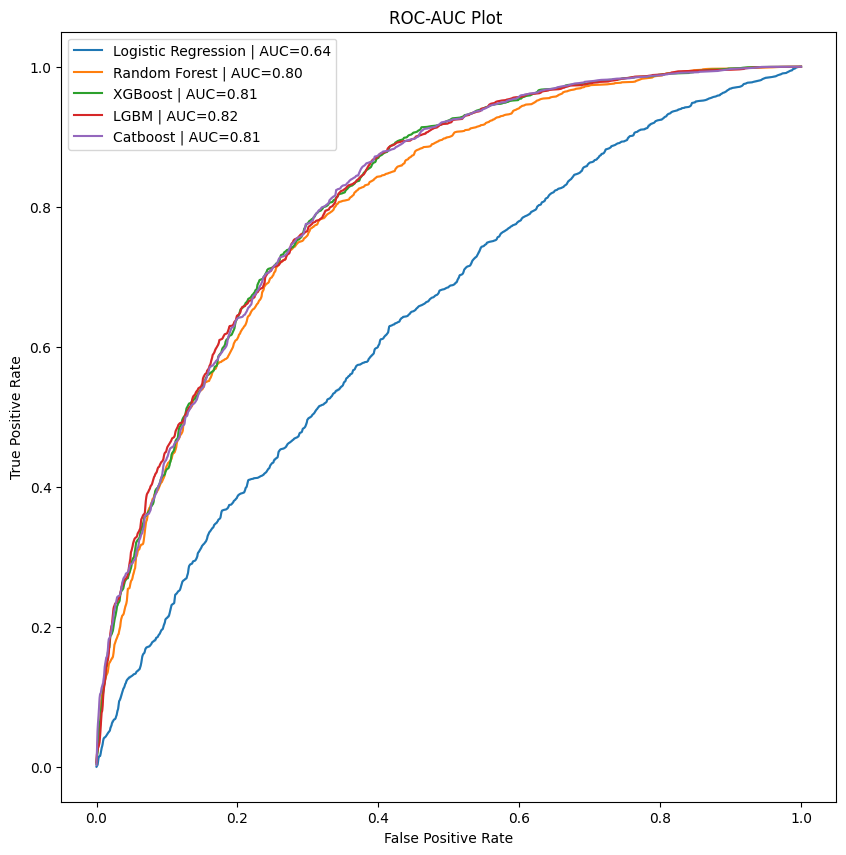

In [ ]:
log_auc=roc_auc_score(y_test,log_probs)
rfc_auc=roc_auc_score(y_test,rfc_probs)
xgb_auc=roc_auc_score(y_test,xgb_probs)
lgbm_auc=roc_auc_score(y_test,lgbm_probs)

catboost_auc=roc_auc_score(y_test,catboost_probs)
log_fpr,log_tpr,log_threshold = roc_curve(y_test,log_probs)
rfc_fpr,rfc_tpr,rfc_threshold = roc_curve(y_test,rfc_probs)
xgb_fpr,xgb_tpr,xgb_threshold = roc_curve(y_test,xgb_probs)
lgbm_fpr,lgbm_tpr,lgbm_threshold = roc_curve(y_test,lgbm_probs)

catboost_fpr,catboost_tpr,catboost_threshold = roc_curve(y_test,catboost_probs)
plt.figure(figsize=(10,10))
sns.lineplot(x=log_fpr,y=log_tpr,label='Logistic Regression | AUC={:.2f}'.format(log_auc))
sns.lineplot(x=rfc_fpr,y=rfc_tpr,label='Random Forest | AUC={:.2f}'.format(rfc_auc))
sns.lineplot(x=xgb_fpr,y=xgb_tpr,label='XGBoost | AUC={:.2f}'.format(xgb_auc))
sns.lineplot(x=lgbm_fpr,y=lgbm_tpr,label='LGBM | AUC={:.2f}'.format(lgbm_auc))
sns.lineplot(x=catboost_fpr,y=catboost_tpr,label='Catboost | AUC={:.2f}'.format(catboost_auc))
plt.title('ROC-AUC Plot ')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

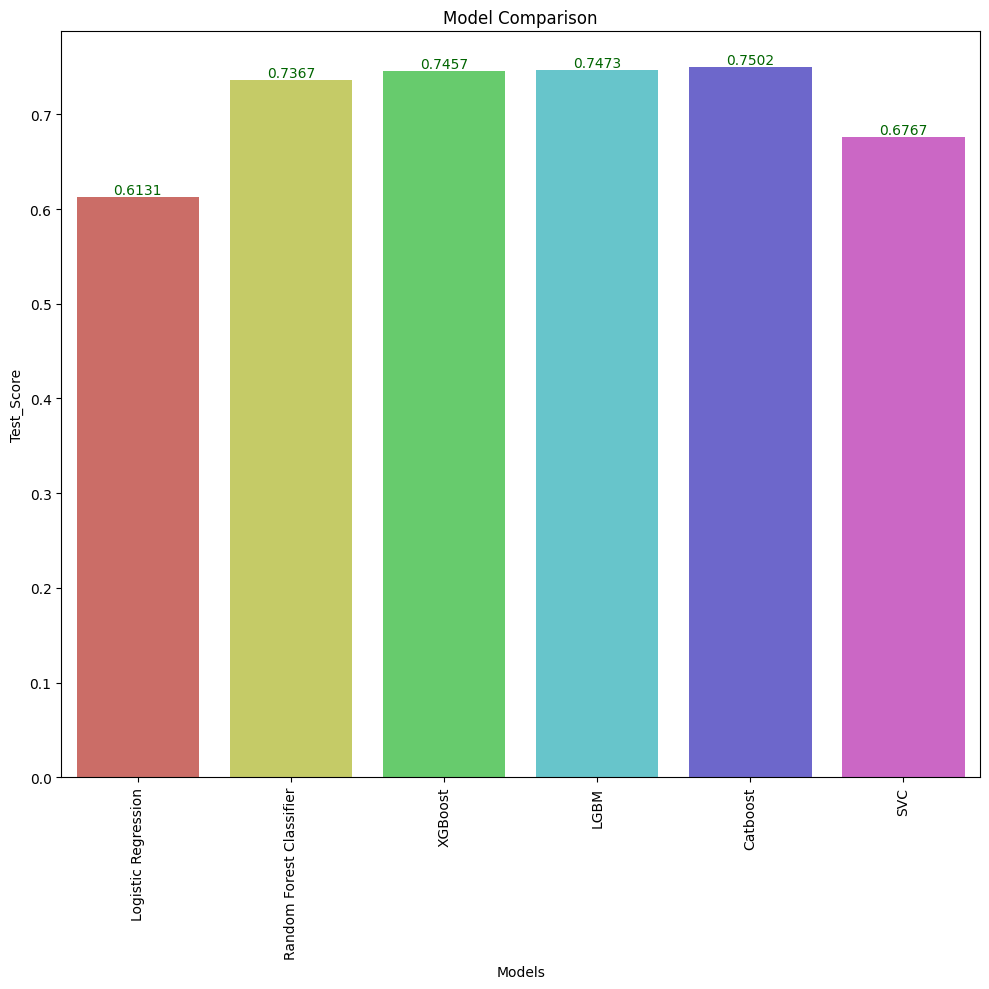

In [ ]:
results = pd.DataFrame(data={'Models':['Logistic Regression','Random Forest Classifier','XGBoost','LGBM','Catboost','SVC'],
                             'Train_Score':[lr_train_accuracy,rfc_train_accuracy,xgboost_train_accuracy,lgbm_train_accuracy,cat_boost_train_accuracy,svc_train_accuracy],
                             'Test_Score':[lr_test_accuracy,rfc_test_accuracy,xgboost_test_accuracy,lgbm_test_accuracy,cat_boost_test_accuracy,svc_test_accuracy]})
plt.figure(figsize=(10,10))
ax=sns.barplot(x='Models',y='Test_Score',data=results,palette='hls')
plt.title('Model Comparison')
plt.xticks(rotation=90)
for rect in ax.patches:
      ax.text(rect.get_x()+rect.get_width()/2,rect.get_height(),f'{rect.get_height():.4f}',
            ha='center',va='bottom',color='darkgreen')
plt.tight_layout()
plt.show()

**Conclusion**

In this project, we tested several machine learning models to classify data where all features were categorical. The models included **Logistic Regression, Random Forest, XGBoost, LightGBM (LGBM), CatBoost, and Support Vector Classifier (SVC)**.  

Logistic Regression struggled the most, with a **training accuracy of 62.75%** and a **testing accuracy of 61.31%**, showing that it wasn’t well-suited for this type of data. On the other hand, **tree-based models** like Random Forest, XGBoost, LGBM, and CatBoost performed much better, with training scores between **83.63% and 92.62%** and testing scores from **73.67% to 75.02%**. Among them, **CatBoost emerged as the top performer, achieving the highest testing accuracy of 75.02%**, proving its strength in handling categorical data.  

SVC had moderate results, with **75.45% training accuracy and 67.67% testing accuracy**, making it less effective for this dataset. Overall, the best results came from **ensemble-based models like CatBoost, LGBM, and XGBoost**, which balanced high accuracy with good generalization, making them the most reliable choices for this classification task.